<u>Abstract</u>

In this study, we present a novel credit scoring model that effectively enhances the combination of static and dynamic features while addressing the inherent class imbalance in credit default prediction. Through leveraging Long Short-Term Memory (LSTM) on dynamic variables and Logistic Regression on static variables the proposed model enhances the predictive powers of input features to be combined and then tested in an assortment of final models which consist of DNN, and ensembling of Logistic Regression, Decision Trees, and Random Forests, through voting classifiers and ADABoosting, while also looking at the constituent models performance. The study investigates multiple model variants and resampling techniques, including SMOTE-EEN, ADASYN, SMOTE, SMOTETomek, RUS, and ROS, to optimize credit default prediction performance. Given the higher cost of misclassifying defaulting individuals, recall is prioritised over precision and accuracy, therefore the F2 score is the primary evaluation metric.


<u>Introduction</u>

The development of precise credit scoring models is essential for financial institutions, as even a 1% increase in accurately identifying "bad" applicants can protect them from substantial losses (Hand and Henley, 1997). This study introduces a model that classifies features into static and dynamic components. Time dependencies within dynamic variables are extracted using Long Short-Term Memory (LSTM) models, resulting in a representative singular enhanced feature. This enriched dynamic variable is then combined with the original static variables and processed through a Deep Neural Network (DNN) to derive an outcome. Additionally, this paper investigates the replacement of the DNN with logistic regression, decision trees, and random forests, as well as ensembling these methods through soft voting classifiers and AdaBoost classifiers to determine the optimal approach.

Various model variations are explored, such as applying logistic regression to static variables to produce enhanced static variables, which are then integrated with the enhanced dynamic variable. The study also examines the application of LSTMs individually to each dynamic variable, generating multiple enhanced dynamic outputs that are combined with either the original or enhanced static variable(s). Addressing the inherent imbalance in the target default variable is a critical aspect of credit default modelling. Consequently, this research evaluates different resampling techniques for the proposed model, including SMOTE-ENN, ADASYN, SMOTE, SMOTETomek, RUS, and ROS, to identify the most effective method for managing the imbalance.

In this model a tuned random forest and a tuned DNN that utilize the original features serve as benchmarks. The data imbalance makes it challenging for our proposed model to surpass the accuracy of these benchmarks, which will be discussed in detail within the paper. However, given that the repercussions of misclassifying a defaulting individual as non-default substantially outweigh the opportunity cost of falsely categorizing a non-defaulting person as default, this paper emphasizes a model's ability to achieve a high recall score over precision or accuracy. Therefore, the primary evaluation metric used is the F2 score, with a 2:1 weight ratio between recall and precision. The experiments reveal that either applying logistic regression to the static variables or separately modelling the dynamic variables does not have a significant impact on the performance. Moreover, the optimal model configuration consists of employing SMOTE-ENN resampling, with any feature engineering variant, and sequentially processing the enhanced features through a logistic regression or an ADABoost with a logistic regression base, thereby achieving the highest F2 score of 0.63 on average.

The paper is structured as follows: 1) Preliminaries, where key concepts are explained; 2) Data exploration and pre-processing; 3) Explanation of the proposed model; 4) Discussion of experimentation with different variations and techniques; 5) Experiments and evaluation; and 6) Conclusion.


<u>Preliminaries (key concepts)</u>

A **Deep Neural Network** (DNN) is a machine learning algorithm designed to imitate the brain. The architecture comprises multiple interconnected layers of artificial neurons, categorized into three primary types: input layer, hidden layer(s), and output layer. The following graph provides a visual representation of the interconnectedness of the DNN structure:
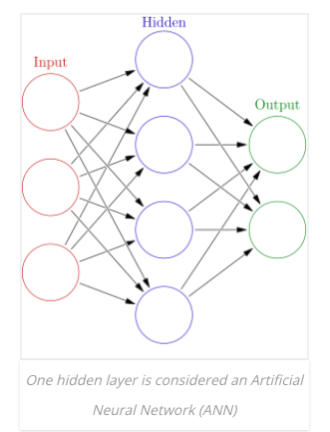
Fig1 (BMCblogs 2020)

The input layer accommodates the input features, which, in this study, consist of the augmented dynamic and static features. The number of input nodes corresponds to the dimensionality of these input features. The hidden layer(s) may comprise one or multiple layers responsible for discerning relationships within the data. Each node in the hidden layer(s) applies an activation function to its output, introducing non-linearity into the network and enabling it to model intricate relationships. This output is then passed on to the subsequent layer.

The output layer, being the final layer in the DNN architecture, produces the classification prediction. The number of nodes in this layer corresponds to the possible classes, which, in our binary case, can be set to 1 or 2. The sigmoid activation function is then employed to convert the output into probabilities.

During the training phase, the DNN employs backpropagation, a technique that minimizes the loss function by adjusting the weights and biases of the network through gradient descent. This process optimizes the network's performance, enabling it to generate more accurate predictions.

**Long Short-Term Memory (LSTM)** networks, a specialized Recurrent Neural Network (RNN) which excel in modelling sequential data, as they can learn long-range dependencies.
LSTMs consist of memory cells, or "blocks," arranged in layers, each containing input, forget, and output gates. These gates regulate information flow within cells, allowing LSTMs to selectively remember or forget data over time, crucial for capturing long-range dependencies. In addition, LSTM memory cells have a cell state, which acts as an internal memory that stores and retrieves information across multiple time steps.

**Logistic Regression** is a statistical method employed for binary classification tasks. As an extension of linear regression, it models the relationship between a dependent binary variable and one or more independent variables. Logistic Regression employs the logistic function, or sigmoid function, to produce probabilities that are then thresholded to generate binary predictions

**Decision Trees** are a class of non-parametric algorithms used for both classification and regression tasks. They work by recursively partitioning the input space based on feature values, creating a tree-like structure composed of internal nodes, branches, and leaf nodes. Each internal node represents a decision based on a specific feature, while leaf nodes represent the final prediction.

**Random Forests** are an ensemble learning method that builds on the principles of Decision Trees. They construct multiple Decision Trees and aggregate their predictions using a majority vote for classification or averaging for regression. Random Forests introduce randomness into tree construction by employing bootstrapped samples of the dataset and random feature subsets at each split.


<u>Data Exploration and Pre-processing</u>

The dataset employed in this study consists of Taiwan credit card data from April to September 2005, sourced from I.-C. Yeh and C.-h Lien. With 30,000 instances and 23 independent variables, excluding the ID variable, and the dependent variable “default.payment.next.month”, which are outlied in Fig2. Additionally the data consists of no missing values. The primary objective is to classify clients as defaulters (1) or non-defaulters (0) using a binary target variable. The dataset comprises of 23,364 non-defaulters and 6,635 defaulters (Appendix 1) resulting in 22% defaulters and 78% non-defaulters which highlights the significant class imbalance that needs to be addressed during model implementation. 

The features can be catagorised into static variables and dynamic variables. The five static variables include LIMIT_BAL, marriage, education, sex, and age. The dynamic variables, with time lags up to six months, comprise three initial types: PAY, BILL_AMT, and PAY_AMT. A fourth dynamic feature, out_standing_balance, is calculated as the difference between BILL_AMT and the previous PAY_AMT divided by LIMIT_BAL, representing the monthly proportion of credit lost.

Appendix 2 shows the data consists of more females (18,112) than males (11,888), but from plotting the proportion of defaults we find that males have a higher probability of defaulting. Moreover, the data consists of 345 instances of undefined education levels (0, 5, 6) (Appendix 3) and 54 instances of an undefined marriage classification (0) (Appendix 4) these instances are consequently removed. From the remaining data we can see that the most prominent education is university followed by graduate school and then high school. The analysis identifies large outliers in the credit limit variable, with most values between 0 and 500,000 and an upper quartile at 250,000. However, some observations reached 1 million. To minimize their impact on the statistical analysis and model performance, values were capped and floored at the upper and lower quantiles.

To prepare the categorical data for machine learning algorithms, we apply one-hot encoding. This technique converts categorical data into numerical data, which can be more effectively processed by the algorithms. One-hot encoding creates binary vectors for each category in the variable, eliminating any possibility of the model misinterpreting the data as having an order or magnitude.

The payment status features have ambiguous values of -2 and 0. To address this issue, the study posits that since a payment status of 1 denotes a one-month delayed payment, we can logically infer that 0, -1, and -2 signify timely payments. As such, we amalgamate these categories into a unified -1 classifier.

Appendix 5 shows a strong correlation between the lags of the dynamic variables. This characteristic provides the necessary information to extract the time dependence between the variables, which can be obtained using LSTM. However, it is of note that PAY_AMT is an exception, and actually shows little correlation between its lags.

Continuous features, including LIMIT_BAL, AGE, BILL_AMT, and PAY_AMT, are standardized to have a mean of 0 and a standard deviation of 1. This ensures all features are on the same scale, crucial for distance-based machine learning algorithms, preventing disproportionate influence of larger-ranged features, and avoiding biased results. To avoid data leakage, standardization is performed after splitting the dataset into training, validation, and testing sets. By doing so we prevent data leakage as if we used the whole dataset the information contained in the test set would be used to determine the scaling parameters, thus resulting in the test set no longer being an independent dataset that can be used to evaluate the model’s true performance on unseen data. 


| Variable Name                 | Description                                                                                                                                                                                                                                                                 | Data Type |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|
| ID                            | Unique client identifier                                                                                                                                                                                                                                                     | Numerical |
| LIMIT_BAL                     | Credit limit in New Taiwan dollars                                                                                                                                                                                                                                            | Numerical |
| SEX                           | Gender (1=male, 2=female)                                                                                                                                                                                                                                                     | Categorical |
| EDUCATION                     | Highest level of education (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)                                                                                                                                                                | Categorical |
| MARRIAGE                      | Marital status (1=married, 2=single, 3=others)                                                                                                                                                                                                                                 | Categorical |
| AGE                           | Age in years                                                                                                                                                                                                                                                                  | Numerical |
| PAY_0 - PAY_6                 | Repayment status (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ..., 8=payment delay for eight months, 9=payment delay for nine months and above) in respective months from April to September, 2005                                            | Categorical |
| BILL_AMT1 - BILL_AMT6         | Amount of bill statement in respective months from April to September, 2005 (NT dollar)                                                                                                                                                                                      | Numerical |
| PAY_AMT1 - PAY_AMT6           | Amount of previous payment in respective months from April to September, 2005 (NT dollar)                                                                                                                                                                                   | Numerical |
| default.payment.next.month   | Whether the client defaulted on their payment in the following month (1=yes, 0=no)                                                                                                                                                                                         | Binary    |



Fig2




The large imbalance between the default and non-default variable needs to be addressed before applying our model. The imbalance contributes to the difficulty of outperforming the random forest as a benchmark accuracy. In an imbalanced dataset, the majority class inherently dominates the dataset. Random forest, a bagging ensemble method, relies on bootstrapped samples drawn with replacement from the original dataset to train individual trees. Owing to the class imbalance, the majority class instances are likely to be over-represented in each of the bags, resulting in a bias of the same direction and magnitude where each tree is biased towards the majority class in the learned decision boundaries (Khoshgoftaar et al., 2007). Consequently, the classifier achieves high accuracy by predominantly predicting the majority class, even though the minority class is the primary target of interest. Given the majority class's higher prevalence, a classifier that naively predicts the majority class for all instances will achieve an accuracy of 78%. However, this high accuracy does not reflect the classifier's ability to discriminate between classes or effectively identify the minority class. Hence, improving the accuracy of a model beyond a random forest in this dataset poses a significant challenge.

However, to some extent this can be mitigated through re-sampling techniques. In this paper, we aim to identify the most effective re-sampling technique for our model. To this end, we experiment with several well-established re-sampling methods such as SMOTE, ADASYN, SMOTE-ENN, SMOTETomek, Random Under Sampling (RUS), and Random Over Sampling (ROS). In subsequent sections of the paper, we will delve into a detailed comparative analysis of the outcomes of these methods. Overall, the experimentation results find that SMOTEENN is the most effective re-sampling method to address the class imbalance issue in our dataset. This is determined not by the model’s accuracy but from the F2-score detailed in the introduction. 

SMOTE-ENN is a hybrid technique that combines oversampling using Synthetic Minority Over-sampling (SMOTE) and under sampling using Edited Nearest Neighbours (ENN) to produce a balanced dataset. SMOTE, generates synthetic samples for the minority class by selecting instances that are close in feature space, drawing a line between these instances, and generating new instances along that line. Specifically, SMOTE chooses k-nearest neighbours from the minority class, selects a random neighbour, computes the difference between the chosen neighbour’s feature value and the current sample's feature value, multiplies this difference by a random number between 0 and 1, and adds the result to the feature values to create a new synthetic instance.

ENN, or Edited Nearest Neighbours, is a cleaning method that removes noisy samples and instances near the decision boundary to create a smoother class boundary which will therefore improve generalisation of the model. ENN works by evaluating its k-nearest neighbours. If most neighbours belong to one class, then those samples which belong to the other class are removed. 

SMOTE-ENN is a combination of both processes, first applying SMOTE to generate synthetic samples for the minority class, and then using ENN to smooth the decision boundary. This studies data exhibits significant overlap between default and non-default variables (Apendix 6) which results in creating complex decision boundaries. Therefore, solely using SMOTE would only build upon the boundary confusion, so ENN is crucial in the resampling technique.

Xiao et al. (2021) found that SMOTE-ENN consistently ranked among the best resampling techniques in terms of G-mean, F-measure, and AUC, with a notable advantage in ANN models, which our model predominantly features. Applying this technique to Random Forest also results in a better model, as it helps mitigate the aforementioned majority bias. Consequently, using the resampled Random Forest accuracy and additional metrics as a benchmark proves more valuable. It is crucial to note that these resampling techniques should only be applied to the training set, as the synthetic samples or distributions they create do not accurately represent the real world.




<u>Benchmark</u>

This paper uses both Random Forest and a simple DNN as benchmarks for the model. For the Random Forest the data is split into 80% training and 20% testing. The split does not include a validation set as the tuning of hyperparameters are done through K-folds validation. The Random Forest is tuned as much as possible through Grid Search, a technique that performs an exhaustive search over a comprehensive set of hyperparameters. Grid Search generates all possible combinations of hyperparameters and their values and performs k-fold cross-validation for each combination. For each hyperparameter combination, Grid Search trains a Random Forest classifier on one-fold and evaluates its performance on the remaining folds, repeating this process k times. The combination of hyperparameters that yield the highest performance metric is considered the best set of hyperparameters, which is then used to train a new Random Forest classifier on the entire training set. The output of the Grid Search is the Random Forest classifier with the best hyperparameters. The tuned random forest is then applied to the test data and the accuracy, ROC, precision, F1, F2, and recall score are then provided for comparison. The DNN benchmark is presented at the end of the notebook, utilizing functions created during the model development process. This DNN accepts all 23 original variables as inputs and is tuned using an optimization method, which will be elaborated on in the model explanation section where it is created.


<u>Proposed Model</u>

This model proposes 4 variants in the feature engineering phase of the model. These consist of 
1)	Single LSTM output (of all dynamic features) + original static variables
2)	Single LSTM output (of all dynamic features) + Logistic Regression (of static variables)
3)	Multiple LSTM output (of all dynamic features) + original static variables
4)	Multiple LSTM output (of individual dynamic features) + Logistic Regression (of static variables)

The method is similar for each variant. Initially in the model, the data is divided into training, validation, and test sets with a 60:20:20 ratio. A re-sampling technique is applied to the training set, followed by the extraction of dynamic features from each dataset. These features are then converted into PyTorch tensors and fed into the LSTM.

The input layer dimensions of the LSTM vary depending on the experiment being conducted. In the first LSTM variation, the input dimensions are set to 4, as all four dynamic features are used to generate a single enhanced output. In contrast, the second LSTM variation generates an enhanced feature for each individual dynamic feature, like the approach used by Huei-Wen Teng (2023). In this case, each feature is passed through separate LSTMs, and the input dimension is set to 1.

The data then proceeds to the hidden layers, which consist of LSTM cells designed to analyse the temporal dependencies in the input data. Each LSTM cell has a hidden state that is updated at every time step based on the current input and the cell's memory state. Finally, the output layer is a fully connected linear layer that takes the hidden states from the last LSTM layer and produces a single output.


Optuna is employed to optimize the hyperparameter selection process, striving to identify the best learning rate, hidden dimensions, dropout rate, number of layers, batch size, and number of epochs. It does so by evaluating the model's performance on the validation set, which helps to prevent overfitting. This is achieved through a systematic search and selection of hyperparameters that minimize the validation loss, ultimately leading to a more accurate and robust model.

The optimal hyperparameters identified by Optuna are then used for training the model and producing the most effective weights that result in the lowest validation loss. This refined model is expected to perform better on unseen data and provide more reliable predictions.

To mitigate overfitting, the model incorporates two techniques: early stopping and weight decay. Early stopping is employed to halt the training process if the validation loss ceases to improve after a predefined number of consecutive epochs, known as "patience." In this model, the patience threshold is set to 10 epochs. The early stopping function evaluates whether the current validation loss is the best observed thus far. If it is, the model's state dictionary is saved, and the counter for epochs without improvement resets. Conversely, if the validation loss is not the best observed, the counter increments for each epoch. When the counter surpasses the patience threshold, the training process is halted.

Furthermore, the training function leverages weight decay, a form of L2 regularization, to safeguard against overfitting. Weight decay aids in reducing the model's complexity and decreasing its sensitivity to noise present in the training data. By constraining the model's weight magnitudes, weight decay ensures that the model does not rely excessively on any single input feature, promoting generalization to unseen data and enhancing the model's robustness.

From the overfitting aspect Random Forest can serve as a formidable benchmark. This is because the algorithm's intrinsic properties include the utilization of bootstrapped samples, where each tree is trained on an independent dataset, ensuring diversity among the trees. Furthermore, the feature selection process is randomized, as only a random subset of features is considered at each node split. This promotes randomness in feature selection, leading to the creation of a variety of uncorrelated trees. The aggregation of predictions from multiple decision trees reduces both bias and variance, further minimizing overfitting. This affinity to avoiding overfitting can be fine-tuned through parameter adjustments, such as altering the number of features considered for the optimal split. Consequently, it may prove challenging to enhance the accuracy of the dataset using the proposed model beyond the robust capabilities of Random Forest.

The optimal parameters obtained through hyperparameter tuning are used for training, and the most suitable weights, which result in the lowest validation loss, are applied to the testing set. The model's performance is assessed through accuracy, AUC-ROC, F1, F2, precision, and recall scores. The LSTM model extracts the temporal dependencies from the four features, either collectively or individually, by learning to encode relevant information from input sequences into its hidden states. The LSTM output(s) are combined with either the original static variables or the output of a logistic regression model derived from the static variables. The logistic regression is tuned through Grid search with 5-fold cross-validation to find the optimum parameter that controls the strength of regulisation based on the ROC-AUC score.   


In the second phase of the model, the four variants are evaluated using different methods to determine the optimal credit scoring strategy, which include a DNN, a soft voting classifier, and ADABoosting. Initially, a finely-tuned deep neural network (DNN) that employs a ReLU activation function is tested. The hyperparameter optimization process focuses on identifying the best learning rate, dropout rate, weight decay, and the number of hidden neurons for the two hidden layers. Due to the computational cost associated with tuning the number of hidden neurons, a coarse approach is adopted, involving a large step size within the optimization function. The model is trained and assessed on the training and validation sets, and subsequently, the best weights are applied to the testing set. 

To try and find the optimum strategy we further experimented with the 4 variants through implementing ensemble classifiers. A voting classifier was created with three base models Logistic Regression, Random Forest, and Decision Trees. The voting classifier was set to use ‘soft’ voting which means that the predicted probabilities of each class are averaged and the class with the highest probability is selected. AdaBoost is applied using the same individual base models. The number of estimators for the AdaBoost classifier is set to 50, which means that 50 weak learners are used to create a strong learner. The learning rate is set to 1, controlling the contribution of each weak learner in the final combination. The algorithm chosen is SAMME.R. The function iteratively applies the AdaBoost classifier to the data using each of the base estimators in turn to identify the optimal one for the specific problem. The performance metrics, such as accuracy, F1, F2, precision, and recall scores, are calculated and printed for each AdaBoost classifier (each with a different base estimator), as well as for the voting classifier and each constituent base model allowing for comparison and identification of the best performing model.



<u>Experiments/Evaluation</u>

The challenge of imbalanced data in our dataset makes it difficult to rely solely on accuracy as an evaluation metric for machine learning models. Marques et al. (2013) argue that one cannot conclusively claim the superiority of a particular method over others, irrespective of data characteristics, as class distribution plays a crucial role in determining model performance. Kennedy et al. (2010) found that the accuracy of minority class predictions significantly decreases as the imbalance grows. This occurs because the majority class has more instances, which leads to a higher focus on the majority class during model training.

Given that the cost of misclassifying a defaulter as non-default is much greater than the opposite scenario, our goal is to develop a model with a high recall score. Recall measures the proportion of actual positive cases that are accurately identified as positive. Precision, on the other hand, quantifies the proportion of positive identifications that are truly positive. Consequently, we aim to assess our model based on these two metrics, with a stronger emphasis on recall.

To achieve this, we use the F2 score, which is a weighted harmonic mean of precision and recall. The F2 score assigns more weight to recall than precision, as indicated by the beta coefficient in the equation below, which is set to 2 for this study:



F2 = (1 + β^2) * (precision * recall) / (β^2 * precision + recall)



This evaluation utilises Random Forest and Deep Neural Networks (DNN) as benchmarks to compare their performance against our proposed model. A tuned Random Forest model without any resampling achieved an accuracy of 0.83 but yielded F1 and F2 scores of 0.46 and 0.38, respectively. Similarly, a simple DNN without prior feature engineering attained an accuracy of 0.82, but the F1 and F2 scores were 0.43 and 0.35, respectively. 

The study revealed that, across all model variations, the use of SMOTE-ENN resampling resulted in the highest F2 scores. Therefore, applying SMOTEENN resampling improved the Random Forest and DNN models' F1 and F2 scores to 0.47 and 0.60, and 0.53 and 0.56, respectively. 

Moreover, for the proposed model within each resampling technique, the highest F2 scores were consistently achieved by models that employed a standard Logistic Regression or ADABoosting with a logistic regression base as the final classifier (phase 2). As a result, the overall best F2 scores were observed for the Logistic Regression-based phase 2 classifiers using SMOTE-ENN resampling, with an average F2 of 0.63 for both a phase 2 standard Logit Regression and Logit Regression based ADABoosting across all phase 1 model variations. Therefore, demonstrating that the proposed model outperforms the benchmark. 

This study also highlighted a notebale observation across all resampling environments: applying logistic regression to static variables before combining them with dynamic variables had an insignificant impact. While splitting the LSTM into individual outputs led to an extremely marginal if not insignificant negative impact on the evaluation scores.

It is worth noting that while the SMOTE-ENN with Logistic Regression phase 2 classifiers achieved a high F2 score, this was driven by an average recall score of ~0.8, a precision score of ~0.39, and an accuracy of ~0.66. Although this satisfies our aim of prioritizing the recall score, a more balanced outcome can be obtained by employing a DNN as the final classifier, which yielded an F1 score of 0.53, an F2 score of 0.60, and an accuracy of 0.74.

The results for the remaining resampling techniques using single LSTM and ADABoosting with Logistic Regression as the final classifier can be observed in the following table:

| Resampling Technique | F1 Score | F2 Score | Accuracy |
|----------------------|----------|----------|----------|
| SMOTE-ENN | 0.48 | 0.54 | 0.66 |
| SMOTE | 0.54 | 0.57 | 0.80 |
| ADASYN | 0.51 | 0.58 | 0.77 |
| SMOTETomek | 0.52 | 0.50 | 0.80 |
| RUS | 0.49 | 0.60 | 0.77 |
| ROS | 0.52 | 0.58 | 0.74 |



<u>Conclusion</u>

This study has successfully developed a predictive model for forecasting defaults by leveraging both dynamic and static dependencies in the data to create enhanced features for the final classifiers. The research determined that the optimal model variation employs either a logistic regression or an ADABoost-based logistic regression as the final classifier, achieving the highest F2 scores. This model outperforms the Random Forest and Deep Neural Networks benchmarks demonstrating its effectiveness in predicting defaults.



<u>References:</u>

Hand, David J., and William E. Henley. 1997. Statistical classification methods in consumer credit scoring: A review. Journal of the Royal Statistical Society

Kennedy, Kenneth & Mac Namee, Brian & Delany, Sarah. (2009). Learning without Default: A Study of One-Class Classification and the Low-Default Portfolio Problem.. 174-187.

Khoshgoftaar, T.M., Golawala, M. and Hulse, J.V. (2007). An Empirical Study of Learning from Imbalanced Data Using Random Forest. 19th IEEE International Conference on Tools with Artificial Intelligence(ICTAI 2007). doi:https://doi.org/10.1109/ictai.2007.46.

Marqués, A., García, V. and Sánchez, J. (2013). On the suitability of resampling techniques for the class imbalance problem in credit scoring. The Journal of the Operational Research Society, [online] 64(7), pp.1060–1070. Available at: https://www.jstor.org/stable/24501032?saml_data=eyJzYW1sVG9rZW4iOiI0NDIyZDFkMS00ZDk0LTQyMmQtYjQyNy03MjQwMDg1OGZjMjEiLCJpbnN0aXR1dGlvbklkcyI6WyIxOGVlZTJmYS1mODcxLTQwYTktODI4NS1mNTRlYzdhMDM4MjciXX0 [Accessed 18 April 2023].

scirp.org. (n.d.). Yeh, I.C. and Lien, C.H. (2009) The Comparisons of Data Mining Techniques for the Predictive Accuracy of Probability of Default of Credit Card Clients. Expert Systems with Applications, 36, 2473-2480. - References - Scientific Research Publishing. [online] Available at: https://scirp.org/reference/referencespapers.aspx?referenceid=2396454 [Accessed 20 April 2023].

Teng, H.-W., Lin, J.-Y. and Lu, K.-W. (2023). Enhancing Credit Score Predictions with Dynamic Feature Engineering using Deep Learning. [online] papers.ssrn.com. Available at: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4375313 [Accessed 19 April 2023].

Xiao, J., Wang, Y., Chen, J., Xie, L. and Huang, J. (2021). Impact of resampling methods and classification models on the imbalanced credit scoring problems. Information Sciences, 569, pp.508–526. doi:https://doi.org/10.1016/j.ins.2021.05.029.

Johnson, J. (2020). What’s a Deep Neural Network? Deep Nets Explained. [online] BMC Blogs. Available at: https://www.bmc.com/blogs/deep-neural-network/.



## Appendix are found in the following Data Exploration

In [1]:
# ! pip install optuna
# !pip install torchsampler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.utils.data as Data
from torch.autograd import Variable
import os
from torchsampler import ImbalancedDatasetSampler
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
import time
import torch.utils.data as data_utils
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import fbeta_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the device      
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [3]:
url = "https://raw.githubusercontent.com/meauxt/credit-card-default/master/credit_cards_dataset.csv"

data = pd.read_csv(url)

In [4]:
data.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'Default'}, inplace=True)

data = data.drop('ID', axis = 1)


# Creating a new feature for people's outstanding balances
for num in range(1, 6):
    balance_col = f'out_standing_balance_{num}'
    bill_amt_col = f'BILL_AMT{num + 1}'
    pay_amt_col = f'PAY_AMT{num}'
    
    data[balance_col] = (data[bill_amt_col] - data[pay_amt_col]) / data['LIMIT_BAL']

for num in range(1, 6):
    balance_col = f'out_standing_balance_{num}'
    data['out_standing_balance_6'] = data[balance_col] / 6

In [5]:
print(data.isnull().sum())


LIMIT_BAL                 0
SEX                       0
EDUCATION                 0
MARRIAGE                  0
AGE                       0
PAY_1                     0
PAY_2                     0
PAY_3                     0
PAY_4                     0
PAY_5                     0
PAY_6                     0
BILL_AMT1                 0
BILL_AMT2                 0
BILL_AMT3                 0
BILL_AMT4                 0
BILL_AMT5                 0
BILL_AMT6                 0
PAY_AMT1                  0
PAY_AMT2                  0
PAY_AMT3                  0
PAY_AMT4                  0
PAY_AMT5                  0
PAY_AMT6                  0
Default                   0
out_standing_balance_1    0
out_standing_balance_2    0
out_standing_balance_3    0
out_standing_balance_4    0
out_standing_balance_5    0
out_standing_balance_6    0
dtype: int64


## Appendix 1

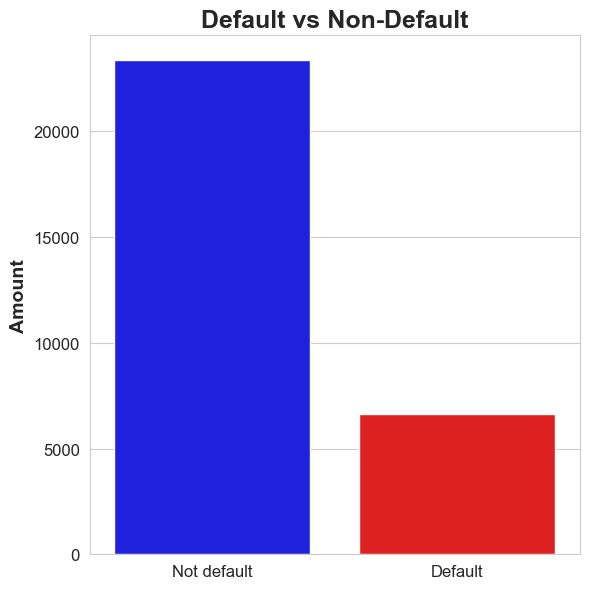

In [6]:


# Set the style of the plot
sns.set_style("whitegrid")
sns.set_palette(["blue", "red"])

# Set the size of the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Create the countplot
sns.countplot(x='Default', data=data, ax=ax)

# Set the x-axis tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not default', 'Default'], fontsize=12)

# Set the labels
ax.set_ylabel('Amount', fontsize=14, fontweight='bold')
ax.set_xlabel('', fontsize=14)

# Customize the tick marks
ax.tick_params(axis='y', labelsize=12)

# Set the plot title
ax.set_title('Default vs Non-Default', fontsize=18, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


As we can see from the above graph there is a large imbalance between not defualt and default which is currently 77% not default and 23% default so this imbalance will have to be accounted for later in this code

## Appendix 2

In [7]:
# Select the 'SEX' variable
sex_data = data['SEX']

# Print all unique values of the 'SEX' variable
print(f"All unique values of 'SEX': {sex_data.unique()}")


All unique values of 'SEX': [2 1]


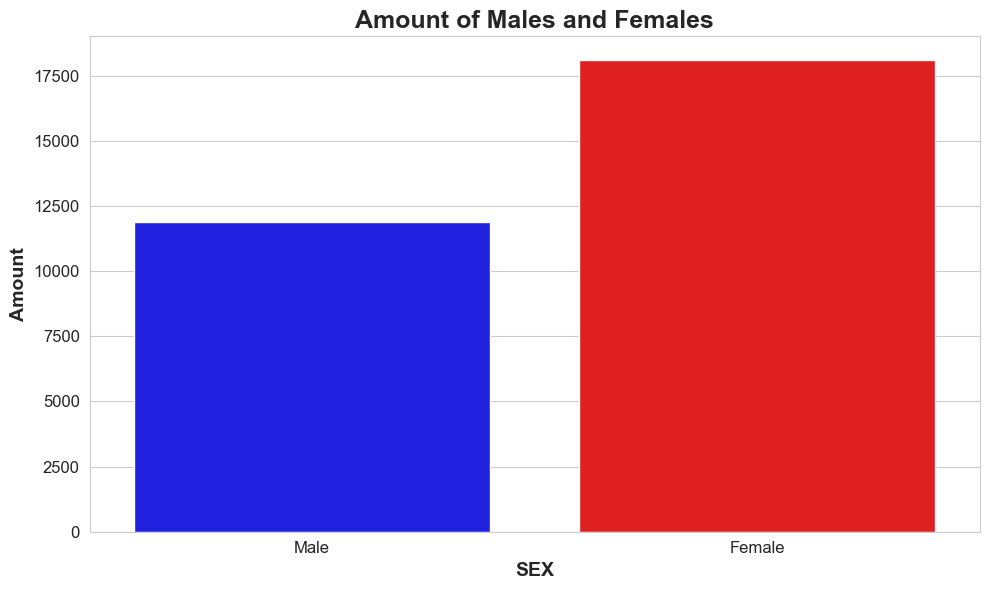

In [8]:


# Set the style of the plot using Seaborn
sns.set_style("whitegrid")
sns.set_palette(["blue", "red"])

# Select the data and variable name to plot
sex_data = data['SEX']
sex_variable_name = 'SEX'

# Get the value counts of the 'SEX' column
counts = sex_data.value_counts()

# Create and display the bar chart
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=counts.index, y=counts.values, ax=ax)

# Set the axis labels and title
ax.set_xlabel(sex_variable_name, fontsize=14, fontweight='bold')
ax.set_ylabel('Amount', fontsize=14, fontweight='bold')
ax.set_title('Amount of Males and Females', fontsize=18, fontweight='bold')

# tick marks
ax.set_xticklabels(['Male', 'Female'], fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


## Appendix 3

In [9]:
print(data['EDUCATION'].unique())

[2 1 3 5 4 6 0]


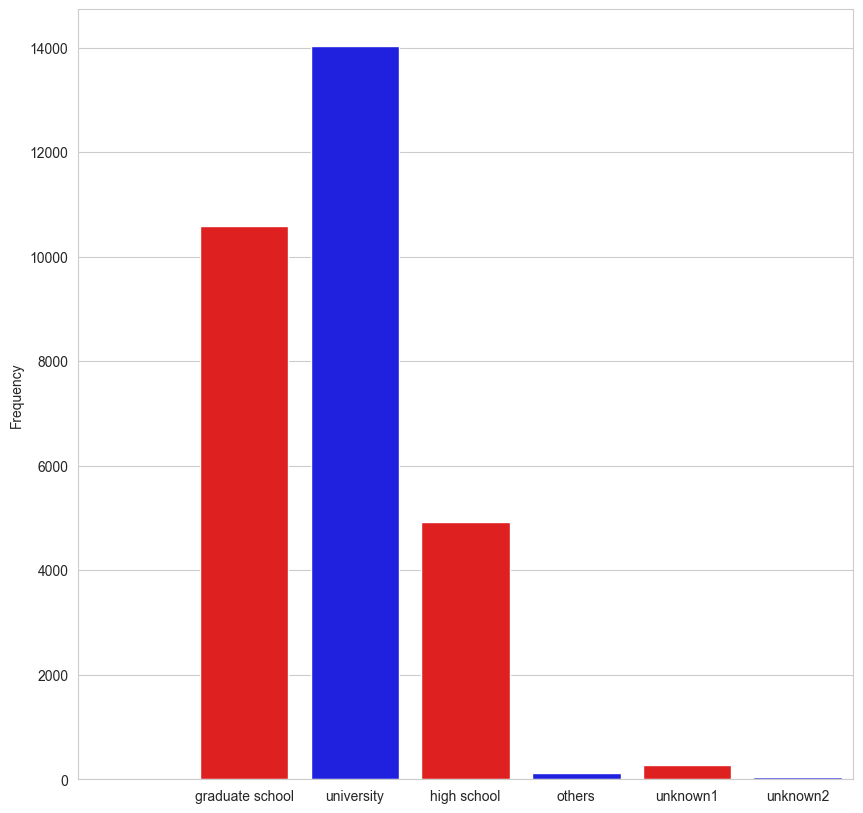

In [10]:


# Set the size of the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Create the countplot
sns.countplot(x='EDUCATION', data=data, palette=['blue', 'red'], ax=ax)

# Set the number of ticks on the x-axis
ax.xaxis.set_ticks(range(1, 7))

# Set the x-axis tick labels
ax.set_xticklabels(['graduate school', 'university', 'high school', 'others', 'unknown1', 'unknown2'])

# Set the y-axis label and remove the x-axis label
ax.set_ylabel('Frequency')
ax.set_xlabel('')

# Display the plot
plt.show()


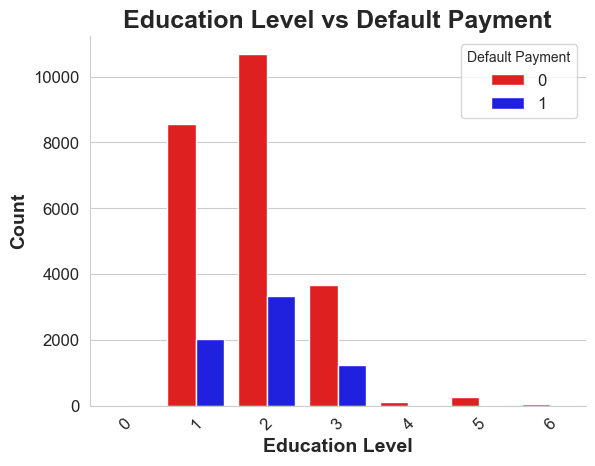

In [14]:
# Set the color palette
sns.set_palette(['red', 'blue'])

# Set the plot style
sns.set_style('whitegrid')

# Create the countplot with color-coded categories
g = sns.countplot(x='EDUCATION', hue='Default', data=data)

# Set the x-axis and y-axis labels
g.set_xlabel('Education Level', fontsize=14, fontweight='bold')
g.set_ylabel('Count', fontsize=14, fontweight='bold')

# Set the legend title and font size
g.legend(title='Default Payment', loc='upper right', fontsize=12)

# Customize the tick marks
g.tick_params(axis='x', labelrotation=45, labelsize=12)
g.tick_params(axis='y', labelsize=12)

# Set the plot title
g.set_title('Education Level vs Default Payment', fontsize=18, fontweight='bold')


sns.despine()



## Appendix 4

In [15]:
print(data['MARRIAGE'].unique())


[1 2 3 0]


As we can see above there are more types of marriage values than expectedm which is shown in the graph below

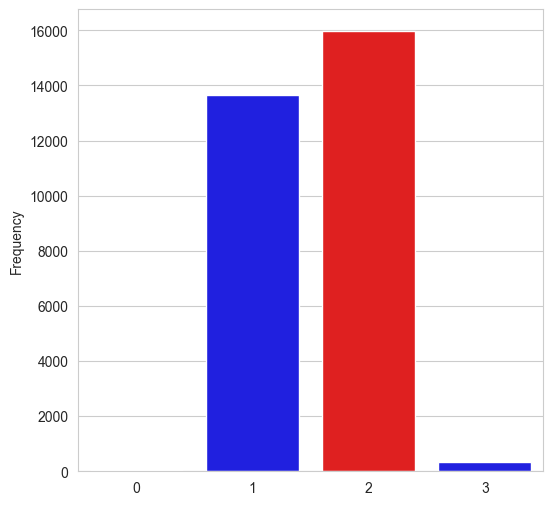

In [16]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Create the countplot
sns.countplot(x='MARRIAGE', data=data, palette=['red', 'blue'], ax=ax)



# Set the y-axis label and remove the x-axis label
ax.set_ylabel('Frequency')
ax.set_xlabel('')

# Display the plot
plt.show()


## Appendix 5

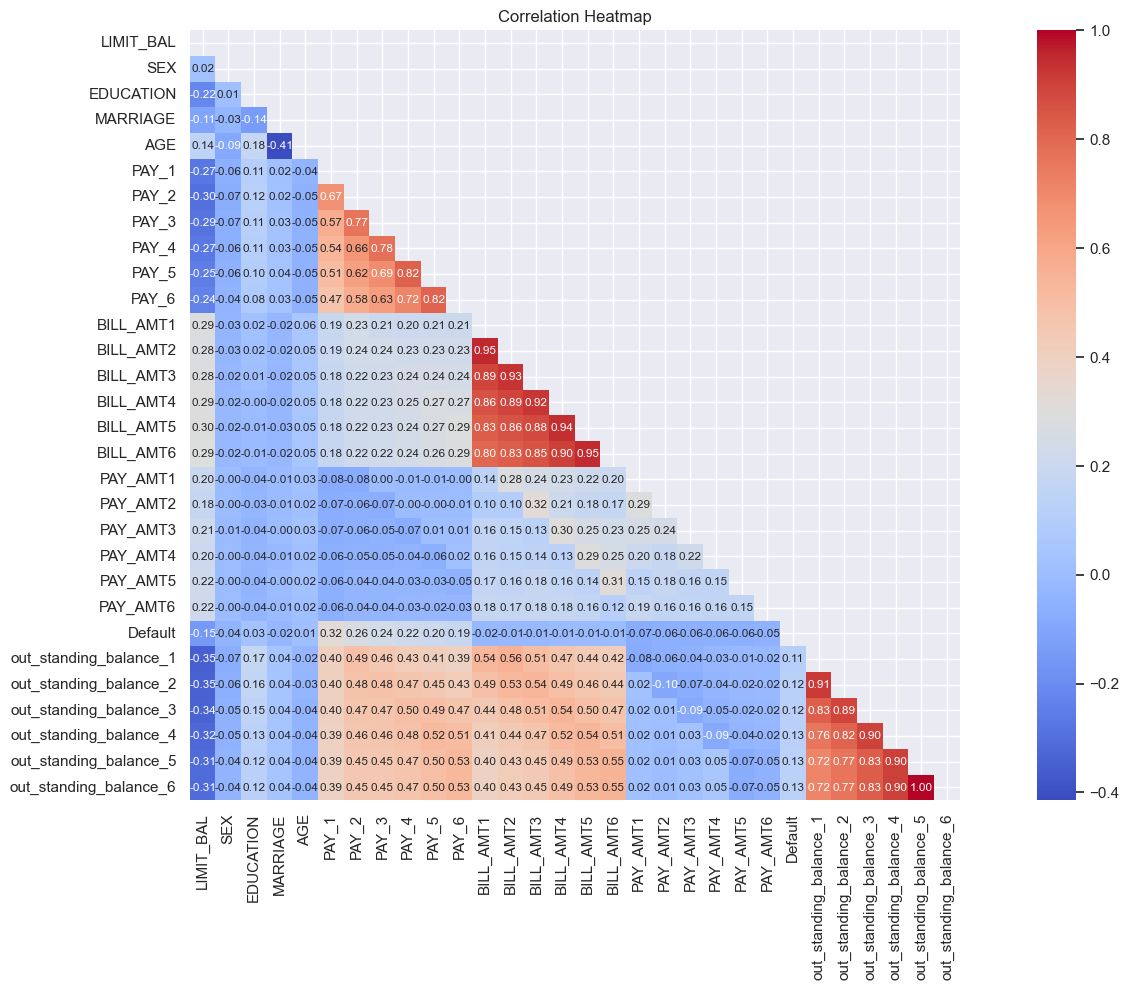

In [17]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))


sns.set(font_scale=1)
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, cmap='coolwarm',annot=True, annot_kws={'size':8.5}, fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Appendix 6

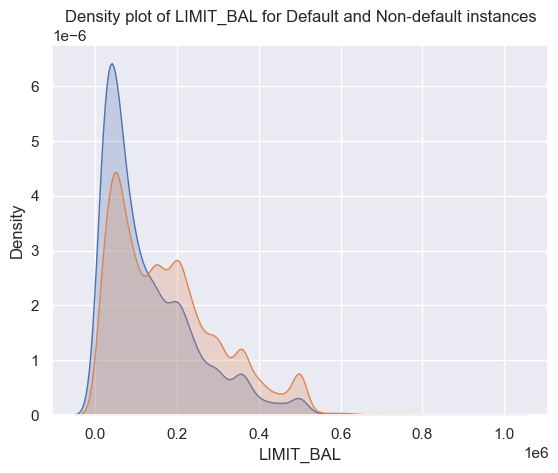

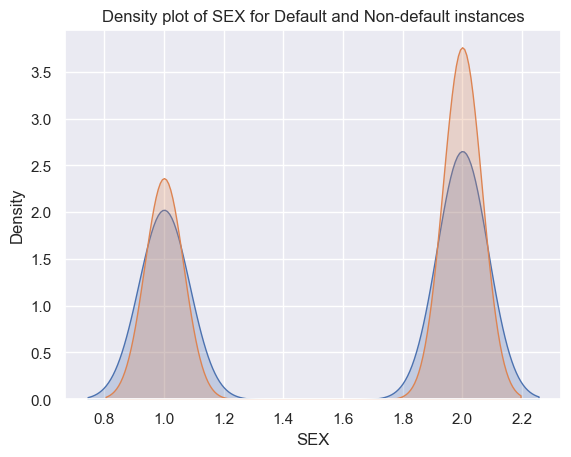

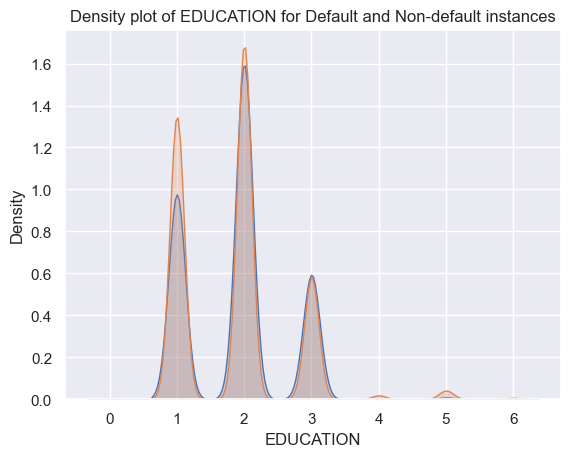

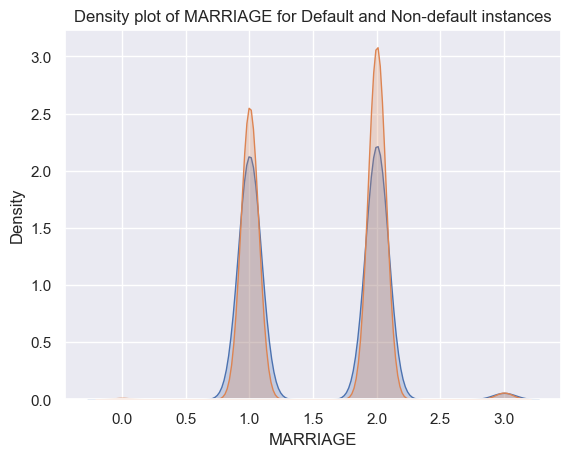

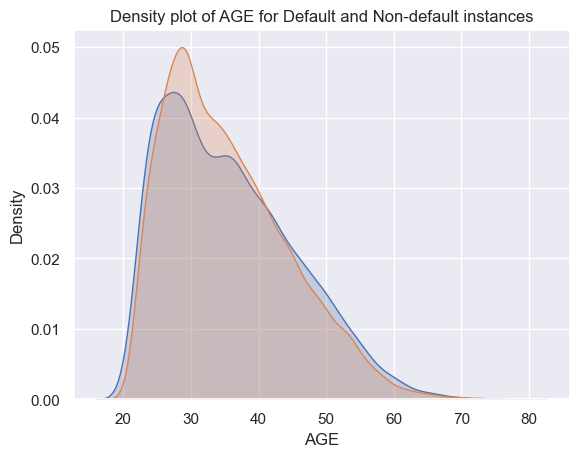

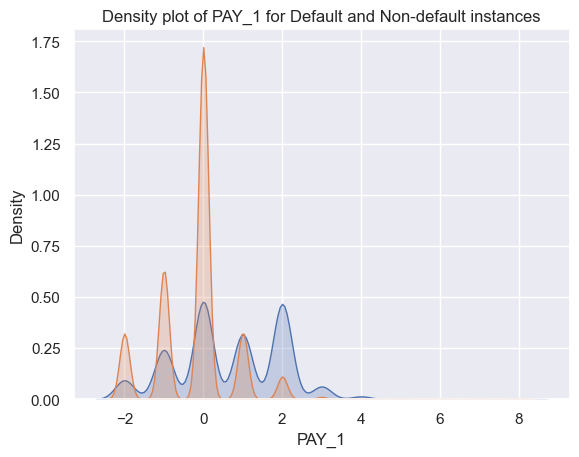

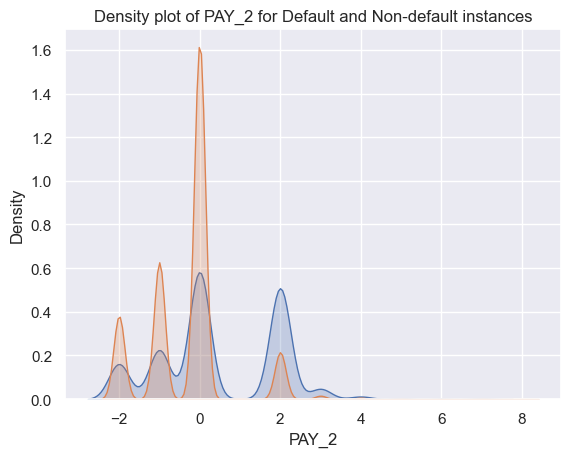

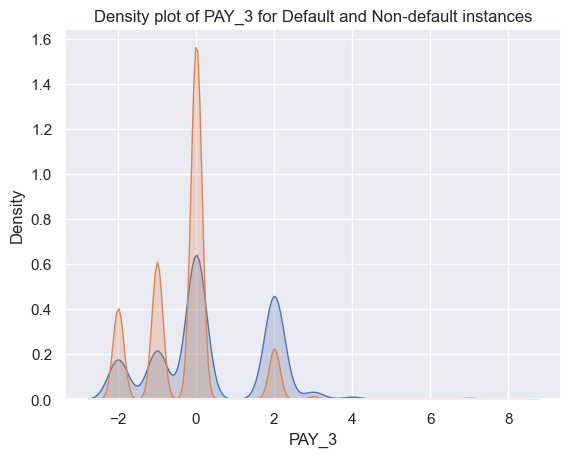

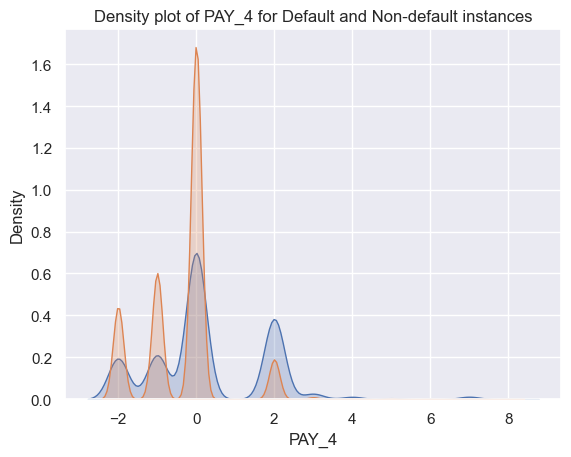

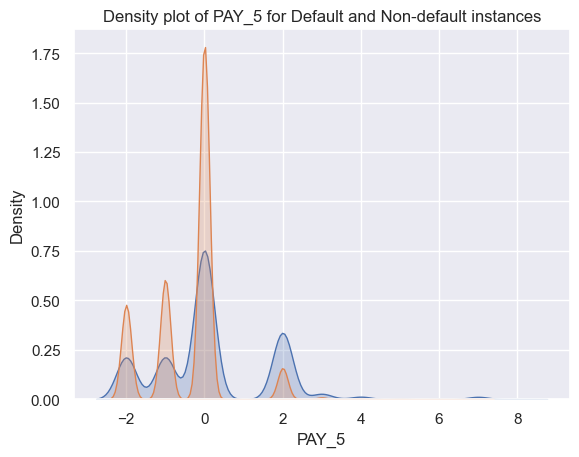

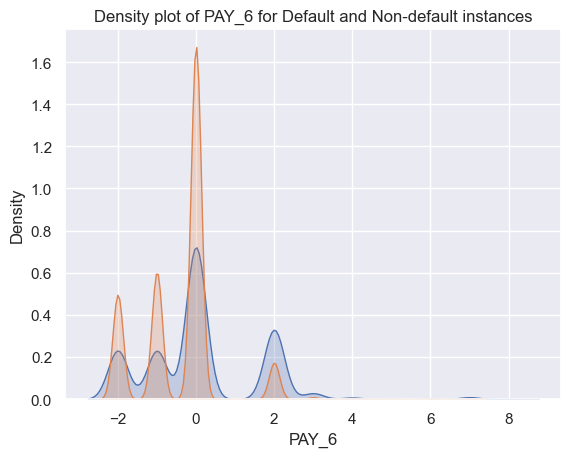

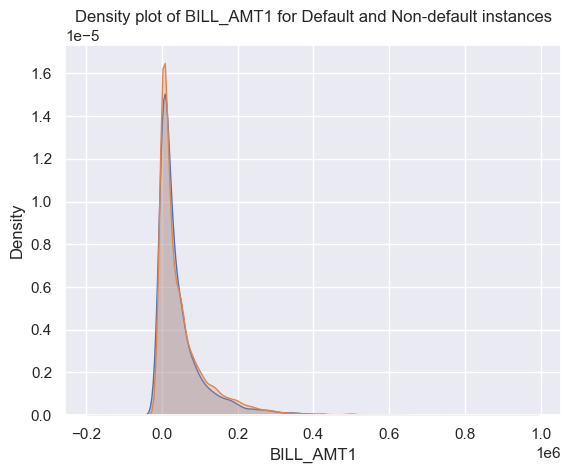

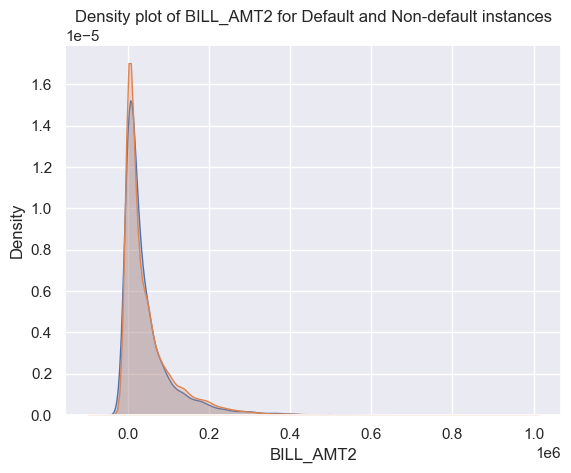

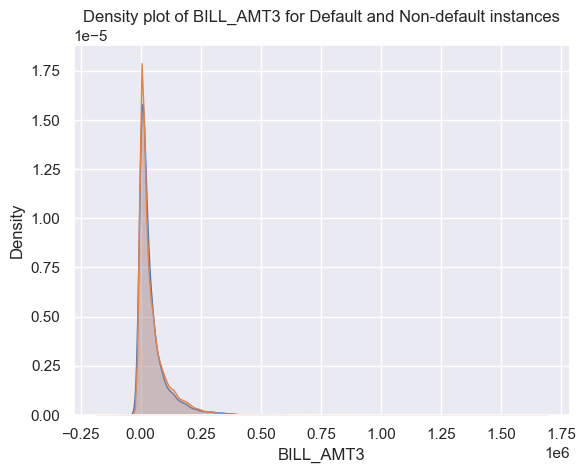

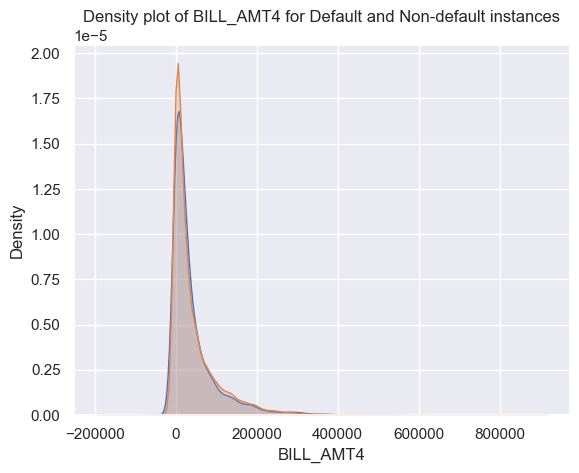

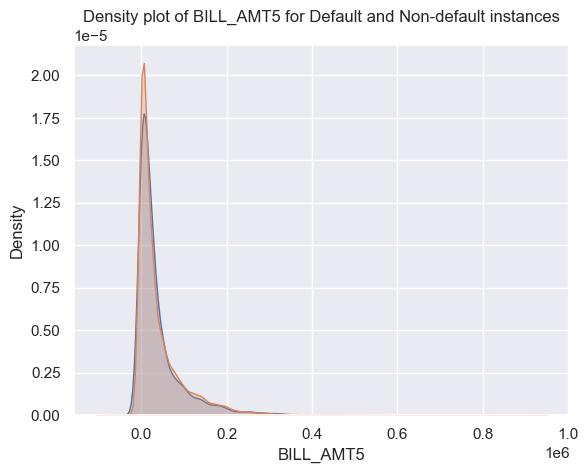

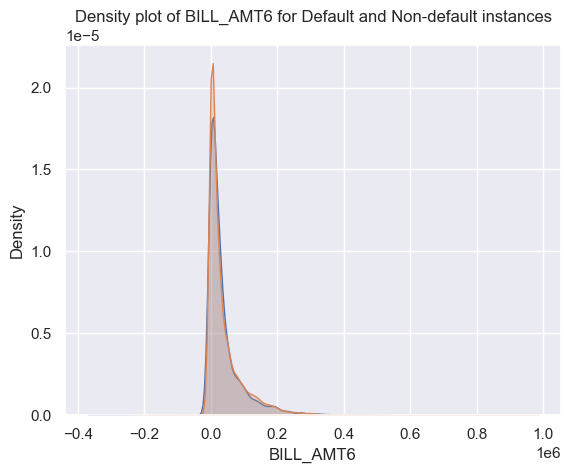

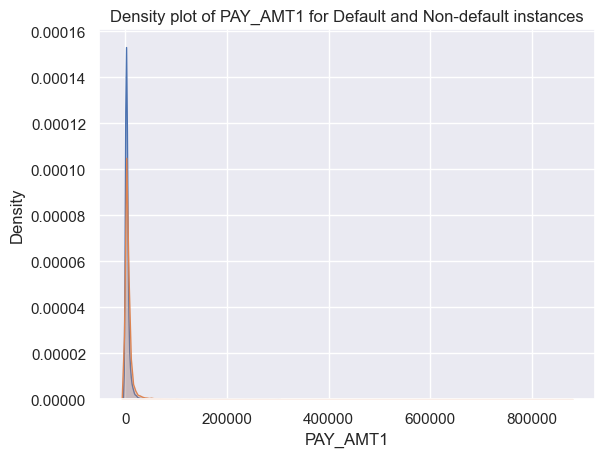

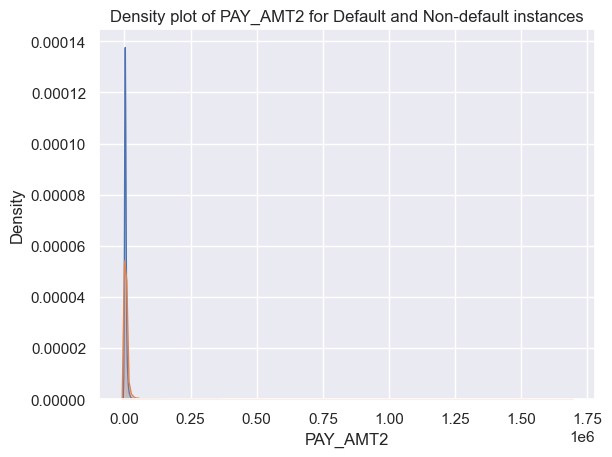

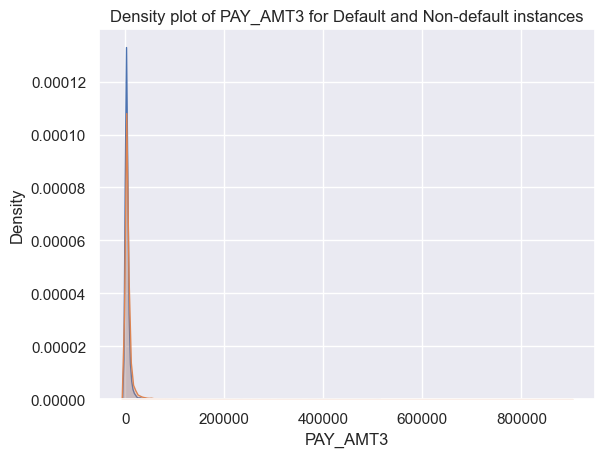

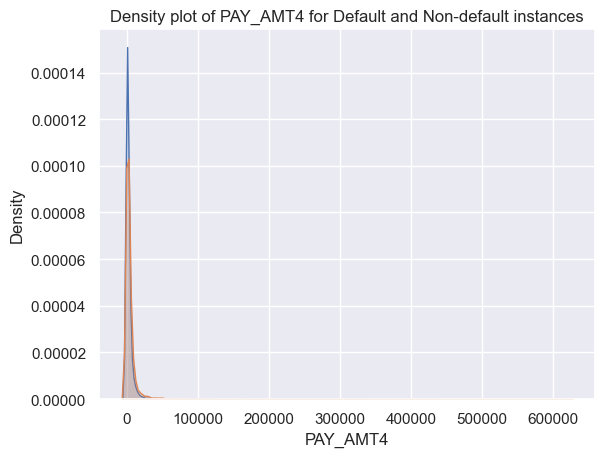

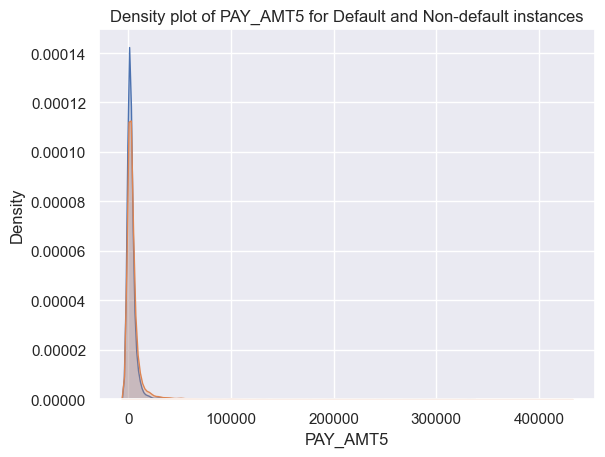

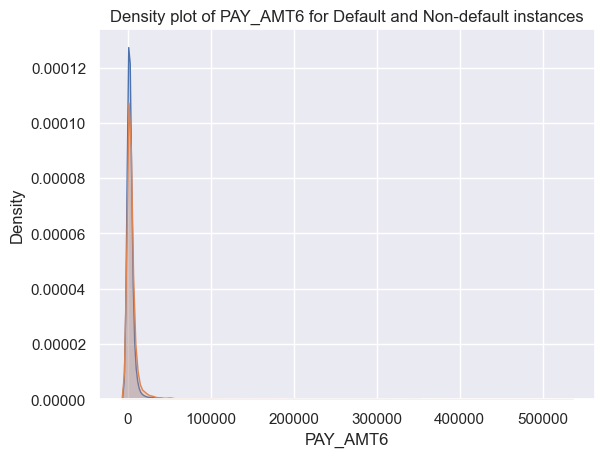

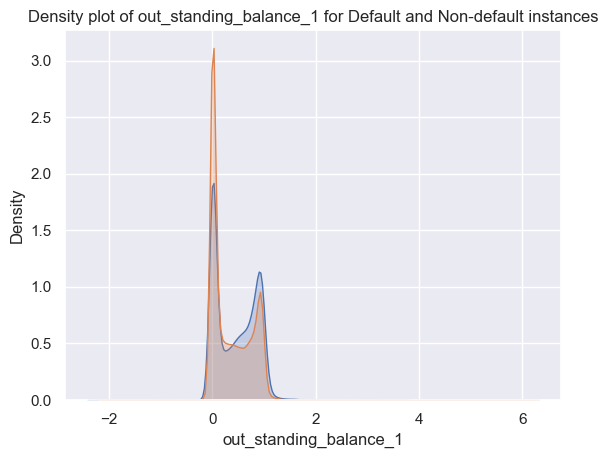

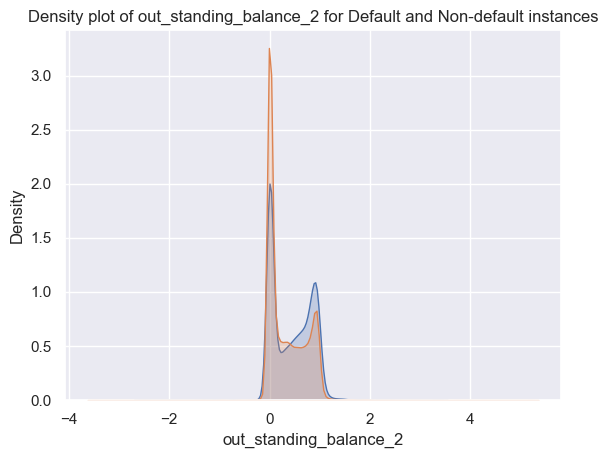

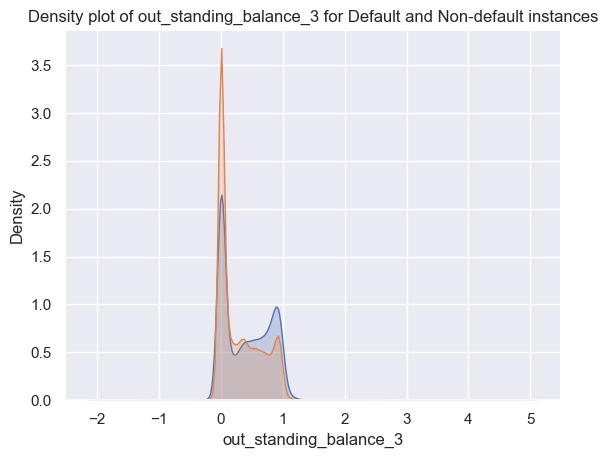

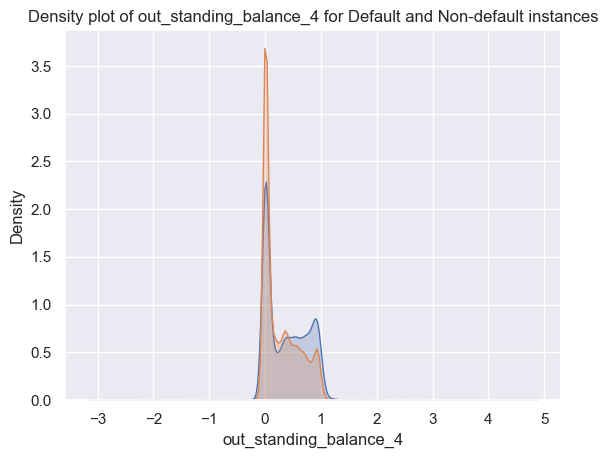

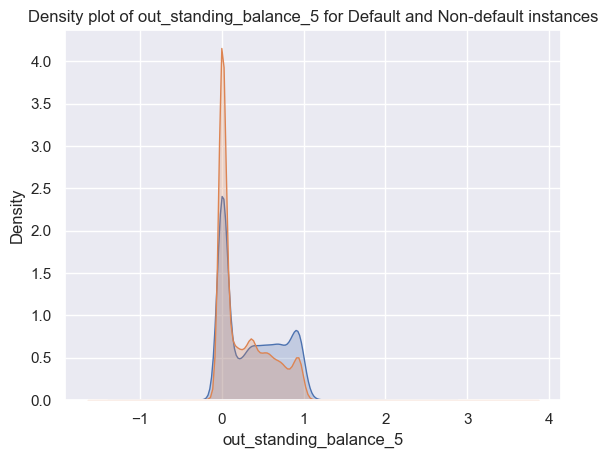

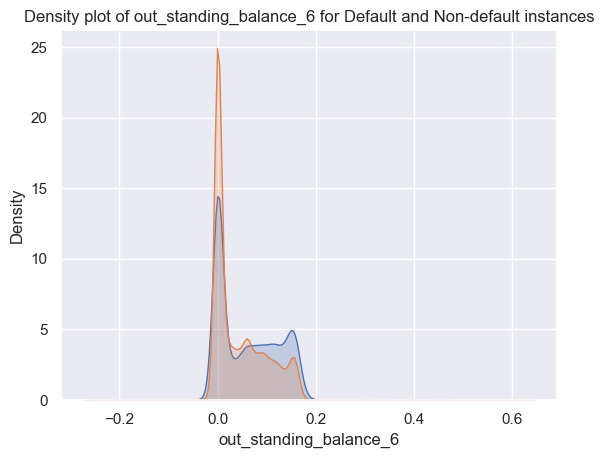

In [18]:


# Subset the data to include instances where "Default" is 1(red) or 0(blue)
default_data = data[data['Default'] == 1]
non_default_data = data[data['Default'] == 0]

# Loop through each feature in the dataset and create a density plot for each class
for feature in data.columns:
    # Skip the "Default" feature as it is the target variable
    if feature == "Default":
        continue
    # Create a density plot for the feature in both the "Default" and "Non-default" classes
    sns.kdeplot(default_data[feature], shade=True, label="Default")
    sns.kdeplot(non_default_data[feature], shade=True, label="Non-default")
    plt.title(f"Density plot of {feature} for Default and Non-default instances")
    plt.show()


## Remaining functions in this section are for further Data exploration

Visualizing repayment status of credit card clients with defaults

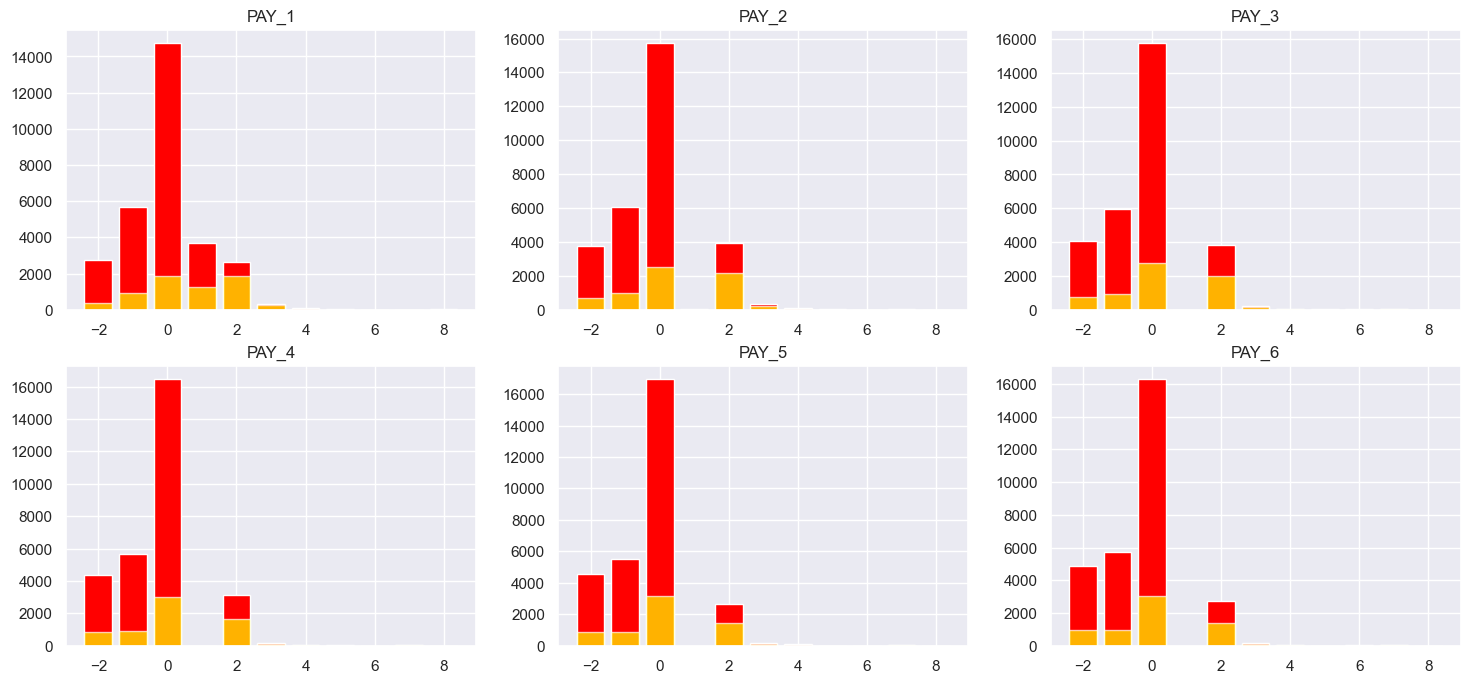

In [19]:
# Set the figure size
fig, ax = plt.subplots(figsize=(18, 8))

# Get the columns for PAY_1 through PAY_6
pay_columns = [f'PAY_{i}' for i in range(1, 7)]

# Create a 2x3 grid of plots
for i, col in enumerate(pay_columns):
    # Calculate the value counts of each value in the column
    value_counts = data[col].value_counts()
    # Calculate the value counts of each value in the column where 'Default' is 1
    default_counts = data[col][data['Default'] == 1].value_counts()

    # Plot the value counts and the default counts side by side on the same plot
    ax = plt.subplot(2, 3, i+1)
    ax.bar(value_counts.index, value_counts, align='center', color='red')
    ax.bar(default_counts.index, default_counts, align='center', color='yellow', alpha=0.7)

    # Set the title for the plot
    ax.set_title(col)

# Display the plot
plt.show()


Visualizing BILL_AMT clients with defaults

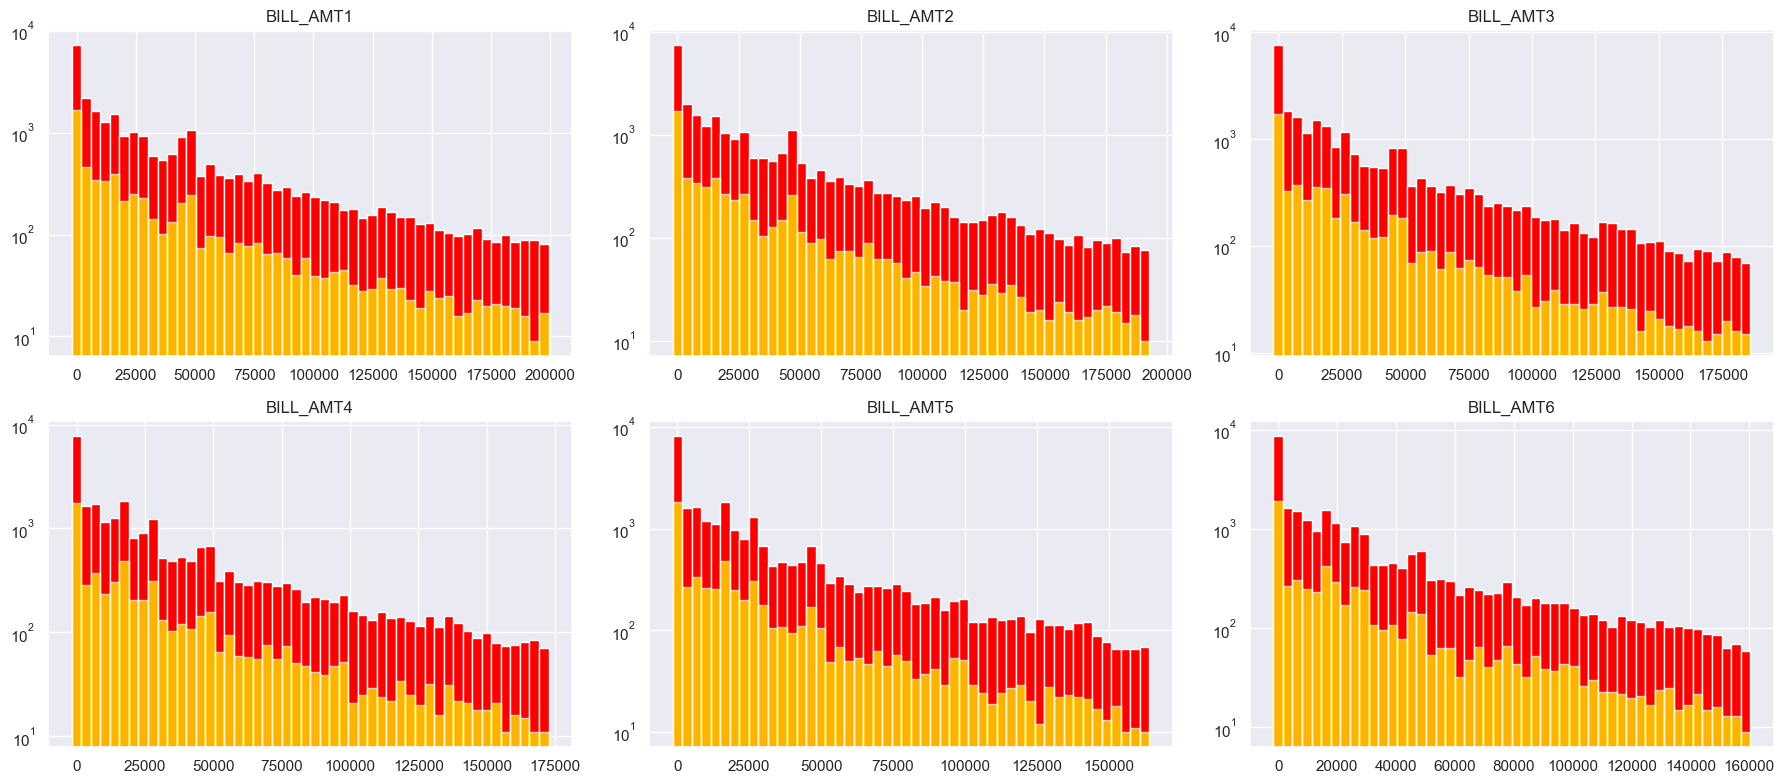

In [20]:
import numpy as np

# Set the figure size
fig, ax = plt.subplots(figsize=(18, 8))

# Get the columns for PAY_AMT1 through PAY_AMT6
pay_amt_columns = [f'BILL_AMT{i}' for i in range(1, 7)]

# Set the number of bins for aggregation
num_bins = 50

# Create a 2x3 grid of plots
for i, col in enumerate(pay_amt_columns):
    # Calculate the 95th percentile of the dataset
    percentile_95 = np.percentile(data[col], 95)

    # Create bins from 0 to the 95th percentile value
    bins = np.linspace(0, percentile_95, num_bins + 1)

    # Calculate the histogram of each value in the column
    value_counts, _ = np.histogram(data[col], bins=bins)
    
    # Calculate the histogram of each value in the column where 'Default' is 1
    default_counts, _ = np.histogram(data[col][data['Default'] == 1], bins=bins)

    # Plot the histograms side by side on the same plot
    ax = plt.subplot(2, 3, i+1)
    ax.bar(bins[:-1], value_counts, width=(bins[1] - bins[0]), align='center', color='red')
    ax.bar(bins[:-1], default_counts, width=(bins[1] - bins[0]), align='center', color='yellow', alpha=0.7)

    # Set the title for the plot
    ax.set_title(col)

    # Set the y-axis to logarithmic scale
    ax.set_yscale('log')

# Display the plot
plt.tight_layout()
plt.show()


Visualizing PAY_AMT with defaults

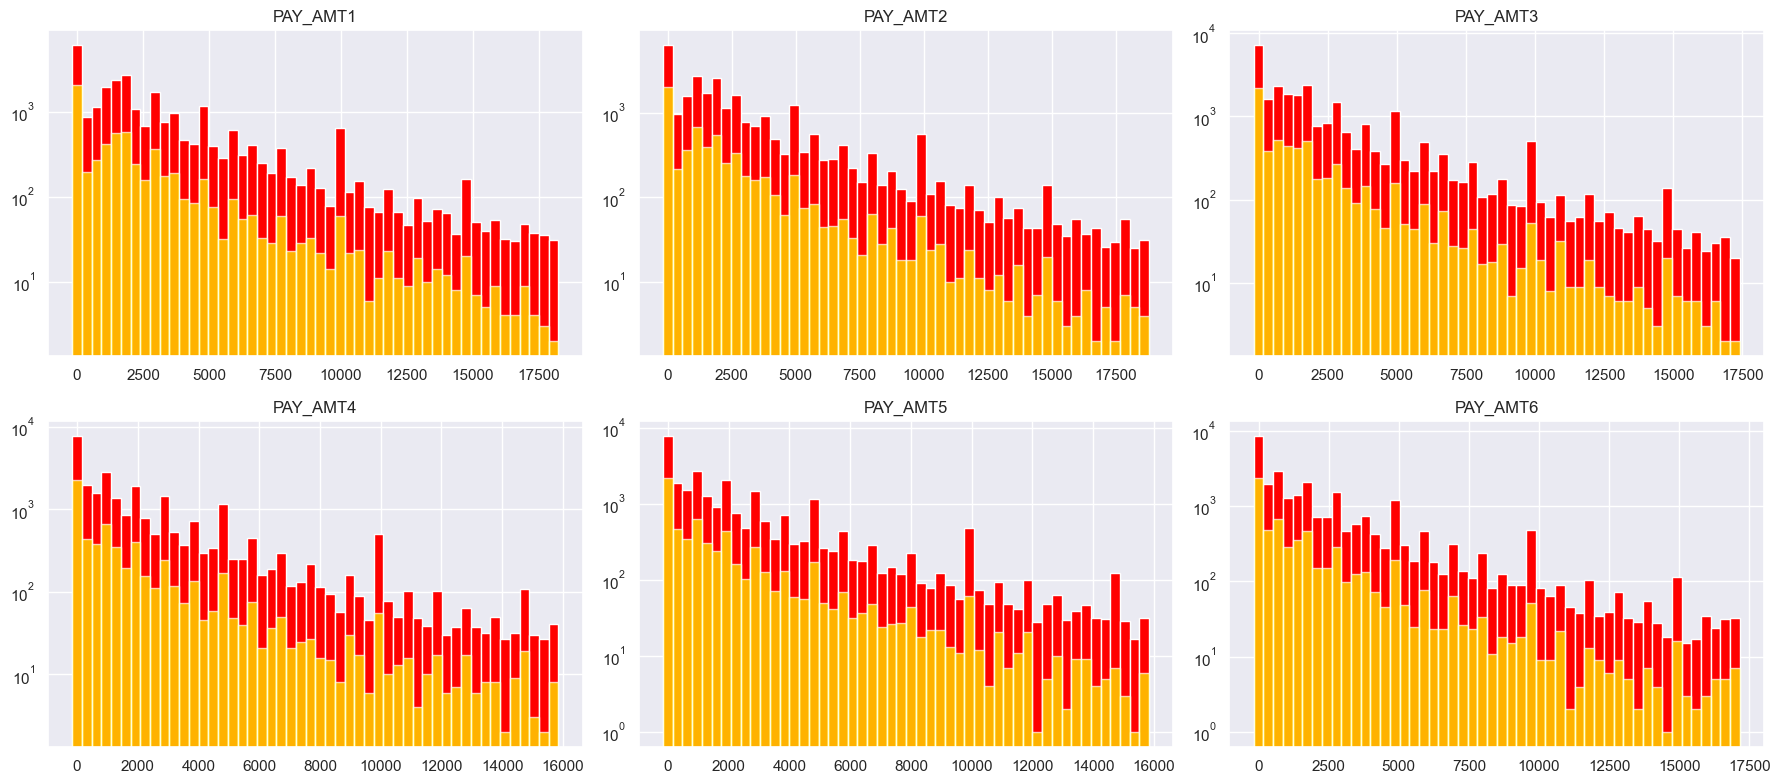

In [21]:
import numpy as np

# Set the figure size
fig, ax = plt.subplots(figsize=(18, 8))

# Get the columns for PAY_AMT1 through PAY_AMT6
pay_amt_columns = [f'PAY_AMT{i}' for i in range(1, 7)]

# Set the number of bins for aggregation
num_bins = 50

# Create a 2x3 grid of plots
for i, col in enumerate(pay_amt_columns):
    # Calculate the 95th percentile of the dataset
    percentile_95 = np.percentile(data[col], 95)

    # Create bins from 0 to the 95th percentile value
    bins = np.linspace(0, percentile_95, num_bins + 1)

    # Calculate the histogram of each value in the column
    value_counts, _ = np.histogram(data[col], bins=bins)
    
    # Calculate the histogram of each value in the column where 'Default' is 1
    default_counts, _ = np.histogram(data[col][data['Default'] == 1], bins=bins)

    # Plot the histograms side by side on the same plot
    ax = plt.subplot(2, 3, i+1)
    ax.bar(bins[:-1], value_counts, width=(bins[1] - bins[0]), align='center', color='red')
    ax.bar(bins[:-1], default_counts, width=(bins[1] - bins[0]), align='center', color='yellow', alpha=0.7)

    # Set the title for the plot
    ax.set_title(col)

    # Set the y-axis to logarithmic scale
    ax.set_yscale('log')

# Display the plot
plt.tight_layout()
plt.show()


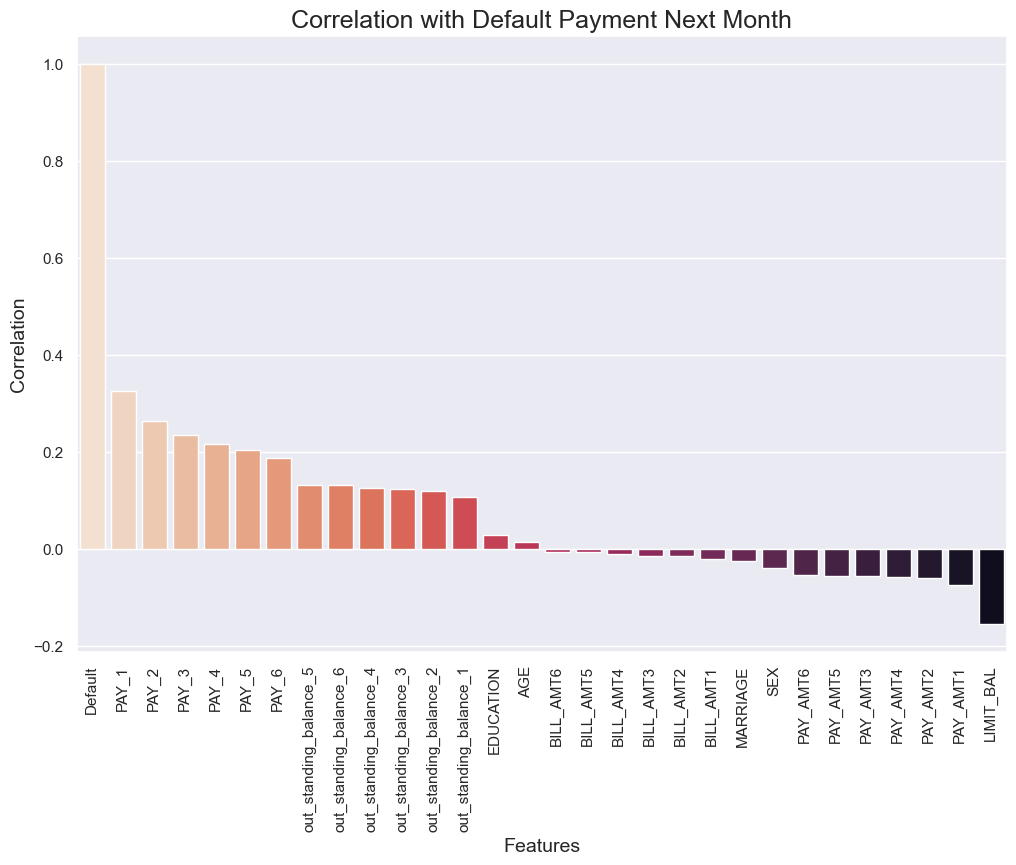

In [22]:
# Get the feature correlations with target
corr = data.corr()['Default'].sort_values(ascending=False)

# Set the color palette
colors = sns.color_palette('rocket_r', len(corr))

# Create a bar plot of feature correlations
plt.figure(figsize=(12,8))
sns.barplot(x=corr.index, y=corr.values, palette=colors)

# Set the title and axis labels
plt.title('Correlation with Default Payment Next Month', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


Generating pair plots for different groups of columns in a random subset of data

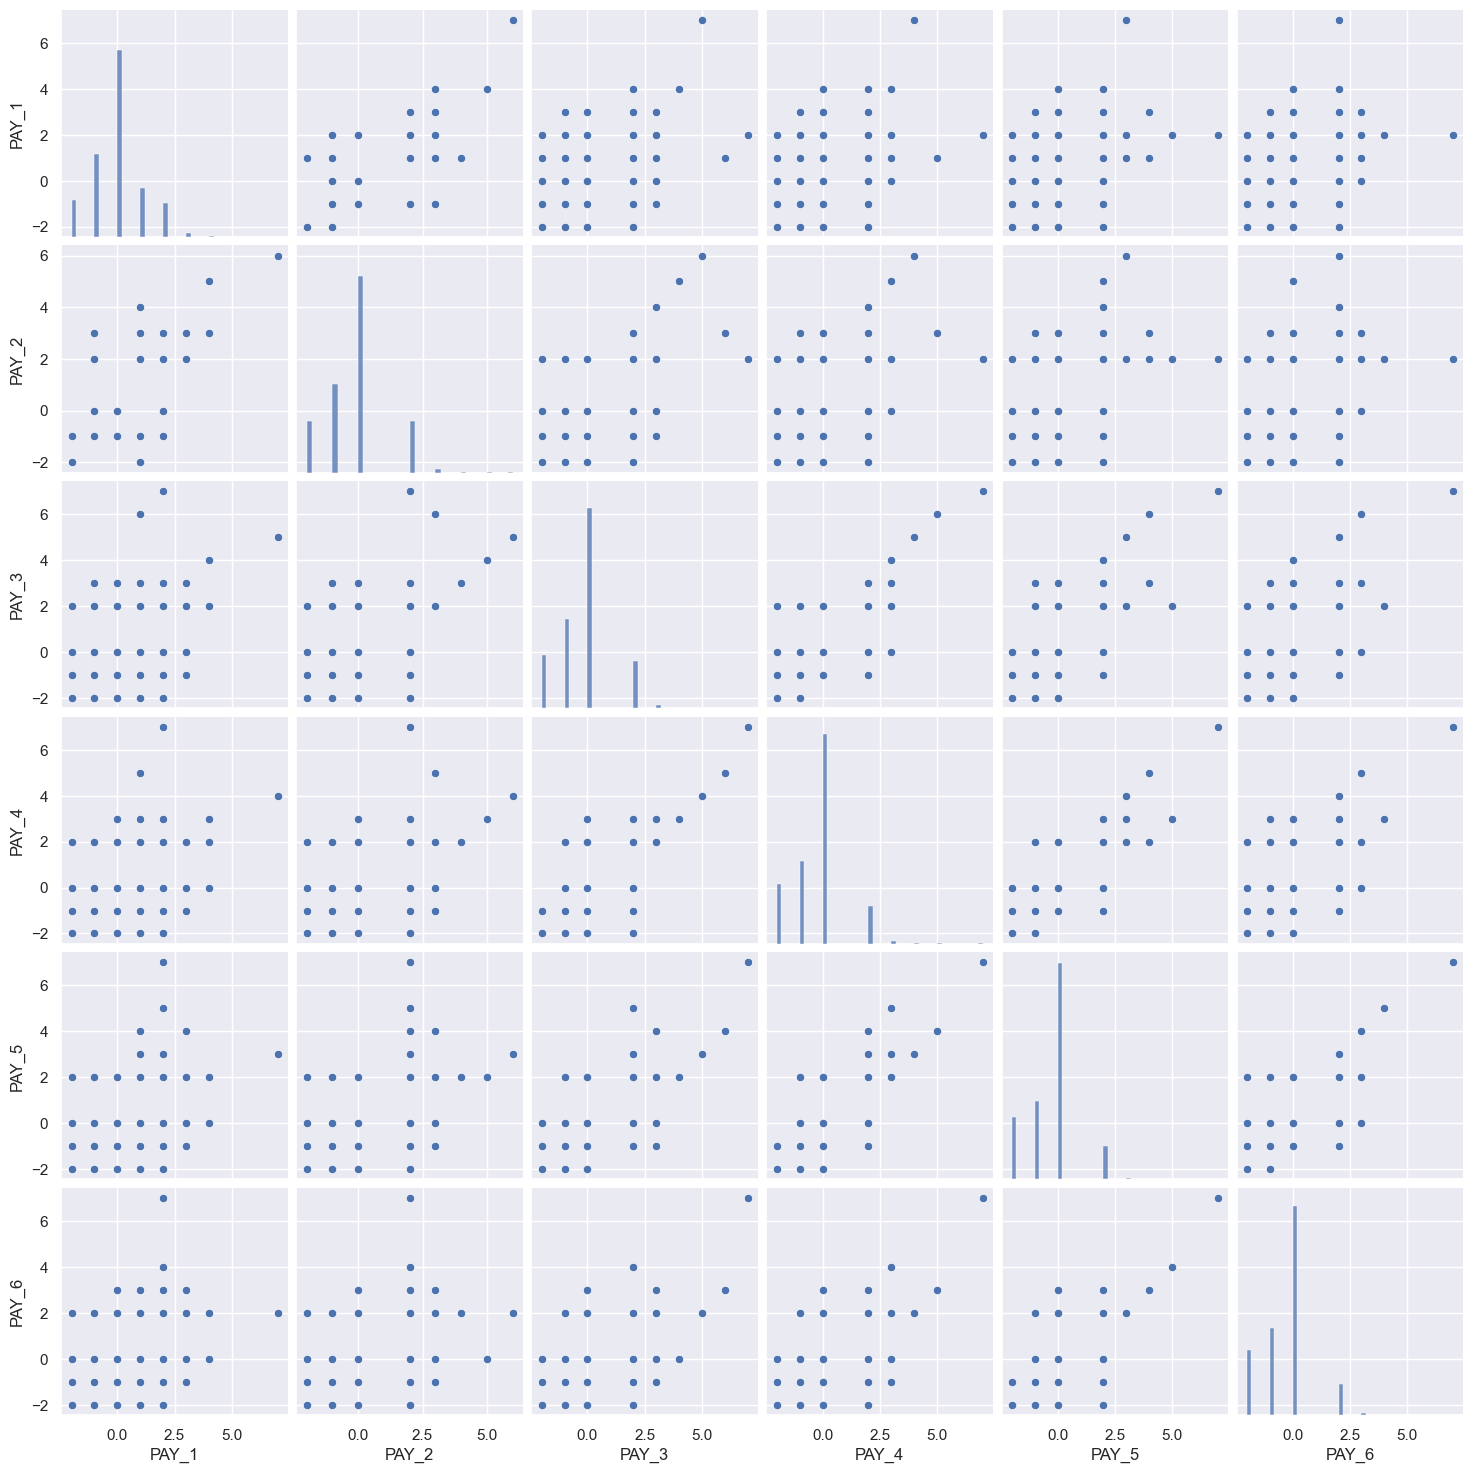

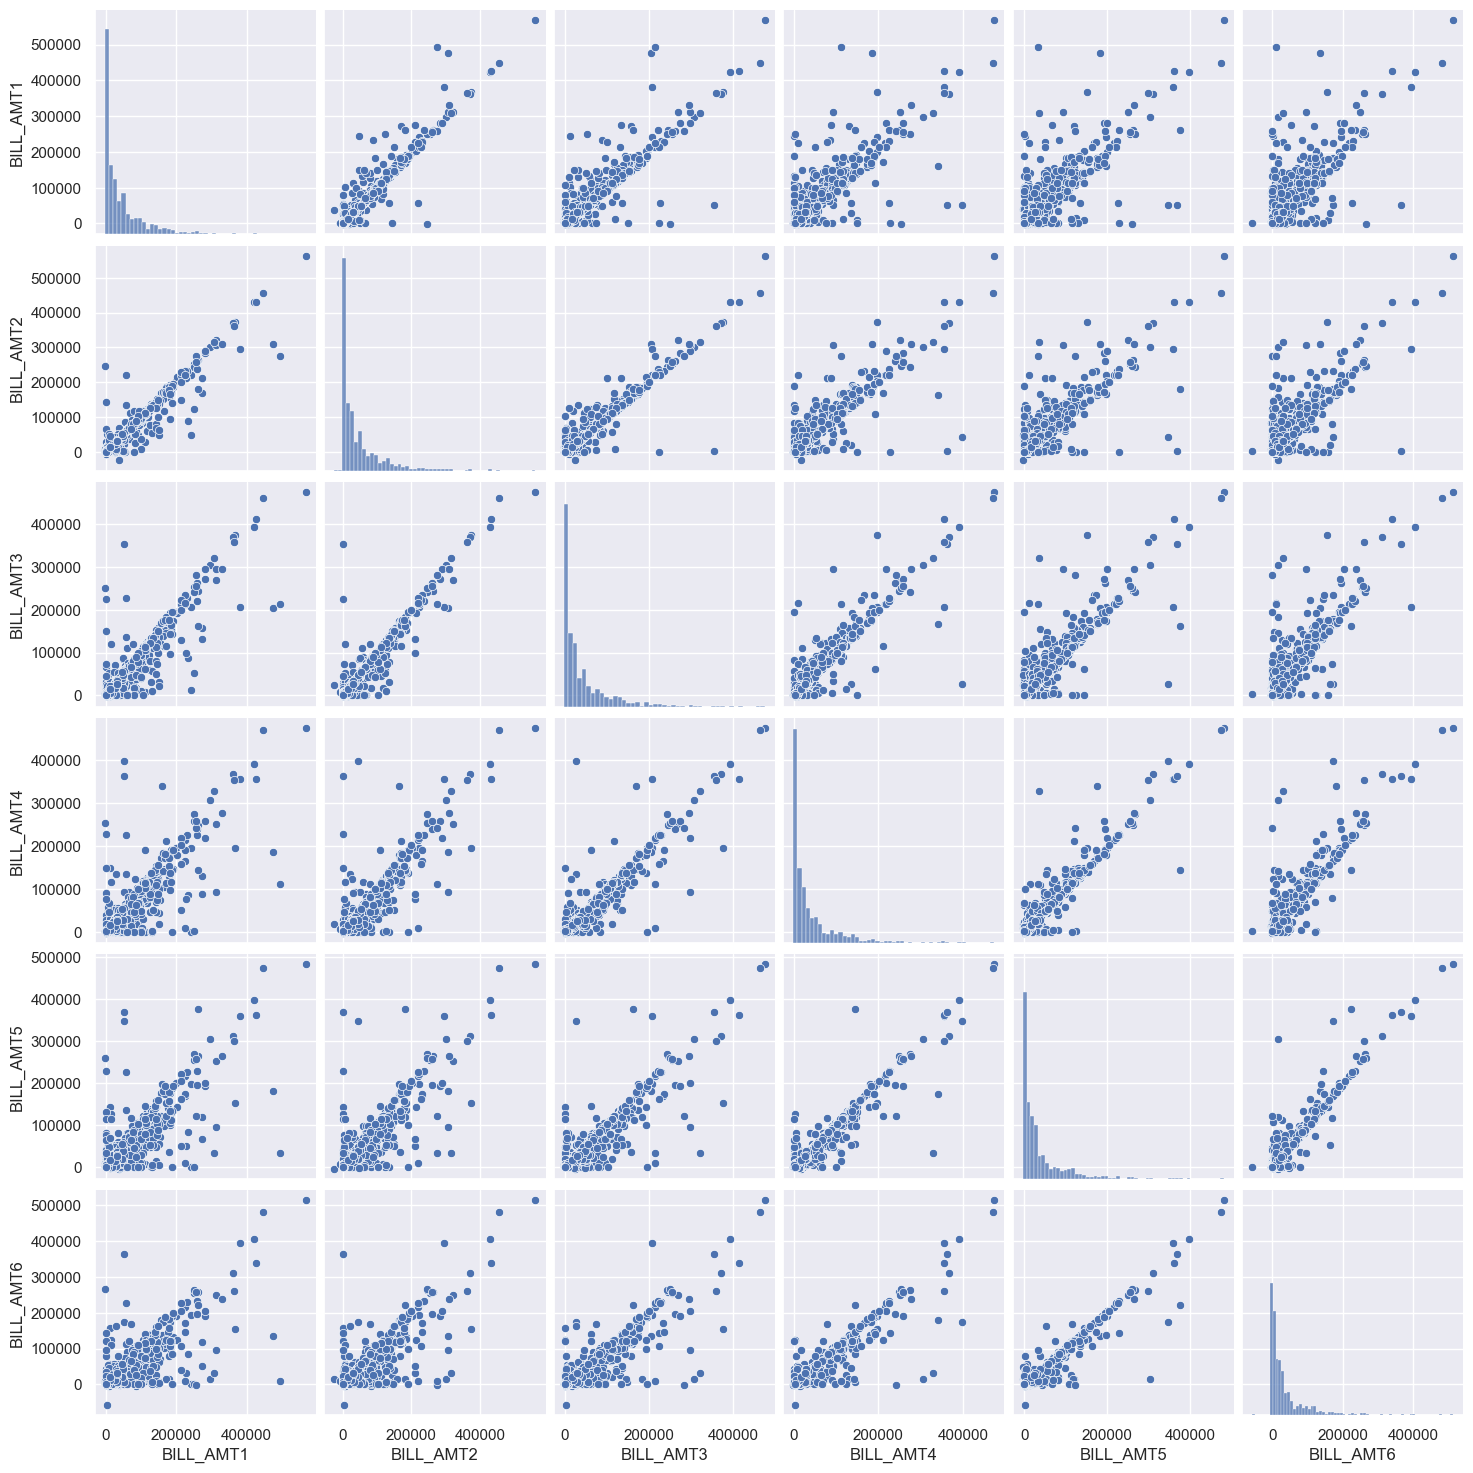

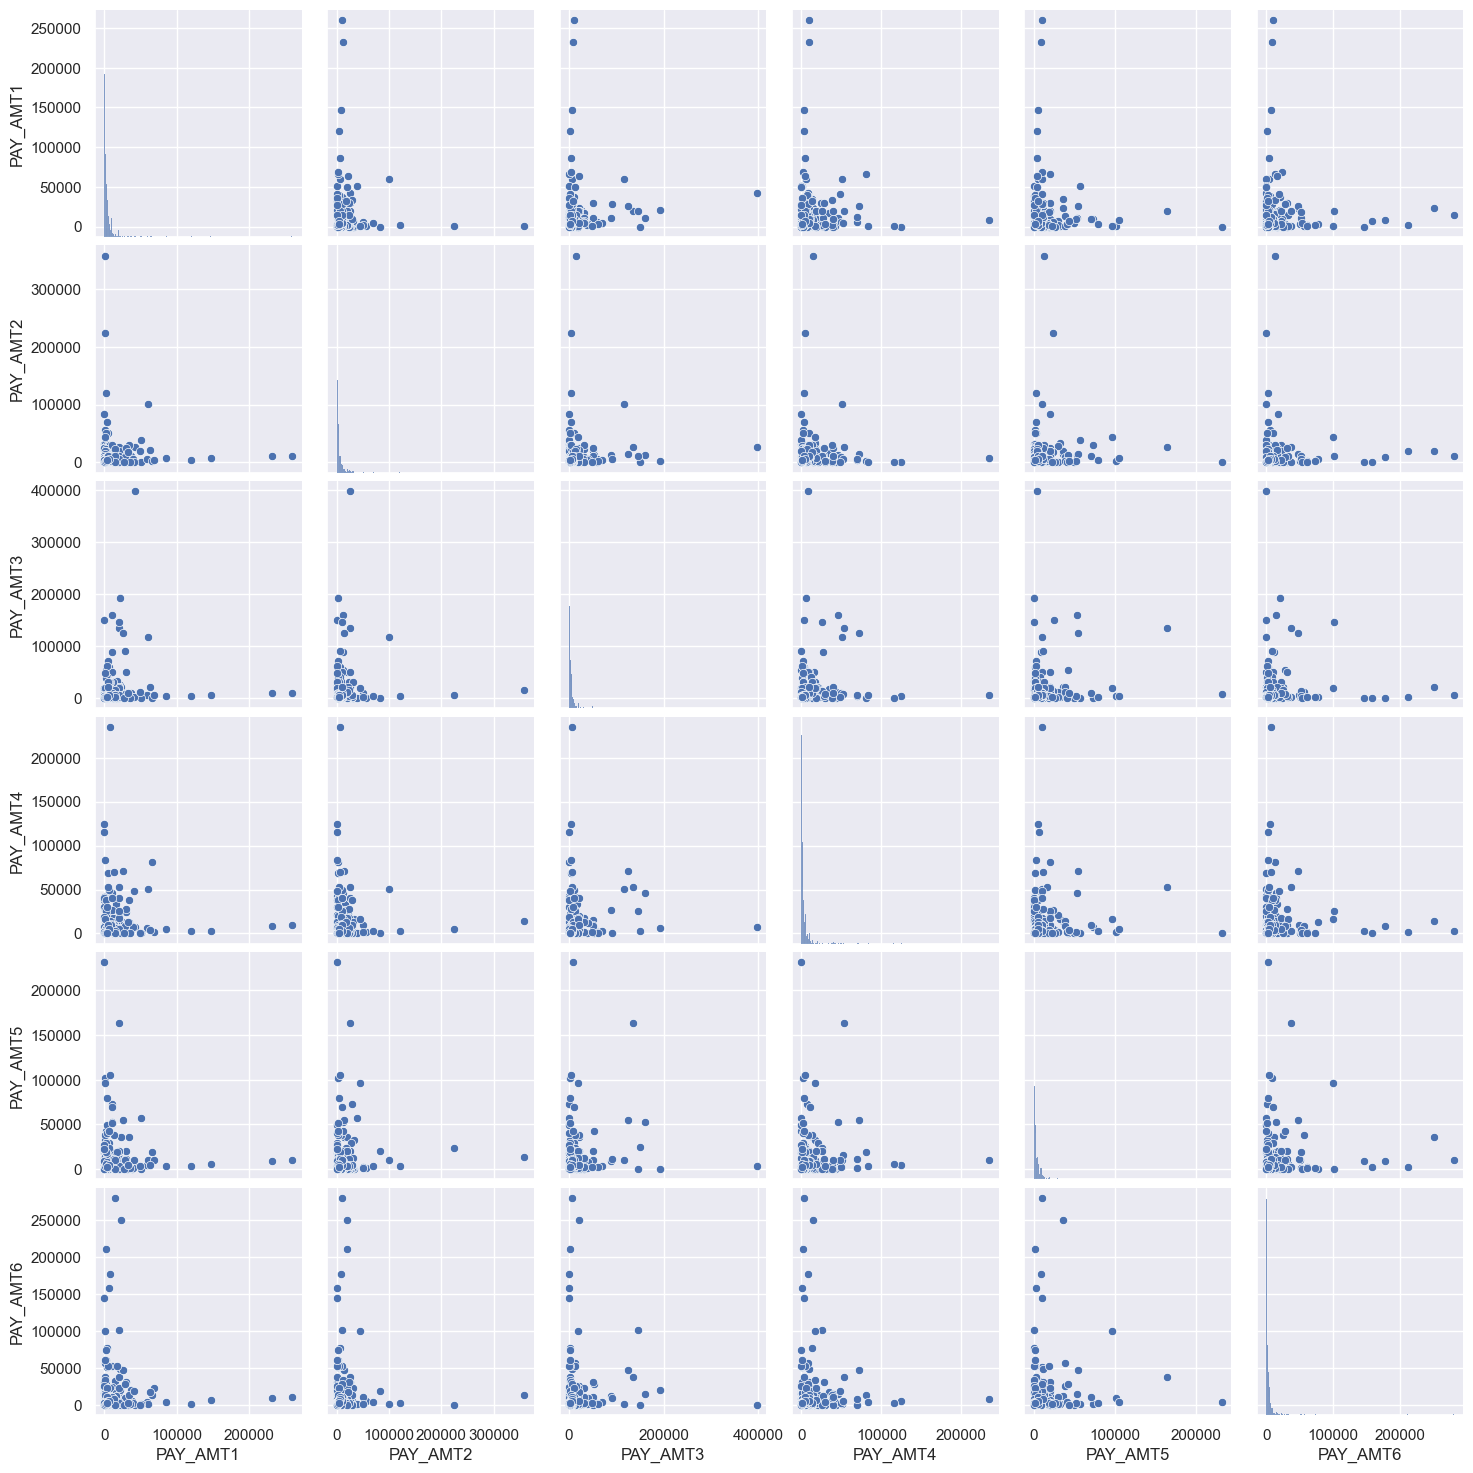

In [23]:


# Set the number of samples to use for the pair plot
num_samples = 1000

# Select a random subset of rows from the dataset
data_sample = data.sample(n=num_samples)

# Create a list of columns to include in the pair plot
pay_cols = [f'PAY_{i}' for i in range(1, 7)]
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
payamt_cols = [f'PAY_AMT{i}' for i in range(1, 7)]

# Generate the pair plots for each group of columns separately
sns.pairplot(data_sample[pay_cols], kind='scatter', diag_kind='hist')
sns.pairplot(data_sample[bill_cols], kind='scatter', diag_kind='hist')
sns.pairplot(data_sample[payamt_cols], kind='scatter', diag_kind='hist')

# Display the plots
plt.show()


Distribution of Credit Limit

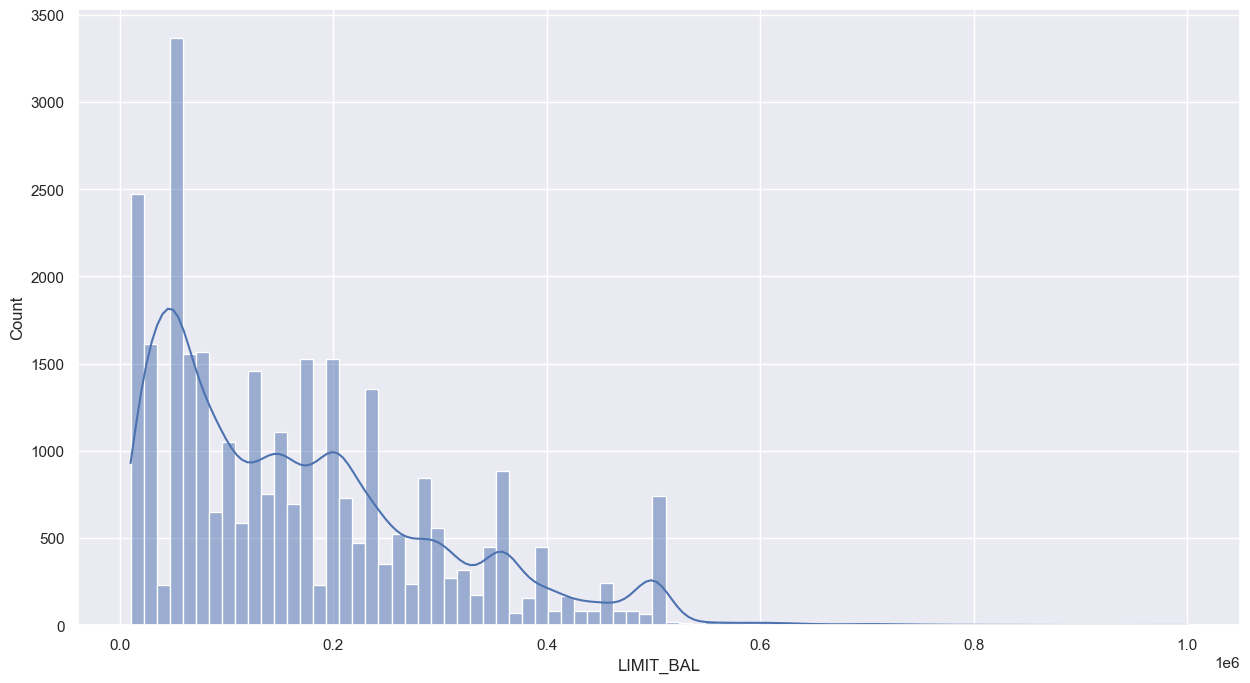

In [24]:
plt.figure(figsize=(15, 8))
sns.histplot(x=data['LIMIT_BAL'], kde=True)
plt.show()

<Axes: >

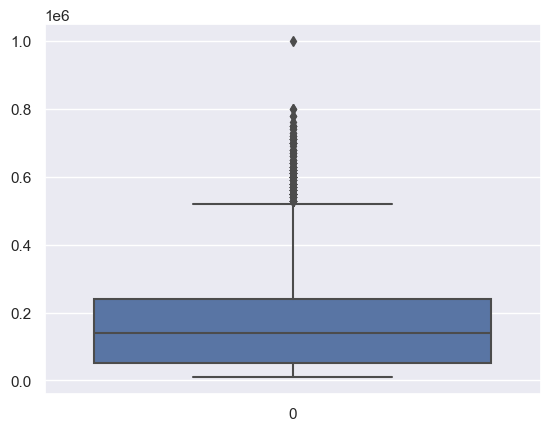

In [25]:
sns.boxplot(data['LIMIT_BAL'])

In the next cell we clean the data to remove any of the irregularities shown in the previous graphs

In [6]:

def find_and_replace_outliers(data):
    sorted_data = sorted(data)
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    outliers = [value for value in sorted_data if (value < lower_bound or value > upper_bound)]

    tenth_percentile = np.percentile(sorted_data, 10)
    ninetieth_percentile = np.percentile(sorted_data, 90)
    
    replaced_outliers = np.where(data < lower_bound, tenth_percentile, data)
    replaced_outliers = np.where(replaced_outliers > upper_bound, ninetieth_percentile, replaced_outliers)

    return replaced_outliers

replaced_outliers = find_and_replace_outliers(data['LIMIT_BAL'])



data['LIMIT_BAL'] = replaced_outliers



# Remove rows where 'MARRIAGE' category is 0 (undocumented)
data = data[data['MARRIAGE'] != 0]

# Remove rows where 'EDUCATION' category is 0, 5, or 6 (unknown)
data = data[data['EDUCATION'].isin([1, 2, 3, 4])]

# Update PAY_n categories to group -2 and 0 as -1, and leave other categories untouched
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in pay_cols:
    # Combine categories -2 and 0 into a single category -1 for pay duty
    data[col] = data[col].apply(lambda x: -1 if x in [-2, 0] else x)
    
    # Convert the column to integer type
    data[col] = data[col].astype('int64')
    
# Here we can check that we have made the right changes

for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    unique_vals = data[att].unique()
    print(f"Unique values in {att}: {unique_vals}")
    
    
# Select categorical columns
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

# Convert categorical columns to 'category' type
data[cat_cols] = data[cat_cols].astype('category')

# One-hot encode categorical columns and concatenate with original data
data = pd.concat([pd.get_dummies(data[cat_cols], prefix=cat_cols), data], axis=1)

# Drop original categorical columns
data.drop(cat_cols, axis=1, inplace=True)


# create a copy of the original dataframe
dataset = data.copy()

# columns to standardize
cols_to_scale = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


# standardisation is saved for inside the train test split funcitions to avoid any possible 
#data leakage

Unique values in PAY_1: [ 2 -1  1  3  4  8  7  5  6]
Unique values in PAY_2: [ 2 -1  3  5  7  4  1  6  8]
Unique values in PAY_3: [-1  2  3  4  6  7  1  5  8]
Unique values in PAY_4: [-1  2  3  4  5  7  6  1  8]
Unique values in PAY_5: [-1  2  3  5  4  7  8  6]
Unique values in PAY_6: [-1  2  3  6  4  7  8  5]


## Next we create our benchmark which will be a random forest model

In [7]:
def RF_train_test_split(df, ratio, cols_to_scale):
    """
    Split the dataframe into train and test sets with the specified ratio, and standardize the specified columns separately
    """
    length = len(df)
    idx = int(length * ratio)  # Calculate the index for splitting the dataframe
    df_train = df.iloc[:idx, :]  # Split the dataframe into training set
    df_test = df.iloc[idx:, :]  # Split the dataframe into test set

    print(df_train.shape)  # Print the shape of the training set
    print(df_test.shape)  # Print the shape of the test set

    # Standardize columns in train and test sets separately
    scaler_train = StandardScaler()
    df_train_scaled = df_train.copy()
    df_train_scaled[cols_to_scale] = scaler_train.fit_transform(df_train[cols_to_scale])

    scaler_test = StandardScaler()
    df_test_scaled = df_test.copy()
    df_test_scaled[cols_to_scale] = scaler_test.fit_transform(df_test[cols_to_scale])

    return df_train_scaled, df_test_scaled

# Specify the columns to standardize
cols_to_scale = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Split the dataset into training and test sets using the function
df_train, df_test = RF_train_test_split(dataset, 0.8, cols_to_scale)

# Extract the feature columns from the training and test sets
X_train = df_train.drop('Default',axis=1)
X_test = df_test.drop('Default',axis=1)

# Extract the response variable from the training and test sets
y_train = df_train['Default']
y_test = df_test['Default']


from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN()
X_train, y_train = smoteenn.fit_resample(X_train, y_train)


(23680, 36)
(5921, 36)


Default RandomForestClassifier:
Accuracy score: 0.704
ROC AUC score: 0.693
Precision score: 0.387
F1-score: 0.492
F2-score: 0.586
Recall score: 0.673


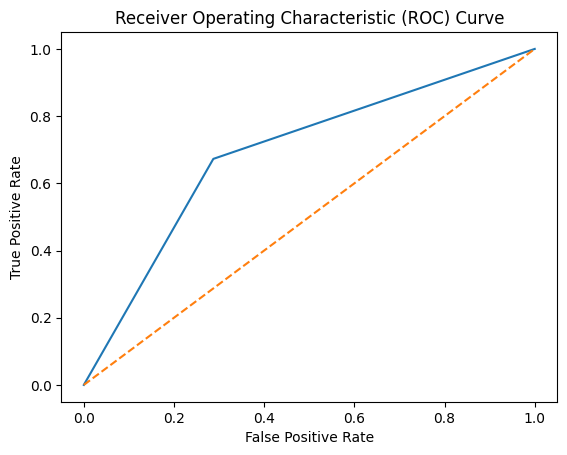

ROC AUC score: 0.693


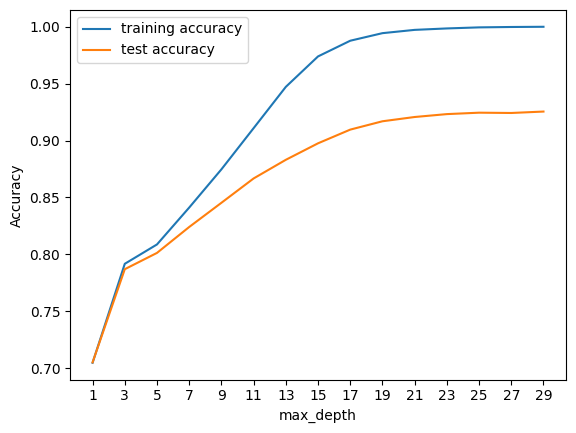

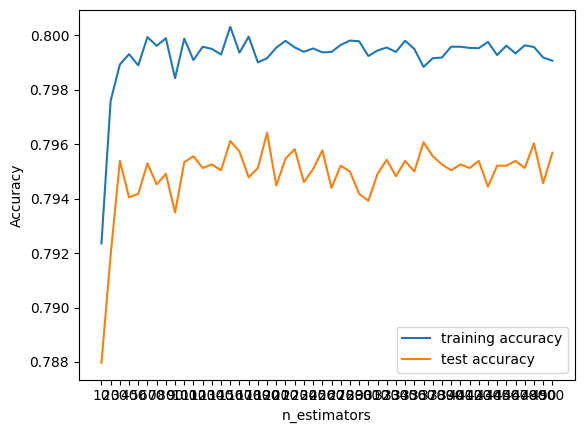

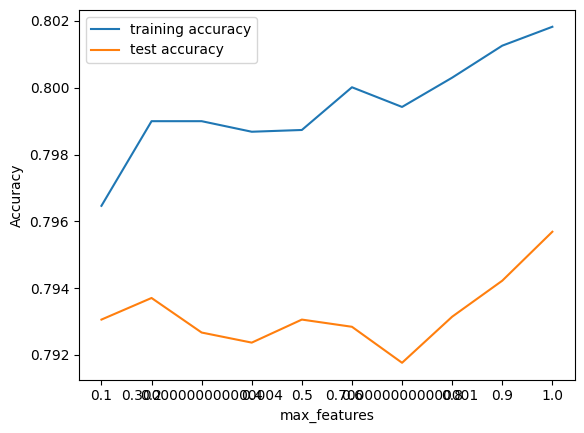

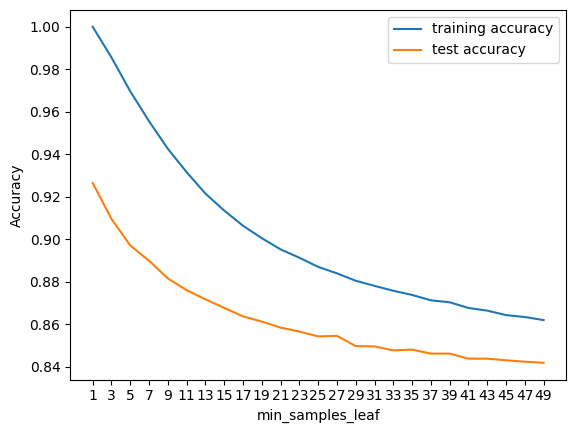

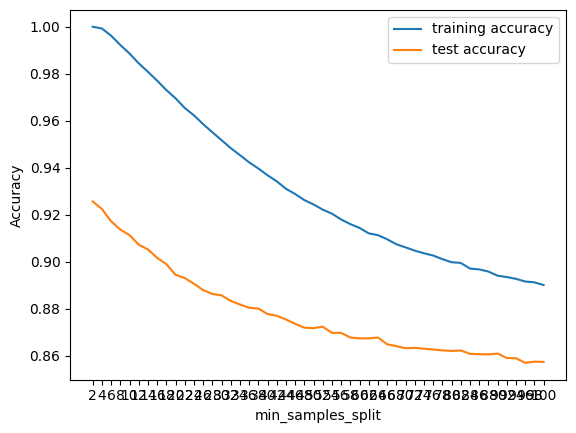

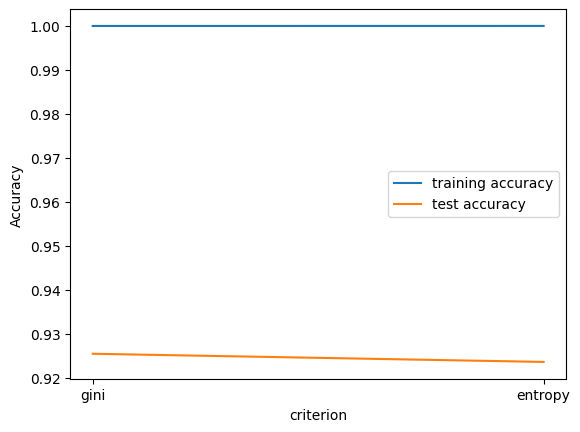

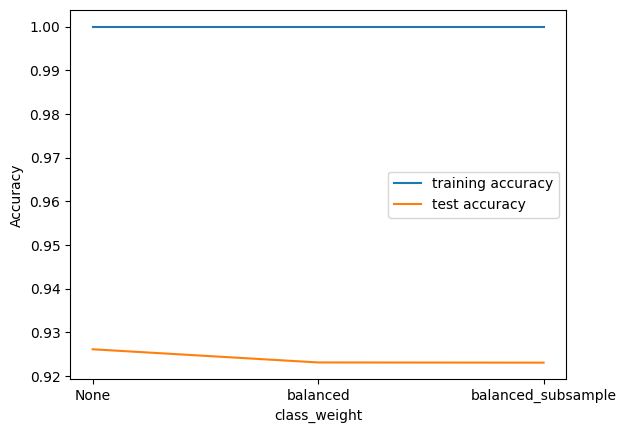

{'max_depth': 29}
{'n_estimators': 190}
{'max_features': 1.0}
{'min_samples_leaf': 1}
{'min_samples_split': 2}
{'criterion': 'gini'}
{'class_weight': None}
Tuned RandomForestClassifier:
Accuracy score: 0.661
ROC AUC score: 0.687
Precision score: 0.356
F1-score: 0.479
F2-score: 0.604
Recall score: 0.732


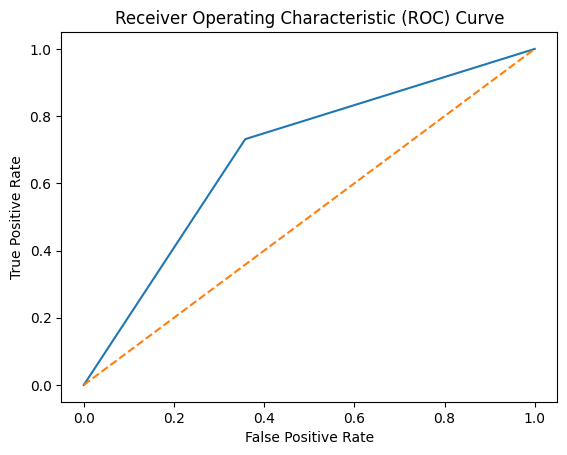

ROC AUC score: 0.687


In [8]:
def plot_roc_curve(y_test, predictions, title="Receiver Operating Characteristic (ROC) Curve"):
    roc_auc = roc_auc_score(y_test, predictions)
    fpr, tpr, _ = roc_curve(y_test, predictions)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.show()

    return roc_auc

def evaluate_classifier(y_test, predictions):

    print(f"Accuracy score: {accuracy_score(y_test, predictions):.3f}")
    print(f"ROC AUC score: {roc_auc_score(y_test, predictions):.3f}")
    print(f"Precision score: {precision_score(y_test, predictions):.3f}")
    print(f"F1-score: {f1_score(y_test, predictions):.3f}")
    print(f"F2-score: {fbeta_score(y_test, predictions, beta=2):.3f}")
    print(f"Recall score: {recall_score(y_test, predictions):.3f}")
    
    roc_auc = plot_roc_curve(y_test, predictions)
    print(f"ROC AUC score: {roc_auc:.3f}")

# Instantiate the RandomForestClassifier with default parameters
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

# Evaluate the classifier with default parameters
print("Default RandomForestClassifier:")
evaluate_classifier(y_test, predictions)


# Define a function to tune hyperparameters using GridSearchCV
def tune_hyperparameter(param_name, param_values, fixed_params={}):
    n_folds = 10  # Set the number of folds for cross-validation

    # Create the parameter grid
    param_grid = {param_name: param_values}

    # Instantiate the RandomForestClassifier with fixed parameters
    rf = RandomForestClassifier(**fixed_params)

    # Instantiate the GridSearchCV with the parameter grid and cross-validation settings
    grid_search = GridSearchCV(
        rf, param_grid, cv=n_folds, scoring="accuracy", return_train_score=True, n_jobs=-1
    )

    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Get the cross-validation results
    scores = grid_search.cv_results_

    # Plot the train and test scores for each parameter value
    plt.figure()
    plt.plot(
        [str(x) for x in scores[f"param_{param_name}"]],
        scores["mean_train_score"],
        label="training accuracy",
    )
    plt.plot(
        [str(x) for x in scores[f"param_{param_name}"]],
        scores["mean_test_score"],
        label="test accuracy",
    )
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Return the GridSearchCV object
    return grid_search


grid_search_max_depth = tune_hyperparameter("max_depth", range(1, 31, 2))

grid_search_n_estimators = tune_hyperparameter(
    "n_estimators", range(10, 510, 10), fixed_params={"max_depth": 4})

grid_search_max_features = tune_hyperparameter(
    "max_features", np.arange(0.1, 1.1, 0.1), fixed_params={"max_depth": 4})

grid_search_min_samples_leaf = tune_hyperparameter(
    "min_samples_leaf", range(1, 51, 2))

grid_search_min_samples_split = tune_hyperparameter(
    "min_samples_split", range(2, 102, 2))
grid_search_criterion = tune_hyperparameter(
    "criterion", ["gini", "entropy"])

grid_search_class_weight = tune_hyperparameter(
    "class_weight", [None, "balanced", "balanced_subsample"])

# Print the best hyperparameters for each parameter
print(grid_search_max_depth.best_params_)
print(grid_search_n_estimators.best_params_)
print(grid_search_max_features.best_params_)
print(grid_search_min_samples_leaf.best_params_)
print(grid_search_min_samples_split.best_params_)
print(grid_search_criterion.best_params_)
print(grid_search_class_weight.best_params_)

# Instantiate the RandomForestClassifier with the tuned hyperparameters
rfc_tuned = RandomForestClassifier(
    bootstrap=True,
    max_depth=grid_search_max_depth.best_params_["max_depth"],
    n_estimators=grid_search_n_estimators.best_params_["n_estimators"],
    max_features=grid_search_max_features.best_params_["max_features"],
    min_samples_leaf=grid_search_min_samples_leaf.best_params_["min_samples_leaf"],
    min_samples_split=grid_search_min_samples_split.best_params_["min_samples_split"],
    criterion=grid_search_criterion.best_params_["criterion"],
    class_weight=grid_search_class_weight.best_params_["class_weight"],
)

rfc_tuned.fit(X_train, y_train)
predictions_tuned = rfc_tuned.predict(X_test)

# Evaluate the classifier with tuned hyperparameters
print("Tuned RandomForestClassifier:")
evaluate_classifier(y_test, predictions_tuned)



## Now we start our own model to try and beat the benchmark

In [7]:


def data_train_test(df, ratios, cols_to_scale):
    """
    Split the dataframe into train, validation, and test, and standardize the specified columns separately
    """
    train_ratio, validation_ratio, test_ratio = ratios
    train_val_df, test_df = train_test_split(df, test_size=test_ratio)
    train_df, validation_df = train_test_split(train_val_df, test_size=validation_ratio/(train_ratio+validation_ratio))

    # Standardize columns in train, validation, and test sets separately
    scaler_train = StandardScaler()
    df_train_scaled = train_df.copy()
    df_train_scaled[cols_to_scale] = scaler_train.fit_transform(train_df[cols_to_scale])

    scaler_validation = StandardScaler()
    df_validation_scaled = validation_df.copy()
    df_validation_scaled[cols_to_scale] = scaler_validation.fit_transform(validation_df[cols_to_scale])

    scaler_test = StandardScaler()
    df_test_scaled = test_df.copy()
    df_test_scaled[cols_to_scale] = scaler_test.fit_transform(test_df[cols_to_scale])

    return df_train_scaled, df_validation_scaled, df_test_scaled

# Specify the columns to standardize
cols_to_scale = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Call the function with the desired ratios
ratios = (0.6, 0.2, 0.2)  # Train: 60%, Validation: 20%, Test: 20%
df_train, df_validation, df_test = data_train_test(dataset, ratios, cols_to_scale)


# Putting feature variable to X
X_train = df_train.drop('Default', axis=1)
X_validation = df_validation.drop('Default', axis=1)
X_test = df_test.drop('Default', axis=1)

# Putting response variable to y
y_train = df_train['Default']
y_validation = df_validation['Default']
y_test = df_test['Default']





We tried a number of different techniques to correct the impalance in the Default data

In [8]:


# from imblearn.over_sampling import SMOTE

# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)




# from imblearn.over_sampling import ADASYN

# adasyn = ADASYN()
# X_train, y_train = adasyn.fit_resample(X_train, y_train)




from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN()
X_train, y_train = smoteenn.fit_resample(X_train, y_train)





# from imblearn.combine import SMOTETomek

# smotetomek = SMOTETomek()
# X_train, y_train = smotetomek.fit_resample(X_train, y_train)





# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler()
# X_train, y_train = rus.fit_resample(X_train, y_train)







# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler()
# X_train, y_train = ros.fit_resample(X_train, y_train)





In [9]:
def prepare_dynamic_features(X, y):
    # Combine X and y into a DataFrame
    df = pd.concat([X, y], axis=1)

    dynamic_features = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                        'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                        'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                        'out_standing_balance_1','out_standing_balance_2','out_standing_balance_3','out_standing_balance_4','out_standing_balance_5','out_standing_balance_6',
                        'Default']



    df = df[dynamic_features]

    all_df_dynamic = []
    df_dynamic_label = []

    for row_idx in range(len(df)):



        # Extract dynamic feature subsets
        dynamic_1_subset = df.iloc[row_idx, 0:6]
        dynamic_2_subset = df.iloc[row_idx, 6:12]
        dynamic_3_subset = df.iloc[row_idx, 12:18]
        dynamic_4_subset = df.iloc[row_idx, 18:24]

        # Extract the dynamic feature label
        dynamic_feature_label_subset = df.iloc[row_idx, len(dynamic_features) - 1]

        # Combine the dynamic feature subsets into a single array and transpose it
        combined_dynamic_features = np.array([dynamic_1_subset, 
                                              dynamic_2_subset, 
                                              dynamic_3_subset, 
                                              dynamic_4_subset])
        transposed_dynamic_features = np.transpose(combined_dynamic_features)

        # Reshape the dynamic feature label subset
        reshaped_dynamic_feature_label = np.array(dynamic_feature_label_subset).reshape(-1, 1)

        # Create dataframes for the transposed dynamic features and reshaped dynamic feature label
        df_transposed_dynamic_features = pd.DataFrame(data=transposed_dynamic_features, 
                                                      columns=['PAY', 'BILL_AMT', 'PAY_AMT', 'out_standing_balance_'])
        df_reshaped_dynamic_feature_label = pd.DataFrame(data=reshaped_dynamic_feature_label, 
                                                         columns=['label'])

        # Append the dataframes to the respective lists
        all_df_dynamic.append(df_transposed_dynamic_features)
        df_dynamic_label.append(df_reshaped_dynamic_feature_label)

    return all_df_dynamic, df_dynamic_label

train_dynamic_features, train_dynamic_labels = prepare_dynamic_features(X_train, y_train)
validation_dynamic_features, validation_dynamic_labels = prepare_dynamic_features(X_validation, y_validation)
test_dynamic_features, test_dynamic_labels = prepare_dynamic_features(X_test, y_test)


In [10]:
def create_TensorDataset_DataLoader(x_train, y_train, x_validation, y_validation, x_test, y_test, batch_size, num_workers=4):
    x_train_tensor = torch.tensor(np.array([df.values for df in x_train]), dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(np.array([df.values for df in y_train]), dtype=torch.float32).view(-1, 1).to(device)
    
    x_validation_tensor = torch.tensor(np.array([df.values for df in x_validation]), dtype=torch.float32).to(device)
    y_validation_tensor = torch.tensor(np.array([df.values for df in y_validation]), dtype=torch.float32).view(-1, 1).to(device)
    
    x_test_tensor = torch.tensor(np.array([df.values for df in x_test]), dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(np.array([df.values for df in y_test]), dtype=torch.float32).view(-1, 1).to(device)

    train_data = Data.TensorDataset(x_train_tensor, y_train_tensor)
    train_loader = Data.DataLoader(train_data, shuffle=True, batch_size=batch_size, num_workers=0)

    validation_data = Data.TensorDataset(x_validation_tensor, y_validation_tensor)
    validation_loader = Data.DataLoader(validation_data, shuffle=False, batch_size=batch_size, num_workers=0)

    test_data = Data.TensorDataset(x_test_tensor, y_test_tensor)
    test_loader = Data.DataLoader(test_data, shuffle=False, batch_size=batch_size, num_workers=0)

    return train_data, validation_data, test_data, train_loader, validation_loader, test_loader



train_data, validation_data, test_data, train_loader, validation_loader, test_loader = create_TensorDataset_DataLoader(train_dynamic_features, train_dynamic_labels, validation_dynamic_features, validation_dynamic_labels, test_dynamic_features, test_dynamic_labels, 64, 4)




In [11]:


class LSTM(nn.Module):
    # Initialize the model with input size, hidden size, number of layers, and output size
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.input_dim = input_dim

        # LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        # Fully connected linear layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    # Implementing the forward pass for the model
    def forward(self, x):
        # Pass input through the LSTM layer
        out, _ = self.lstm(x)
        # Pass the output of the LSTM through the fully connected layer
        out = self.fc(out[:, -1, :])
        return out


import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

class EarlyStopping:
    def __init__(self, patience=10, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = 0
        self.num_epochs_no_improvement = 0
        self.best_val_loss = None

    def __call__(self, val_loss, model):
        # Define the behavior of the object when called during training
        score = -val_loss

        if self.best_score is None:
            # If best score is not initialized, set it to current score and store the state dict of the model
            self.best_score = score
            self.best_state_dict = model.state_dict()
        elif score < self.best_score + self.delta:
            # If score does not improve beyond the tolerance, increment the counter
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            # If counter exceeds the patience and the number of epochs with no improvement also exceeds the patience,
            # set the early stop flag to True
            if self.counter >= self.patience and self.num_epochs_no_improvement >= self.patience:
                self.early_stop = True
        else:
            # If score improves, update the best score and store the state dict of the model
            self.best_score = score
            self.best_state_dict = model.state_dict()
            self.counter = 0
            self.num_epochs_no_improvement = 0
            self.best_val_loss = val_loss

        # If validation loss does not improve beyond the best validation loss, increment the counter for number of epochs
        # with no improvement, else reset it to 0 and update the best validation loss
        if self.best_val_loss is not None and val_loss >= self.best_val_loss:
            self.num_epochs_no_improvement += 1
        else:
            self.num_epochs_no_improvement = 0
            self.best_val_loss = val_loss

    # Define a method to get the best model state dict
    def get_best_model_state_dict(self):
        return self.best_state_dict









def train_and_evaluate_lstm(model, train_loader, val_loader, criterion, optimizer, device, num_epochs, early_stopping):
    # Initialize empty lists to store the loss and accuracy values for each epoch
    train_loss_history = []
    val_loss_history = []
    train_accuracy_history = []
    val_accuracy_history = []
    
    # Initialize variables to track the best validation loss and counter for early stopping
    best_val_loss = float('inf')
    counter = 0

    # Loop through the specified number of epochs
    for epoch in range(num_epochs):
        # Set the model to train mode
        model.train()
        train_loss = 0.0
        val_loss = 0.0
        train_batch_accuracies = []
        val_batch_accuracies = []

        # Loop through the training data in batches
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]"):

            inputs, labels = inputs.to(device), labels.to(device)
            # Zero the gradients
            optimizer.zero_grad()
            # Forward pass to get the model's predictions
            outputs = model(inputs)
            # Convert the predictions to binary (0 or 1) based on a threshold of 0.5
            predicted = (torch.sigmoid(outputs.view(-1)) > 0.5).float()
     

            # Calculate the accuracy
            batch_accuracy = accuracy_score(labels.squeeze().cpu().numpy(), predicted.cpu().numpy())
            train_batch_accuracies.append(batch_accuracy)
            # Calculate the loss using the specified criterion
            loss = criterion(outputs, labels)
            # Backpropagate the gradients
            loss.backward()
            # Update the weights
            optimizer.step()
            # Add the loss for this batch to the total training loss for this epoch
            train_loss += loss.item()

        # Calculate the average training loss and append it to the history list
        train_loss /= len(train_loader)
        train_loss_history.append(train_loss)
        # Calculate the training accuracy and append it to the history list
        train_accuracy = 100 * sum(train_batch_accuracies) / len(train_batch_accuracies)
        train_accuracy_history.append(train_accuracy)

        # Evaluate on the validation set
        model.eval()
        val_correct = 0
        val_total = 0
        # Loop through the validation data in batches
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]"):

                inputs, labels = inputs.to(device), labels.to(device)
                # Forward pass to get the model's predictions
                outputs = model(inputs)
                # Convert the predictions to binary (0 or 1) based on a threshold of 0.5
                predicted = (torch.sigmoid(outputs.view(-1)) > 0.5).float()
                # Calculate the total number of validation examples
                # Calculate the number of correctly predicted examples
                batch_accuracy = accuracy_score(labels.squeeze().cpu().numpy(), predicted.cpu().numpy())
                val_batch_accuracies.append(batch_accuracy)
                # Calculate the loss using the specified criterion
                loss = criterion(outputs, labels)
                val_loss += loss.item()


        # Calculate validation loss and accuracy
        val_loss /= len(val_loader)
        val_loss_history.append(val_loss)
        val_accuracy = 100 * sum(val_batch_accuracies) / len(val_batch_accuracies)
        val_accuracy_history.append(val_accuracy)

        # Check if current validation loss is the best so far
        if val_loss < best_val_loss:  
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'model_best.pth')  # Save the best model
            counter = 0  # Reset counter
        else:  
            counter += 1
            # If validation loss has not improved for a while, stop training early
            if counter >= early_stopping.patience:
                print("Early stopping")
                break

        # Print training and validation loss and accuracy for the current epoch
        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
              f"Train Acc: {train_accuracy:.2f}% | Val Acc: {val_accuracy:.2f}%")

        # Check if early stopping condition has been met
        if early_stopping.early_stop:
            print("Early stopping")
            break

    # Return the training and validation loss and accuracy history
    return train_loss_history, val_loss_history, train_accuracy_history, val_accuracy_history
    
    
    


# Define the test_lstm function
def test_lstm(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    test_preds, test_targets = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            outputs = model(batch_X)
            predicted = (torch.sigmoid(outputs.view(-1)) > 0.5).float()
            test_preds.extend(predicted.cpu().detach().numpy())
            test_targets.extend(batch_y.flatten().cpu().detach().numpy())
            total += batch_y.size(0)
            correct += (predicted == batch_y.squeeze()).sum().item()

    accuracy = 100 * correct / total

    # Calculate AUC-ROC score
    auc = roc_auc_score(test_targets, test_preds)

    # Calculate the F1 score, precision, and recall
    f1 = f1_score(test_targets, test_preds)
    precision = precision_score(test_targets, test_preds)
    recall = recall_score(test_targets, test_preds)

    # Calculate the F2 score
    f2 = fbeta_score(test_targets, test_preds, beta=2)

    # Plot the AUC-ROC curve
    fpr, tpr, _ = roc_curve(test_targets, test_preds)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

    return accuracy, auc, f1, precision, recall, f2
    
    
    
    
import optuna

def Tuning(trial, train_loader, validation_loader, input_dim):
    # Define the search space for hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    hidden_dim = trial.suggest_int('hidden_dim', 128, 512, step=128)
    dropout = trial.suggest_float('dropout', 0.1, 0.9)
    num_layers = trial.suggest_int('num_layers', 2, 3)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128, 256])
    num_epochs = trial.suggest_int('num_epochs', 10, 100)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-3)

    # Create the LSTM model
    lstm = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, num_layers=num_layers, output_dim=1)
    lstm.to(device)

    # Create the loss criterion and optimizer
    criterion = nn.BCEWithLogitsLoss()

    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate, weight_decay=weight_decay)


    # Define early stopping
    early_stopping = EarlyStopping()


    # Train the LSTM model
    train_loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_and_evaluate_lstm(lstm, train_loader, validation_loader, criterion, optimizer, device, num_epochs , early_stopping)

    # Optuna maximizes the Tuning value, so return the negative of the test accuracy
    return -max(val_accuracy_history)







In [12]:
# Optimize the Tuning function
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: Tuning(trial, train_loader, validation_loader, 4),  n_trials=3)

# Print the best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

[I 2023-05-02 17:25:38,704] A new study created in memory with name: no-name-c1df12d9-1ba9-4587-ae2d-ac69fbc595a9
Epoch 1/22 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 116.77it/s]


Epoch 1/22 | Train Loss: 0.4508 | Val Loss: 0.7623 | Train Acc: 77.27% | Val Acc: 74.92%


Epoch 2/22 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 111.57it/s]


Epoch 2/22 | Train Loss: 0.4256 | Val Loss: 0.8122 | Train Acc: 79.47% | Val Acc: 64.78%


Epoch 3/22 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 121.62it/s]


Epoch 3/22 | Train Loss: 0.4166 | Val Loss: 0.7367 | Train Acc: 79.84% | Val Acc: 66.63%


Epoch 4/22 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 122.25it/s]


Epoch 4/22 | Train Loss: 0.4127 | Val Loss: 0.7487 | Train Acc: 79.79% | Val Acc: 68.03%


Epoch 5/22 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 121.89it/s]


Epoch 5/22 | Train Loss: 0.4119 | Val Loss: 0.8488 | Train Acc: 79.86% | Val Acc: 61.12%


Epoch 6/22 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 116.14it/s]


Epoch 6/22 | Train Loss: 0.4084 | Val Loss: 0.7745 | Train Acc: 80.03% | Val Acc: 64.94%


Epoch 7/22 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 110.44it/s]


Epoch 7/22 | Train Loss: 0.4075 | Val Loss: 0.8707 | Train Acc: 80.09% | Val Acc: 63.17%


Epoch 8/22 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 122.56it/s]


Epoch 8/22 | Train Loss: 0.4043 | Val Loss: 0.8575 | Train Acc: 80.18% | Val Acc: 65.26%


Epoch 9/22 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 122.07it/s]


Epoch 9/22 | Train Loss: 0.4034 | Val Loss: 0.7611 | Train Acc: 80.10% | Val Acc: 65.07%


Epoch 10/22 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.90it/s]


Epoch 10/22 | Train Loss: 0.4021 | Val Loss: 0.7902 | Train Acc: 80.05% | Val Acc: 63.16%


Epoch 11/22 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 119.99it/s]


Epoch 11/22 | Train Loss: 0.4002 | Val Loss: 0.8130 | Train Acc: 80.15% | Val Acc: 70.61%


Epoch 12/22 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.68it/s]


Epoch 12/22 | Train Loss: 0.3990 | Val Loss: 0.9212 | Train Acc: 80.08% | Val Acc: 62.53%


Epoch 13/22 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.51it/s]
[I 2023-05-02 17:26:51,337] Trial 0 finished with value: -74.91599462365592 and parameters: {'learning_rate': 0.0002588936823143979, 'hidden_dim': 512, 'dropout': 0.7031698343951257, 'num_layers': 3, 'batch_size': 256, 'num_epochs': 22, 'weight_decay': 3.682434118250221e-05}. Best is trial 0 with value: -74.91599462365592.


Early stopping


Epoch 1/52 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 148.51it/s]


Epoch 1/52 | Train Loss: 0.4350 | Val Loss: 0.7086 | Train Acc: 78.72% | Val Acc: 69.93%


Epoch 2/52 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 144.20it/s]


Epoch 2/52 | Train Loss: 0.4198 | Val Loss: 0.7006 | Train Acc: 79.37% | Val Acc: 75.84%


Epoch 3/52 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 143.66it/s]


Epoch 3/52 | Train Loss: 0.4062 | Val Loss: 0.7355 | Train Acc: 80.04% | Val Acc: 64.60%


Epoch 4/52 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 141.39it/s]


Epoch 4/52 | Train Loss: 0.4004 | Val Loss: 0.7804 | Train Acc: 80.34% | Val Acc: 62.30%


Epoch 5/52 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 143.74it/s]


Epoch 5/52 | Train Loss: 0.3942 | Val Loss: 0.7789 | Train Acc: 80.46% | Val Acc: 65.07%


Epoch 6/52 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 142.99it/s]


Epoch 6/52 | Train Loss: 0.3875 | Val Loss: 0.8877 | Train Acc: 80.72% | Val Acc: 56.79%


Epoch 7/52 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 142.13it/s]


Epoch 7/52 | Train Loss: 0.3843 | Val Loss: 0.7635 | Train Acc: 80.82% | Val Acc: 61.86%


Epoch 8/52 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 151.47it/s]


Epoch 8/52 | Train Loss: 0.3768 | Val Loss: 0.8670 | Train Acc: 81.31% | Val Acc: 57.90%


Epoch 9/52 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 147.38it/s]


Epoch 9/52 | Train Loss: 0.3716 | Val Loss: 0.8798 | Train Acc: 81.54% | Val Acc: 60.42%


Epoch 10/52 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 149.28it/s]


Epoch 10/52 | Train Loss: 0.3682 | Val Loss: 0.7930 | Train Acc: 81.59% | Val Acc: 62.15%


Epoch 11/52 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 148.30it/s]


Epoch 11/52 | Train Loss: 0.3642 | Val Loss: 0.8503 | Train Acc: 81.87% | Val Acc: 59.59%


Epoch 12/52 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 142.82it/s]
[I 2023-05-02 17:27:44,421] Trial 1 finished with value: -75.84005376344086 and parameters: {'learning_rate': 0.00681995080759095, 'hidden_dim': 128, 'dropout': 0.8115076522105373, 'num_layers': 2, 'batch_size': 64, 'num_epochs': 52, 'weight_decay': 5.600587213890764e-06}. Best is trial 0 with value: -74.91599462365592.


Early stopping


Epoch 1/19 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 121.59it/s]


Epoch 1/19 | Train Loss: 0.4949 | Val Loss: 0.8709 | Train Acc: 73.53% | Val Acc: 62.38%


Epoch 2/19 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 131.97it/s]


Epoch 2/19 | Train Loss: 0.4479 | Val Loss: 0.7302 | Train Acc: 77.21% | Val Acc: 77.00%


Epoch 3/19 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 126.83it/s]


Epoch 3/19 | Train Loss: 0.4265 | Val Loss: 0.7232 | Train Acc: 78.42% | Val Acc: 64.90%


Epoch 4/19 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 132.38it/s]


Epoch 4/19 | Train Loss: 0.4222 | Val Loss: 0.7405 | Train Acc: 78.70% | Val Acc: 74.58%


Epoch 5/19 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 128.48it/s]


Epoch 5/19 | Train Loss: 0.4181 | Val Loss: 0.7727 | Train Acc: 79.03% | Val Acc: 75.34%


Epoch 6/19 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 130.03it/s]


Epoch 6/19 | Train Loss: 0.4186 | Val Loss: 0.7357 | Train Acc: 78.95% | Val Acc: 62.53%


Epoch 7/19 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 128.78it/s]


Epoch 7/19 | Train Loss: 0.4139 | Val Loss: 0.6718 | Train Acc: 78.94% | Val Acc: 75.00%


Epoch 8/19 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 120.39it/s]


Epoch 8/19 | Train Loss: 0.4289 | Val Loss: 0.6547 | Train Acc: 77.76% | Val Acc: 76.75%


Epoch 9/19 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 131.76it/s]


Epoch 9/19 | Train Loss: 0.4257 | Val Loss: 0.6680 | Train Acc: 78.06% | Val Acc: 74.09%


Epoch 10/19 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 130.37it/s]


Epoch 10/19 | Train Loss: 0.4159 | Val Loss: 0.7650 | Train Acc: 78.88% | Val Acc: 62.45%


Epoch 11/19 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.85it/s]


Epoch 11/19 | Train Loss: 0.4117 | Val Loss: 0.8417 | Train Acc: 79.15% | Val Acc: 60.70%


Epoch 12/19 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.43it/s]


Epoch 12/19 | Train Loss: 0.4066 | Val Loss: 0.8275 | Train Acc: 79.99% | Val Acc: 56.84%


Epoch 13/19 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.21it/s]


Epoch 13/19 | Train Loss: 0.4070 | Val Loss: 0.6608 | Train Acc: 80.09% | Val Acc: 64.42%


Epoch 14/19 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 124.65it/s]


Epoch 14/19 | Train Loss: 0.4057 | Val Loss: 0.9667 | Train Acc: 79.91% | Val Acc: 59.73%


Epoch 15/19 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 133.64it/s]


Epoch 15/19 | Train Loss: 0.4046 | Val Loss: 0.8370 | Train Acc: 80.25% | Val Acc: 64.43%


Epoch 16/19 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 131.65it/s]


Epoch 16/19 | Train Loss: 0.4281 | Val Loss: 0.8008 | Train Acc: 77.91% | Val Acc: 58.64%


Epoch 17/19 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.71it/s]


Epoch 17/19 | Train Loss: 0.4265 | Val Loss: 0.7016 | Train Acc: 78.01% | Val Acc: 75.99%


Epoch 18/19 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.04it/s]
[I 2023-05-02 17:29:11,340] Trial 2 finished with value: -76.99932795698925 and parameters: {'learning_rate': 0.008430643826563626, 'hidden_dim': 384, 'dropout': 0.3506157530483648, 'num_layers': 2, 'batch_size': 32, 'num_epochs': 19, 'weight_decay': 5.349197135253284e-06}. Best is trial 0 with value: -74.91599462365592.


Early stopping
Best hyperparameters: {'learning_rate': 0.0002588936823143979, 'hidden_dim': 512, 'dropout': 0.7031698343951257, 'num_layers': 3, 'batch_size': 256, 'num_epochs': 22, 'weight_decay': 3.682434118250221e-05}


In [13]:
# Set the number of epochs
num_epochs = 50

# Create dictionaries to store the LSTM models and their outputs
lstm_models, lstm_output_train, lstm_output_validation, lstm_output_test = {}, {}, {}, {}

# Create an LSTM model and send it to the device (CPU or GPU)
lstm = LSTM(input_dim=4, hidden_dim=best_params['hidden_dim'], num_layers=best_params['num_layers'], output_dim=1)
lstm.to(device)

# Define the loss function and optimizer for the LSTM model
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(lstm.parameters(), lr=best_params['learning_rate'], weight_decay=best_params['weight_decay'])


# Define the early stopping criteria for training the LSTM model
early_stopping = EarlyStopping()

# Train the LSTM model and get the training and validation loss and accuracy history
train_loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_and_evaluate_lstm(lstm, train_loader, validation_loader, criterion, optimizer, device, num_epochs, early_stopping)

# Store the trained LSTM model in the dictionary
lstm_models = lstm


Epoch 1/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 119.74it/s]


Epoch 1/50 | Train Loss: 0.4500 | Val Loss: 0.7673 | Train Acc: 77.01% | Val Acc: 73.47%


Epoch 2/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 119.93it/s]


Epoch 2/50 | Train Loss: 0.4253 | Val Loss: 0.7642 | Train Acc: 79.18% | Val Acc: 70.93%


Epoch 3/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 121.88it/s]


Epoch 3/50 | Train Loss: 0.4163 | Val Loss: 0.8149 | Train Acc: 79.99% | Val Acc: 66.41%


Epoch 4/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 119.56it/s]


Epoch 4/50 | Train Loss: 0.4137 | Val Loss: 0.7191 | Train Acc: 79.81% | Val Acc: 72.66%


Epoch 5/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 116.16it/s]


Epoch 5/50 | Train Loss: 0.4111 | Val Loss: 0.7249 | Train Acc: 79.97% | Val Acc: 68.41%


Epoch 6/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 120.90it/s]


Epoch 6/50 | Train Loss: 0.4111 | Val Loss: 0.7848 | Train Acc: 80.02% | Val Acc: 65.36%


Epoch 7/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 113.47it/s]


Epoch 7/50 | Train Loss: 0.4079 | Val Loss: 0.7421 | Train Acc: 79.99% | Val Acc: 72.46%


Epoch 8/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.93it/s]


Epoch 8/50 | Train Loss: 0.4046 | Val Loss: 0.8667 | Train Acc: 79.94% | Val Acc: 62.18%


Epoch 9/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 121.40it/s]


Epoch 9/50 | Train Loss: 0.4045 | Val Loss: 0.7871 | Train Acc: 80.04% | Val Acc: 64.36%


Epoch 10/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.26it/s]


Epoch 10/50 | Train Loss: 0.4005 | Val Loss: 0.7516 | Train Acc: 80.25% | Val Acc: 62.37%


Epoch 11/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.69it/s]


Epoch 11/50 | Train Loss: 0.3991 | Val Loss: 0.8236 | Train Acc: 80.21% | Val Acc: 63.81%


Epoch 12/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.58it/s]


Epoch 12/50 | Train Loss: 0.3973 | Val Loss: 0.7704 | Train Acc: 80.26% | Val Acc: 67.37%


Epoch 13/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.97it/s]


Epoch 13/50 | Train Loss: 0.3977 | Val Loss: 0.8181 | Train Acc: 80.27% | Val Acc: 65.69%


Epoch 14/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 119.97it/s]

Early stopping


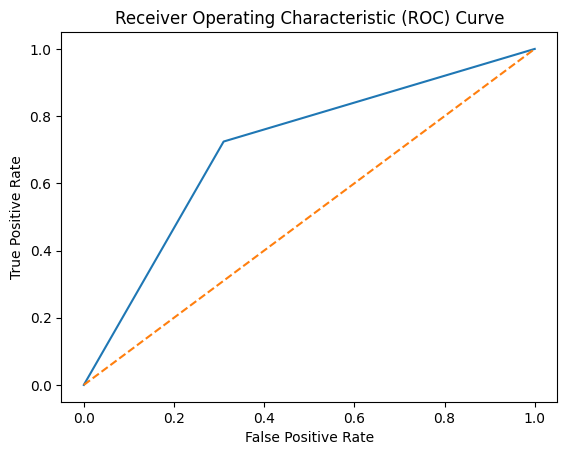

Test Accuracy: 69.72%
Test AUC-ROC score: 0.707
Test F1 score: 0.502
Test F2 score: 0.615
Test Precision: 0.384
Test recall: 0.724


In [14]:
# Load the best model weights
lstm.load_state_dict(torch.load('model_best.pth'))

# Call the test_lstm function
test_accuracy, test_auc, test_f1, test_precision, test_recall, test_f2 = test_lstm(lstm, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test AUC-ROC score: {test_auc:.3f}")
print(f"Test F1 score: {test_f1:.3f}")
print(f"Test F2 score: {test_f2:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Test recall: {test_recall:.3f}")

In [15]:
# Load the best model weights
lstm.load_state_dict(torch.load('model_best.pth'))  

# Load the LSTM features
train_lstm_features = train_data.tensors[0].cpu().numpy()
val_lstm_features = validation_data.tensors[0].cpu().numpy()
test_lstm_features = test_data.tensors[0].cpu().numpy()

# Get LSTM probabilities
lstm_output_train = torch.sigmoid(lstm(torch.tensor(train_lstm_features, device=device))).detach().cpu().numpy().squeeze()
lstm_output_validation = torch.sigmoid(lstm(torch.tensor(val_lstm_features, device=device))).detach().cpu().numpy().squeeze()
lstm_output_test = torch.sigmoid(lstm(torch.tensor(test_lstm_features, device=device))).detach().cpu().numpy().squeeze()





In [16]:
# Define the list of static features
static_features = ['LIMIT_BAL', 'SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'AGE']

# Extract the static features from the train, validation and test data
X_train_static = X_train[static_features].astype(int)
X_validation_static = X_validation[static_features].astype(int)
X_test_static = X_test[static_features].astype(int)

# Combine the LSTM output and static features for train, validation and test sets
x_train_combined_array = np.array(pd.concat([X_train_static.reset_index(drop=True), pd.DataFrame(lstm_output_train, columns=['LSTM_Output'])], axis=1))
y_train_combined_array = np.array(y_train)

x_validation_combined_array = np.array(pd.concat([X_validation_static.reset_index(drop=True), pd.DataFrame(lstm_output_validation, columns=['LSTM_Output'])], axis=1))
y_validation_combined_array = np.array(y_validation)

x_test_combined_array = np.array(pd.concat([X_test_static.reset_index(drop=True), pd.DataFrame(lstm_output_test, columns=['LSTM_Output'])], axis=1))
y_test_combined_array = np.array(y_test)

# Define the number of input features
input_feature = 11

# Convert the train, validation and test data to PyTorch tensors
x_train_DNN = torch.from_numpy(x_train_combined_array).reshape(-1,input_feature,1).type(torch.FloatTensor)
y_train_DNN = torch.from_numpy(y_train_combined_array.astype(np.float64)).view(-1,1).type(torch.FloatTensor)

x_validation_DNN = torch.from_numpy(x_validation_combined_array).reshape(-1, input_feature, 1).type(torch.FloatTensor)
y_validation_DNN = torch.from_numpy(y_validation_combined_array.astype(np.float64)).view(-1, 1).type(torch.FloatTensor)

x_test_DNN = torch.from_numpy(x_test_combined_array).reshape(-1,input_feature,1).type(torch.FloatTensor)
y_test_DNN = torch.from_numpy(y_test_combined_array.astype(np.float64)).view(-1,1).type(torch.FloatTensor)

# Convert the train, validation and test labels to PyTorch tensors with dtype long
y_train_DNN = y_train_DNN.long()
y_validation_DNN = y_validation_DNN.long()
y_test_DNN = y_test_DNN.long()

# Create PyTorch datasets from the train, validation and test data
train_data_DNN = data_utils.TensorDataset(x_train_DNN, y_train_DNN)
validation_data_DNN = data_utils.TensorDataset(x_validation_DNN, y_validation_DNN)
test_data_DNN = data_utils.TensorDataset(x_test_DNN, y_test_DNN)

# Print the shape of the train, validation and test datasets
print(x_train_DNN.shape,y_train_DNN.shape)
print(x_validation_DNN.shape,y_test_DNN.shape)
print(x_test_DNN.shape,y_test_DNN.shape)


torch.Size([17469, 11, 1]) torch.Size([17469, 1])
torch.Size([5920, 11, 1]) torch.Size([5921, 1])
torch.Size([5921, 11, 1]) torch.Size([5921, 1])


In [17]:



# Create DataLoader for training data
train_loader = data_utils.DataLoader(
    dataset = train_data_DNN,
    batch_size = 238,  # Number of samples per batch
    shuffle = True,  # Shuffle the data at every epoch
    num_workers = 0,  # Number of subprocesses to use for data loading
)

# Create DataLoader for validation data
validation_loader = data_utils.DataLoader(
    dataset=validation_data_DNN,
    batch_size=200,  # Number of samples per batch
    shuffle=True,  # Shuffle the data at every epoch
    num_workers=0,  # Number of subprocesses to use for data loading
)

# Create DataLoader for test data
test_loader = data_utils.DataLoader(
    dataset = test_data_DNN,
    batch_size = 200,  # Number of samples per batch
    shuffle = True,  # Shuffle the data at every epoch
    num_workers = 0,  # Number of subprocesses to use for data loading
)



# A function to calculate accuracy given predicted and true labels
def acc_cal(predict, label):
    l = len(predict)
    acc_count = 0
    count = 0
    for i in range(l):
        if(torch.argmax(predict[i]) == label[i]):
            acc_count = acc_count + 1
        count = count + 1
    return acc_count, count


# A function to reset the parameters of a given model
def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()



class DNN(torch.nn.Module):     
    def __init__(self, input_feature, dropout_rate, hidden_neurons_1, hidden_neurons_2):
        super(DNN, self).__init__()
        self.dnn1 = nn.Sequential(
            nn.Linear(input_feature, hidden_neurons_1, bias=True),
            nn.ReLU()
        )  
        
        self.dnn2 = nn.Sequential(  
            nn.Linear(hidden_neurons_1, hidden_neurons_2, bias=True),
            nn.Dropout(dropout_rate),
            nn.ReLU()
        )
        
        self.dnn3 = nn.Sequential(  
            nn.Linear(hidden_neurons_2, 2, bias=True),
        )
    
    def forward(self, x):
        x_1 = self.dnn1(x)
        x_2 = self.dnn2(x_1)   
        output = self.dnn3(x_2)               
        return output



    
def train_and_evaluate(input_feature, learning_rate, dropout_rate, hidden_neurons_1, hidden_neurons_2,weight_decay, train_loader, validation_loader, num_epochs=100):
    # Create DNN model and move to device
    dnn = DNN(input_feature, dropout_rate, hidden_neurons_1, hidden_neurons_2).to(device)
    
    # Define optimizer and loss function
    optimizer = torch.optim.Adam(dnn.parameters(), lr=learning_rate, weight_decay=weight_decay)  
    loss_func = nn.CrossEntropyLoss() 
    
    # Reset weights of the DNN model
    dnn.apply(weight_reset)
    
    # Create new EarlyStopping instance for each trial
    early_stopping = EarlyStopping(verbose=True)

    # Set initial values for best validation accuracy and loss
    best_validation_acc = 0
    best_validation_loss = float('inf')

    # Iterate through the specified number of epochs
    for epoch in range(num_epochs):
        train_true_labels = []
        train_predicted_labels = []
        val_true_labels = []
        val_predicted_labels = []
        
        # Iterate through each batch of the training data
        for iteration, (b_x, b_y) in enumerate(train_loader):   
            # Move input and label tensors to device
            b_x = b_x.view(-1, input_feature).to(device)
            b_y = b_y.squeeze().to(device)
            # Forward pass through the DNN model
            output = dnn(b_x).to(device)   
            # Calculate loss
            loss = loss_func(output, b_y)  
            # Zero the gradients
            optimizer.zero_grad()           
            # Backward pass
            loss.backward()                 
            # Update the parameters
            optimizer.step()                
            # Store true labels and predicted labels for training data
            train_true_labels.extend(b_y.cpu().numpy())
            train_predicted_labels.extend(torch.argmax(output, dim=1).cpu().numpy())

        train_acc = accuracy_score(train_true_labels, train_predicted_labels)
        
        val_true_labels = []
        val_predicted_labels = []
        val_loss = 0
        num_validation_batches = 0
        
        # Iterate through each batch of the validation data
        for iteration, (b_x_validation, b_y_validation) in enumerate(validation_loader):
            # Stop validation after 10 batches
            if(iteration == 10):
                break
            # Move input and label tensors to device
            b_x_validation = b_x_validation.view(-1, input_feature).to(device)
            b_y_validation = b_y_validation.squeeze().to(device)
            # Forward pass through the DNN model
            output = dnn(b_x_validation)
            # Store true labels and predicted labels for validation data
            val_true_labels.extend(b_y_validation.cpu().numpy())
            val_predicted_labels.extend(torch.argmax(output, dim=1).cpu().numpy())
            # Calculate validation loss
            val_loss += loss_func(output, b_y_validation).item()
            num_validation_batches += 1
        validation_acc = accuracy_score(val_true_labels, val_predicted_labels)
        val_loss /= num_validation_batches
        
        # Update best validation loss and accuracy and save model weights
        if val_loss < best_validation_loss:
            best_validation_loss = val_loss
            best_validation_acc = validation_acc
            # Save the best model weights
            torch.save(dnn.state_dict(), 'DNN_model_best.pth')
        
        
        # Check for early stopping
        early_stopping(val_loss, dnn)
        if early_stopping.early_stop:
            print("Early stopping")
            break

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss:.4f}, Train Acc: {train_acc:.4%}, Val Loss: {val_loss:.4f}, Val Acc: {validation_acc:.4%}")
        
    return best_validation_acc






    




In [18]:
def Tuning_DNN(trial):
    # Define the search space for hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    dropout = trial.suggest_float('dropout', 0.1, 0.7)
    hidden_neurons_1 = trial.suggest_int('hidden_neurons_1', 20, 50, step=10)  # Coarse-grained search for hidden layer 1 neurons
    hidden_neurons_2 = trial.suggest_int('hidden_neurons_2', 80, 150, step=10)  # Coarse-grained search for hidden layer 2 neurons
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-1)
    
    # Train and evaluate the model using the suggested hyperparameters
    validation_acc = train_and_evaluate(input_feature, learning_rate, dropout, hidden_neurons_1, hidden_neurons_2, weight_decay, train_loader, validation_loader)

    return validation_acc

study = optuna.create_study(direction='maximize')

# Tune hyperparameters
study.optimize(Tuning_DNN, n_trials=10)

# Get the best hyperparameters and corresponding validation accuracy
best_params_DNN = study.best_params
best_val_acc = study.best_value

print(f"Best hyperparameters: {best_params_DNN}")
print(f"Best validation accuracy: {best_val_acc}")





[I 2023-05-02 17:30:33,996] A new study created in memory with name: no-name-7d56f9df-74df-406b-86cc-880861ab3f6e


Epoch [1/100], Train Loss: 0.3756, Train Acc: 68.1092%, Val Loss: 0.6990, Val Acc: 65.7000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.3521, Train Acc: 79.8786%, Val Loss: 0.8155, Val Acc: 63.7500%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.3070, Train Acc: 80.7030%, Val Loss: 0.7570, Val Acc: 67.2500%
Epoch [4/100], Train Loss: 0.4311, Train Acc: 81.0636%, Val Loss: 0.6864, Val Acc: 71.2000%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.3067, Train Acc: 81.4471%, Val Loss: 0.8103, Val Acc: 64.1000%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.3672, Train Acc: 81.5273%, Val Loss: 0.7794, Val Acc: 66.5000%
EarlyStopping counter: 3 out of 10
Epoch [7/100], Train Loss: 0.3990, Train Acc: 81.4471%, Val Loss: 0.8176, Val Acc: 63.1500%
EarlyStopping counter: 4 out of 10
Epoch [8/100], Train Loss: 0.4784, Train Acc: 81.5902%, Val Loss: 0.7277, Val Acc: 69.7500%
Epoch [9/100], Train Loss: 0.3890, Train Acc: 81.6532%

[I 2023-05-02 17:30:44,345] Trial 0 finished with value: 0.7245 and parameters: {'learning_rate': 0.0013659234459601317, 'dropout': 0.5233851366592517, 'hidden_neurons_1': 30, 'hidden_neurons_2': 110, 'weight_decay': 8.289664738235802e-05}. Best is trial 0 with value: 0.7245.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6523, Train Acc: 60.3240%, Val Loss: 0.7426, Val Acc: 26.4000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6401, Train Acc: 61.4803%, Val Loss: 0.7755, Val Acc: 25.3500%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.6347, Train Acc: 62.0986%, Val Loss: 0.7805, Val Acc: 29.1000%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.6087, Train Acc: 64.0907%, Val Loss: 0.7856, Val Acc: 33.6500%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.6085, Train Acc: 66.7010%, Val Loss: 0.7799, Val Acc: 38.7000%
EarlyStopping counter: 5 out of 10
Epoch [6/100], Train Loss: 0.5182, Train Acc: 69.4373%, Val Loss: 0.7706, Val Acc: 44.1000%
EarlyStopping counter: 6 out of 10
Epoch [7/100], Train Loss: 0.5618, Train Acc: 72.2251%, Val Loss: 0.7428, Val Acc: 52.3500%
Epoch [8/100], Train Loss: 0.4960, Train Acc: 74.1428%, Val Loss: 0.7384, Val Acc: 55.9000%
Epo

[I 2023-05-02 17:30:55,857] Trial 1 finished with value: 0.6445 and parameters: {'learning_rate': 7.965526222599822e-05, 'dropout': 0.4986024972253602, 'hidden_neurons_1': 50, 'hidden_neurons_2': 150, 'weight_decay': 0.0020206570443875873}. Best is trial 0 with value: 0.7245.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6693, Train Acc: 59.8718%, Val Loss: 0.7896, Val Acc: 23.0000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6148, Train Acc: 60.0607%, Val Loss: 0.7976, Val Acc: 22.3000%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.6279, Train Acc: 60.0607%, Val Loss: 0.7899, Val Acc: 24.1500%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.5975, Train Acc: 63.9476%, Val Loss: 0.8028, Val Acc: 29.3500%
Epoch [5/100], Train Loss: 0.5769, Train Acc: 67.1132%, Val Loss: 0.7786, Val Acc: 34.8000%
Epoch [6/100], Train Loss: 0.5256, Train Acc: 69.0595%, Val Loss: 0.7532, Val Acc: 40.6000%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.5939, Train Acc: 70.5536%, Val Loss: 0.7731, Val Acc: 38.9000%
EarlyStopping counter: 2 out of 10
Epoch [8/100], Train Loss: 0.5591, Train Acc: 71.0058%, Val Loss: 0.7696, Val Acc: 39.6000%
EarlyStopping counter: 3 out of 10
Epo

[I 2023-05-02 17:31:15,527] Trial 2 finished with value: 0.5455 and parameters: {'learning_rate': 0.0020082285297280842, 'dropout': 0.5765992165226779, 'hidden_neurons_1': 50, 'hidden_neurons_2': 130, 'weight_decay': 0.08979763467115034}. Best is trial 0 with value: 0.7245.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6265, Train Acc: 60.2668%, Val Loss: 0.7995, Val Acc: 33.0000%
Epoch [2/100], Train Loss: 0.4301, Train Acc: 75.3277%, Val Loss: 0.7226, Val Acc: 62.7500%
Epoch [3/100], Train Loss: 0.4024, Train Acc: 79.2948%, Val Loss: 0.7144, Val Acc: 64.8000%
Epoch [4/100], Train Loss: 0.4529, Train Acc: 79.5924%, Val Loss: 0.6962, Val Acc: 66.6000%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.4459, Train Acc: 79.5867%, Val Loss: 0.7099, Val Acc: 64.0500%
Epoch [6/100], Train Loss: 0.3991, Train Acc: 79.9645%, Val Loss: 0.6663, Val Acc: 68.2000%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.3601, Train Acc: 79.7470%, Val Loss: 0.7418, Val Acc: 62.0500%
EarlyStopping counter: 2 out of 10
Epoch [8/100], Train Loss: 0.4154, Train Acc: 80.0218%, Val Loss: 0.7734, Val Acc: 60.2500%
EarlyStopping counter: 3 out of 10
Epoch [9/100], Train Loss: 0.4519, Train Acc: 79.7012%, Val Loss: 0.7218,

[I 2023-05-02 17:31:26,982] Trial 3 finished with value: 0.7085 and parameters: {'learning_rate': 0.0017701449412333872, 'dropout': 0.42561010243224096, 'hidden_neurons_1': 30, 'hidden_neurons_2': 130, 'weight_decay': 0.04000848968523976}. Best is trial 0 with value: 0.7245.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.4108, Train Acc: 77.8808%, Val Loss: 0.9613, Val Acc: 67.9000%
Epoch [2/100], Train Loss: 0.4294, Train Acc: 80.6171%, Val Loss: 0.7427, Val Acc: 71.3500%
Epoch [3/100], Train Loss: 0.3824, Train Acc: 81.0407%, Val Loss: 0.6892, Val Acc: 72.4000%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.3708, Train Acc: 81.1323%, Val Loss: 0.8221, Val Acc: 66.9000%
EarlyStopping counter: 2 out of 10
Epoch [5/100], Train Loss: 0.4235, Train Acc: 81.0350%, Val Loss: 0.8563, Val Acc: 67.0500%
Epoch [6/100], Train Loss: 0.3491, Train Acc: 81.5960%, Val Loss: 0.6234, Val Acc: 74.1500%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.3350, Train Acc: 81.3212%, Val Loss: 0.8640, Val Acc: 65.2000%
EarlyStopping counter: 2 out of 10
Epoch [8/100], Train Loss: 0.5084, Train Acc: 81.2811%, Val Loss: 0.8214, Val Acc: 71.5000%
EarlyStopping counter: 3 out of 10
Epoch [9/100], Train Loss: 0.4168, Tra

[I 2023-05-02 17:31:35,042] Trial 4 finished with value: 0.7415 and parameters: {'learning_rate': 0.0349660735543506, 'dropout': 0.4315014687480262, 'hidden_neurons_1': 50, 'hidden_neurons_2': 100, 'weight_decay': 1.6266683511387205e-05}. Best is trial 4 with value: 0.7415.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6685, Train Acc: 58.2117%, Val Loss: 0.7297, Val Acc: 25.6500%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6909, Train Acc: 59.0761%, Val Loss: 0.7334, Val Acc: 26.6500%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.6762, Train Acc: 59.6256%, Val Loss: 0.7417, Val Acc: 24.9500%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.6672, Train Acc: 59.8775%, Val Loss: 0.7459, Val Acc: 24.8000%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.6612, Train Acc: 60.0263%, Val Loss: 0.7573, Val Acc: 22.9500%
EarlyStopping counter: 5 out of 10
Epoch [6/100], Train Loss: 0.6819, Train Acc: 60.1179%, Val Loss: 0.7635, Val Acc: 22.3000%
EarlyStopping counter: 6 out of 10
Epoch [7/100], Train Loss: 0.6468, Train Acc: 60.1351%, Val Loss: 0.7694, Val Acc: 21.7000%
EarlyStopping counter: 7 out of 10
Epoch [8/100], Train Loss: 0.6584, Train Acc: 60.1294%, Val 

[I 2023-05-02 17:31:40,933] Trial 5 finished with value: 0.2565 and parameters: {'learning_rate': 1.0237860405694429e-05, 'dropout': 0.4176780946009051, 'hidden_neurons_1': 40, 'hidden_neurons_2': 150, 'weight_decay': 0.001508255581007705}. Best is trial 4 with value: 0.7415.


EarlyStopping counter: 11 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.4603, Train Acc: 63.8617%, Val Loss: 0.7267, Val Acc: 58.2000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.3692, Train Acc: 79.3234%, Val Loss: 0.7726, Val Acc: 65.2000%
Epoch [3/100], Train Loss: 0.2767, Train Acc: 80.4912%, Val Loss: 0.6855, Val Acc: 70.1500%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.3814, Train Acc: 80.9319%, Val Loss: 0.7221, Val Acc: 68.9000%
EarlyStopping counter: 2 out of 10
Epoch [5/100], Train Loss: 0.4209, Train Acc: 81.1266%, Val Loss: 0.7346, Val Acc: 67.8500%
EarlyStopping counter: 3 out of 10
Epoch [6/100], Train Loss: 0.2995, Train Acc: 81.5101%, Val Loss: 0.8192, Val Acc: 64.1500%
EarlyStopping counter: 4 out of 10
Epoch [7/100], Train Loss: 0.3862, Train Acc: 81.4586%, Val Loss: 0.7129, Val Acc: 69.7000%
EarlyStopping counter: 5 out of 10
Epoch [8/100], Train Loss: 0.3749, Train Acc: 81.5960%, Val Loss: 0.7108, Val Acc: 68.8500%
Epo

[I 2023-05-02 17:31:52,322] Trial 6 finished with value: 0.72 and parameters: {'learning_rate': 0.0008797293992543228, 'dropout': 0.1734983252392311, 'hidden_neurons_1': 40, 'hidden_neurons_2': 120, 'weight_decay': 0.0027062649391772125}. Best is trial 4 with value: 0.7415.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6290, Train Acc: 59.4596%, Val Loss: 0.8317, Val Acc: 27.8500%
Epoch [2/100], Train Loss: 0.5695, Train Acc: 65.3787%, Val Loss: 0.7929, Val Acc: 43.8000%
Epoch [3/100], Train Loss: 0.4983, Train Acc: 71.5782%, Val Loss: 0.7475, Val Acc: 55.8000%
Epoch [4/100], Train Loss: 0.4373, Train Acc: 76.2494%, Val Loss: 0.7288, Val Acc: 62.6500%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.3707, Train Acc: 78.9398%, Val Loss: 0.7308, Val Acc: 65.2000%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.4991, Train Acc: 79.8729%, Val Loss: 0.7652, Val Acc: 64.1000%
EarlyStopping counter: 3 out of 10
Epoch [7/100], Train Loss: 0.3864, Train Acc: 80.5026%, Val Loss: 0.7467, Val Acc: 66.5500%
EarlyStopping counter: 4 out of 10
Epoch [8/100], Train Loss: 0.3419, Train Acc: 80.3251%, Val Loss: 0.7572, Val Acc: 66.3500%
EarlyStopping counter: 5 out of 10
Epoch [9/100], Train Loss: 0.3587, Tra

[I 2023-05-02 17:31:59,549] Trial 7 finished with value: 0.6265 and parameters: {'learning_rate': 0.0004406101415357237, 'dropout': 0.6048285842103882, 'hidden_neurons_1': 20, 'hidden_neurons_2': 100, 'weight_decay': 0.000493205873117237}. Best is trial 4 with value: 0.7415.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6408, Train Acc: 59.4310%, Val Loss: 0.7894, Val Acc: 24.2500%
Epoch [2/100], Train Loss: 0.6451, Train Acc: 60.2267%, Val Loss: 0.7889, Val Acc: 23.1000%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.6525, Train Acc: 60.3126%, Val Loss: 0.7941, Val Acc: 23.9000%
Epoch [4/100], Train Loss: 0.6127, Train Acc: 60.7705%, Val Loss: 0.7769, Val Acc: 27.1500%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.5967, Train Acc: 62.2360%, Val Loss: 0.7920, Val Acc: 28.8000%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.5925, Train Acc: 63.4438%, Val Loss: 0.7917, Val Acc: 29.1000%
EarlyStopping counter: 3 out of 10
Epoch [7/100], Train Loss: 0.5972, Train Acc: 64.2338%, Val Loss: 0.7976, Val Acc: 29.1500%
EarlyStopping counter: 4 out of 10
Epoch [8/100], Train Loss: 0.5697, Train Acc: 65.2699%, Val Loss: 0.7943, Val Acc: 31.6500%
Epoch [9/100], Train Loss: 0.5948, Tra

[I 2023-05-02 17:32:20,103] Trial 8 finished with value: 0.5565 and parameters: {'learning_rate': 0.0004263215185764266, 'dropout': 0.48621782806321157, 'hidden_neurons_1': 50, 'hidden_neurons_2': 130, 'weight_decay': 0.07996050621420474}. Best is trial 4 with value: 0.7415.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.4223, Train Acc: 74.8812%, Val Loss: 0.8265, Val Acc: 57.9500%
Epoch [2/100], Train Loss: 0.4734, Train Acc: 79.2146%, Val Loss: 0.6982, Val Acc: 65.5500%
Epoch [3/100], Train Loss: 0.4731, Train Acc: 79.7470%, Val Loss: 0.5917, Val Acc: 72.7000%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.4465, Train Acc: 79.5981%, Val Loss: 0.6383, Val Acc: 70.6000%
EarlyStopping counter: 2 out of 10
Epoch [5/100], Train Loss: 0.4822, Train Acc: 79.2604%, Val Loss: 0.7049, Val Acc: 63.2500%
EarlyStopping counter: 3 out of 10
Epoch [6/100], Train Loss: 0.4148, Train Acc: 79.3291%, Val Loss: 0.6711, Val Acc: 66.8000%
EarlyStopping counter: 4 out of 10
Epoch [7/100], Train Loss: 0.3506, Train Acc: 79.5123%, Val Loss: 0.6291, Val Acc: 71.0000%
EarlyStopping counter: 5 out of 10
Epoch [8/100], Train Loss: 0.4460, Train Acc: 79.5123%, Val Loss: 0.7281, Val Acc: 64.4000%
EarlyStopping counter: 6 out of 10
Epo

[I 2023-05-02 17:32:26,812] Trial 9 finished with value: 0.727 and parameters: {'learning_rate': 0.059555823782404885, 'dropout': 0.22138631061575065, 'hidden_neurons_1': 50, 'hidden_neurons_2': 140, 'weight_decay': 0.03644040388337226}. Best is trial 4 with value: 0.7415.


EarlyStopping counter: 10 out of 10
Early stopping
Best hyperparameters: {'learning_rate': 0.0349660735543506, 'dropout': 0.4315014687480262, 'hidden_neurons_1': 50, 'hidden_neurons_2': 100, 'weight_decay': 1.6266683511387205e-05}
Best validation accuracy: 0.7415


In [19]:
best_lr = best_params_DNN['learning_rate']
best_dropout_rate = best_params_DNN['dropout']
best_hidden_neurons_1 = best_params_DNN['hidden_neurons_1']
best_hidden_neurons_2 = best_params_DNN['hidden_neurons_2']
best_weight_decay = best_params_DNN['weight_decay']

In [20]:
# Define the final DNN model
dnn_final = DNN(input_feature, best_dropout_rate, best_hidden_neurons_1, best_hidden_neurons_2)
optimizer = torch.optim.Adam(dnn_final.parameters(), lr=best_lr, weight_decay=best_weight_decay)  
loss_func = nn.CrossEntropyLoss()

# Train and evaluate the final DNN model
train_and_evaluate(input_feature, best_lr, best_dropout_rate, best_hidden_neurons_1, best_hidden_neurons_2,best_weight_decay, train_loader, validation_loader)


Epoch [1/100], Train Loss: 0.4444, Train Acc: 78.1041%, Val Loss: 0.7977, Val Acc: 66.5500%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.3685, Train Acc: 80.9606%, Val Loss: 0.8322, Val Acc: 67.9000%
Epoch [3/100], Train Loss: 0.3526, Train Acc: 80.8804%, Val Loss: 0.6249, Val Acc: 74.0000%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.4204, Train Acc: 80.8060%, Val Loss: 0.7229, Val Acc: 71.5500%
EarlyStopping counter: 2 out of 10
Epoch [5/100], Train Loss: 0.4193, Train Acc: 81.1781%, Val Loss: 0.7665, Val Acc: 69.1500%
EarlyStopping counter: 3 out of 10
Epoch [6/100], Train Loss: 0.3390, Train Acc: 81.2353%, Val Loss: 0.8524, Val Acc: 71.2500%
EarlyStopping counter: 4 out of 10
Epoch [7/100], Train Loss: 0.3986, Train Acc: 81.2869%, Val Loss: 0.7546, Val Acc: 70.8000%
EarlyStopping counter: 5 out of 10
Epoch [8/100], Train Loss: 0.4340, Train Acc: 81.0750%, Val Loss: 0.6655, Val Acc: 75.7000%
EarlyStopping counter: 6 out of 10
Epoch [9/100], Trai

0.759

F1 Score: 0.5149359886201992
F2 Score: 0.5521659548505186
Test Accuracy: 76.9634%
AUC-ROC Score: 0.7664631482274057
Precision: 0.4629156010230179
Recall: 0.5801282051282052


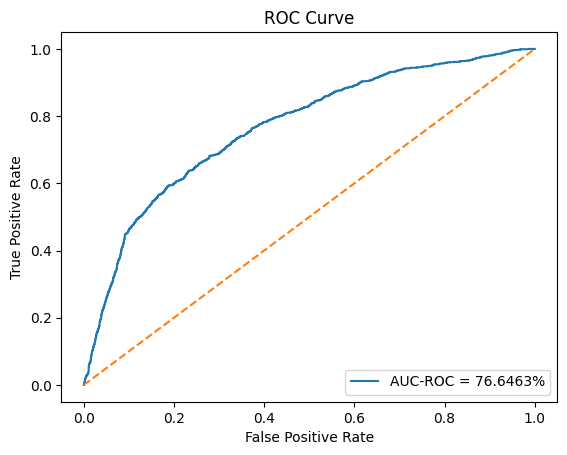

In [21]:

def evaluate_test_set(model_path, input_feature, best_dropout_rate, best_lr, best_hidden_neurons_1, best_hidden_neurons_2, test_loader):
    # Load the best model
    dnn_final = DNN(input_feature, best_dropout_rate, best_hidden_neurons_1, best_hidden_neurons_2)
    dnn_final.load_state_dict(torch.load(model_path))
    dnn_final = dnn_final.to(device) # Ensure the model is on the same device
    dnn_final.eval() # Set the model to evaluation mode
    optimizer = torch.optim.Adam(dnn_final.parameters(), lr=best_lr)  
    loss_func = nn.CrossEntropyLoss() 

    true_labels = []
    predicted_probs = []

    # Turn off gradients for test data to speed up inference
    with torch.no_grad():
        for b_x_test, b_y_test in test_loader:
            # Move data to device
            b_x_test = b_x_test.reshape(-1, input_feature).to(device)
            b_y_test = b_y_test.squeeze().to(device)
            output_test = dnn_final(b_x_test) # Perform forward pass

            # Store true labels and predicted probabilities
            true_labels.extend(b_y_test.cpu().numpy())
            predicted_probs.extend(torch.sigmoid(output_test).cpu().numpy()[:, 1])
            
            # Calculate the predicted labels
            predicted_labels = np.round(predicted_probs)

    # Compute F1 score
    f1 = f1_score(true_labels, predicted_labels)
    print(f"F1 Score: {f1}")

    # Compute F2 score
    f2 = fbeta_score(true_labels, predicted_labels, beta=2)
    print(f"F2 Score: {f2}")

    
    # Compute Accuracy
    test_acc = accuracy_score(true_labels, predicted_labels)
    print(f"Test Accuracy: {test_acc:.4%}") # Print test accuracy

    # Compute AUC-ROC score
    auc_roc = roc_auc_score(true_labels, predicted_probs)
    print(f"AUC-ROC Score: {auc_roc}")
    
    # Compute Precision
    precision = precision_score(true_labels, predicted_labels)
    print(f"Precision: {precision}")

    # Compute Recall
    recall = recall_score(true_labels, predicted_labels)
    print(f"Recall: {recall}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
    plt.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.4%}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    return test_acc, auc_roc

model_path = 'DNN_model_best.pth'
test_accuracy, auc_roc = evaluate_test_set(model_path, 11, best_dropout_rate, best_lr, best_hidden_neurons_1, best_hidden_neurons_2, test_loader)


## Lets try improve this by running the static features through a logit model before concatenating them to the LSTM output

In [22]:
X_train_static = X_train[static_features]
X_validation_static = X_validation[static_features]
X_test_static = X_test[static_features]


In [24]:


# Define the parameter grid for tuning
param_grid = {'C': np.logspace(-4, 4, 20)}

# Create a LogisticRegression instance
lr_static = LogisticRegression()

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(lr_static, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_static, y_train)

# Get the best parameters
best_logistic_params = grid_search.best_params_
print("Best parameters: ", best_logistic_params)

# Train the logistic regression model with the best parameters
lr_static_best = LogisticRegression(**best_logistic_params)
lr_static_best.fit(X_train_static, y_train)

# Make probability predictions on the train, validation, and test sets
y_pred_proba_static_train_lr = lr_static_best.predict_proba(X_train_static)[:, 1]
y_pred_proba_static_validation_lr = lr_static_best.predict_proba(X_validation_static)[:, 1]
y_pred_proba_static_test_lr = lr_static_best.predict_proba(X_test_static)[:, 1]


# Convert the probabilities to DataFrames
y_pred_proba_static_train_lr_df = pd.DataFrame(y_pred_proba_static_train_lr, columns=['lr_Probability'])
y_pred_proba_static_validation_lr_df = pd.DataFrame(y_pred_proba_static_validation_lr, columns=['lr_Probability'])
y_pred_proba_static_test_lr_df = pd.DataFrame(y_pred_proba_static_test_lr, columns=['lr_Probability'])




Best parameters:  {'C': 10000.0}


In [25]:
# Here we tried using a SVC model instead of a logit but it resulted in lower accuracy

# from sklearn.svm import SVC

# svm_static = SVC(probability=True)
# svm_static.fit(X_train_static, y_train)

# # Make probability predictions on the train and test sets
# y_pred_proba_static_train_svm = svm_static.predict_proba(X_train_static)[:, 1]
# y_pred_proba_static_validation_svm = svm_static.predict_proba(X_validation_static)[:, 1]
# y_pred_proba_static_test_svm = svm_static.predict_proba(X_test_static)[:, 1]

# # Combine SVM output with LSTM output features and feed into DNN

# # Convert the probabilities to DataFrames
# y_pred_proba_static_train_lr_df = pd.DataFrame(y_pred_proba_static_train_svm, columns=['svm_Probability'])
# y_pred_proba_static_validation_lr_df = pd.DataFrame(y_pred_proba_static_validation_svm, columns=['svm_Probability'])
# y_pred_proba_static_test_lr_df = pd.DataFrame(y_pred_proba_static_test_svm, columns=['svm_Probability'])


In [26]:
# Combine the predictions of logistic regression and LSTM for the train, validation, and test sets
x_train_combined_lr_array = np.array(pd.concat([y_pred_proba_static_train_lr_df, pd.DataFrame(lstm_output_train, columns=['LSTM_Output'])], axis=1))
y_train_combined_lr_array = np.array(y_train)

x_validation_combined_lr_array = np.array(pd.concat([y_pred_proba_static_validation_lr_df, pd.DataFrame(lstm_output_validation, columns=['LSTM_Output'])], axis=1))
y_validation_combined_lr_array = np.array(y_validation)

x_test_combined_lr_array = np.array(pd.concat([y_pred_proba_static_test_lr_df, pd.DataFrame(lstm_output_test, columns=['LSTM_Output'])], axis=1))
y_test_combined_lr_array = np.array(y_test)

# Set the number of input features for the DNN to 2
input_feature = 2

# Convert the combined arrays for train, validation, and test sets to PyTorch tensors
x_train_DNN_lr = torch.from_numpy(x_train_combined_lr_array).reshape(-1,input_feature,1).type(torch.FloatTensor)
y_train_DNN_lr = torch.from_numpy(y_train_combined_lr_array.astype(np.float64)).view(-1,1).type(torch.FloatTensor)

x_validation_DNN_lr = torch.from_numpy(x_validation_combined_lr_array).reshape(-1, input_feature, 1).type(torch.FloatTensor)
y_validation_DNN_lr = torch.from_numpy(y_validation_combined_lr_array.astype(np.float64)).view(-1, 1).type(torch.FloatTensor)

x_test_DNN_lr = torch.from_numpy(x_test_combined_lr_array).reshape(-1,input_feature,1).type(torch.FloatTensor)
y_test_DNN_lr = torch.from_numpy(y_test_combined_lr_array.astype(np.float64)).view(-1,1).type(torch.FloatTensor)

# Convert the labels for train, validation, and test sets to PyTorch tensors of type long
y_train_DNN_lr = y_train_DNN_lr.long()
y_validation_DNN_lr = y_validation_DNN_lr.long()
y_test_DNN_lr = y_test_DNN_lr.long()


# Create Tensor datasets for the training, validation, and test data
train_data_lr = data_utils.TensorDataset(x_train_DNN_lr, y_train_DNN_lr)
validation_data_lr = data_utils.TensorDataset(x_validation_DNN_lr, y_validation_DNN_lr)
test_data_lr = data_utils.TensorDataset(x_test_DNN_lr, y_test_DNN_lr)

# Create data loaders for the training, validation, and test data
train_loader_lr = data_utils.DataLoader(
    dataset=train_data_lr,
    batch_size=238,
    shuffle=True,
    num_workers=0,
)

validation_loader_lr = data_utils.DataLoader(
    dataset=validation_data_lr,
    batch_size=200,
    shuffle=True,
    num_workers=0,
)

test_loader_lr = data_utils.DataLoader(
    dataset=test_data_lr,
    batch_size=200,
    shuffle=True,
    num_workers=0,
)

In [27]:


def Tuning_lr(trial):
    # Define the search space for hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    dropout = trial.suggest_float('dropout', 0.1, 0.7)
    hidden_neurons_1 = trial.suggest_int('hidden_neurons_1', 20, 50, step=10)  # Coarse-grained search for hidden layer 1 neurons
    hidden_neurons_2 = trial.suggest_int('hidden_neurons_2', 80, 150, step=10)  # Coarse-grained search for hidden layer 2 neurons
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-1)
    # Train and evaluate the model using the suggested hyperparameters
    validation_acc = train_and_evaluate(input_feature, learning_rate, dropout, hidden_neurons_1, hidden_neurons_2, weight_decay, train_loader_lr, validation_loader_lr)

    return validation_acc




study = optuna.create_study(direction='maximize')

# Tune hyperparameters for 10 trials
study.optimize(Tuning_lr, n_trials=10)

# Get the best hyperparameters and corresponding validation accuracy
best_params_DNN_lr = study.best_params
best_val_acc_lr = study.best_value

print(f"Best hyperparameters: {best_params_DNN_lr}")
print(f"Best validation accuracy: {best_val_acc_lr}")

[I 2023-05-02 17:32:41,616] A new study created in memory with name: no-name-e6deca46-9a41-461c-9868-b228eea9bf25


Epoch [1/100], Train Loss: 0.5115, Train Acc: 61.9440%, Val Loss: 0.7828, Val Acc: 34.1000%
Epoch [2/100], Train Loss: 0.4172, Train Acc: 74.7610%, Val Loss: 0.6993, Val Acc: 60.3500%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.4116, Train Acc: 80.2336%, Val Loss: 0.7029, Val Acc: 66.0000%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.4155, Train Acc: 80.4511%, Val Loss: 0.7314, Val Acc: 66.4500%
EarlyStopping counter: 3 out of 10
Epoch [5/100], Train Loss: 0.4211, Train Acc: 80.7946%, Val Loss: 0.7211, Val Acc: 67.5500%
Epoch [6/100], Train Loss: 0.3436, Train Acc: 81.0464%, Val Loss: 0.6840, Val Acc: 70.3000%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.4039, Train Acc: 81.2525%, Val Loss: 0.7624, Val Acc: 65.9000%
EarlyStopping counter: 2 out of 10
Epoch [8/100], Train Loss: 0.3030, Train Acc: 81.1151%, Val Loss: 0.7375, Val Acc: 67.1500%
EarlyStopping counter: 3 out of 10
Epoch [9/100], Train Loss: 0.3543, Train Acc: 80.9606%

[I 2023-05-02 17:32:50,557] Trial 0 finished with value: 0.703 and parameters: {'learning_rate': 0.0002482684160874799, 'dropout': 0.2900001611855194, 'hidden_neurons_1': 50, 'hidden_neurons_2': 130, 'weight_decay': 2.6583810605486e-05}. Best is trial 0 with value: 0.703.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.4756, Train Acc: 79.2948%, Val Loss: 0.7889, Val Acc: 63.5000%
Epoch [2/100], Train Loss: 0.4152, Train Acc: 81.0121%, Val Loss: 0.6334, Val Acc: 68.9500%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.3648, Train Acc: 81.0178%, Val Loss: 0.7897, Val Acc: 67.8500%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.3558, Train Acc: 81.2239%, Val Loss: 0.7337, Val Acc: 72.3000%
EarlyStopping counter: 3 out of 10
Epoch [5/100], Train Loss: 0.2929, Train Acc: 81.0579%, Val Loss: 0.7875, Val Acc: 66.6000%
EarlyStopping counter: 4 out of 10
Epoch [6/100], Train Loss: 0.4465, Train Acc: 81.1895%, Val Loss: 0.6792, Val Acc: 71.9000%
EarlyStopping counter: 5 out of 10
Epoch [7/100], Train Loss: 0.3063, Train Acc: 81.1666%, Val Loss: 0.8226, Val Acc: 64.7000%
EarlyStopping counter: 6 out of 10
Epoch [8/100], Train Loss: 0.4203, Train Acc: 81.1380%, Val Loss: 0.8473, Val Acc: 63.0000%
Ear

[I 2023-05-02 17:33:04,760] Trial 1 finished with value: 0.7215 and parameters: {'learning_rate': 0.01915151349673496, 'dropout': 0.40820464510486776, 'hidden_neurons_1': 20, 'hidden_neurons_2': 130, 'weight_decay': 1.2546608385296819e-05}. Best is trial 1 with value: 0.7215.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.4105, Train Acc: 79.3978%, Val Loss: 0.8006, Val Acc: 63.1500%
Epoch [2/100], Train Loss: 0.3631, Train Acc: 81.0579%, Val Loss: 0.6272, Val Acc: 72.3500%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.4572, Train Acc: 81.0006%, Val Loss: 0.6705, Val Acc: 71.7000%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.3755, Train Acc: 80.8060%, Val Loss: 0.6441, Val Acc: 73.4500%
EarlyStopping counter: 3 out of 10
Epoch [5/100], Train Loss: 0.3366, Train Acc: 80.9434%, Val Loss: 0.7137, Val Acc: 66.8500%
EarlyStopping counter: 4 out of 10
Epoch [6/100], Train Loss: 0.4717, Train Acc: 80.8289%, Val Loss: 0.8013, Val Acc: 63.4500%
EarlyStopping counter: 5 out of 10
Epoch [7/100], Train Loss: 0.2754, Train Acc: 80.6743%, Val Loss: 0.6749, Val Acc: 70.2500%
EarlyStopping counter: 6 out of 10
Epoch [8/100], Train Loss: 0.3203, Train Acc: 80.8461%, Val Loss: 0.6994, Val Acc: 68.1500%
Ear

[I 2023-05-02 17:33:10,784] Trial 2 finished with value: 0.7235 and parameters: {'learning_rate': 0.009028528682918143, 'dropout': 0.17452446544001576, 'hidden_neurons_1': 20, 'hidden_neurons_2': 140, 'weight_decay': 7.754656381133717e-05}. Best is trial 2 with value: 0.7235.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6362, Train Acc: 62.0528%, Val Loss: 0.7580, Val Acc: 26.8500%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.5971, Train Acc: 61.2571%, Val Loss: 0.7752, Val Acc: 25.2000%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.6105, Train Acc: 61.4517%, Val Loss: 0.7616, Val Acc: 27.6000%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.6025, Train Acc: 62.5565%, Val Loss: 0.7683, Val Acc: 27.7500%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.5768, Train Acc: 63.9189%, Val Loss: 0.7722, Val Acc: 30.2000%
Epoch [6/100], Train Loss: 0.5577, Train Acc: 66.8670%, Val Loss: 0.7508, Val Acc: 35.8000%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.5572, Train Acc: 69.9410%, Val Loss: 0.7556, Val Acc: 36.7500%
Epoch [8/100], Train Loss: 0.5633, Train Acc: 71.7729%, Val Loss: 0.7459, Val Acc: 41.5500%
Epoch [9/100], Train Loss: 0.5664, Tra

[I 2023-05-02 17:33:28,819] Trial 3 finished with value: 0.582 and parameters: {'learning_rate': 0.00017186116991833522, 'dropout': 0.45742417796424806, 'hidden_neurons_1': 30, 'hidden_neurons_2': 120, 'weight_decay': 0.08169754259613242}. Best is trial 2 with value: 0.7235.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.3709, Train Acc: 75.2018%, Val Loss: 0.7466, Val Acc: 67.2000%
Epoch [2/100], Train Loss: 0.4044, Train Acc: 80.7430%, Val Loss: 0.7429, Val Acc: 66.5000%
Epoch [3/100], Train Loss: 0.3204, Train Acc: 80.8060%, Val Loss: 0.6978, Val Acc: 69.7000%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.3419, Train Acc: 80.7774%, Val Loss: 0.7444, Val Acc: 68.6500%
Epoch [5/100], Train Loss: 0.3920, Train Acc: 80.8518%, Val Loss: 0.6856, Val Acc: 70.7500%
EarlyStopping counter: 1 out of 10
Epoch [6/100], Train Loss: 0.4088, Train Acc: 80.9606%, Val Loss: 0.6989, Val Acc: 69.2500%
EarlyStopping counter: 2 out of 10
Epoch [7/100], Train Loss: 0.4695, Train Acc: 80.8003%, Val Loss: 0.7074, Val Acc: 69.8000%
EarlyStopping counter: 3 out of 10
Epoch [8/100], Train Loss: 0.4375, Train Acc: 80.9720%, Val Loss: 0.7483, Val Acc: 68.9000%
EarlyStopping counter: 4 out of 10
Epoch [9/100], Train Loss: 0.3642, Tra

[I 2023-05-02 17:33:36,259] Trial 4 finished with value: 0.7075 and parameters: {'learning_rate': 0.002508233209706523, 'dropout': 0.44642355401861844, 'hidden_neurons_1': 30, 'hidden_neurons_2': 100, 'weight_decay': 0.004236268174139743}. Best is trial 2 with value: 0.7235.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.5126, Train Acc: 74.9785%, Val Loss: 0.6923, Val Acc: 60.7500%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.5376, Train Acc: 77.2168%, Val Loss: 0.6951, Val Acc: 57.2500%
Epoch [3/100], Train Loss: 0.5013, Train Acc: 76.8332%, Val Loss: 0.6884, Val Acc: 62.0000%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.5164, Train Acc: 77.1996%, Val Loss: 0.7020, Val Acc: 57.1000%
EarlyStopping counter: 2 out of 10
Epoch [5/100], Train Loss: 0.5443, Train Acc: 77.5889%, Val Loss: 0.7332, Val Acc: 50.4500%
EarlyStopping counter: 3 out of 10
Epoch [6/100], Train Loss: 0.5101, Train Acc: 77.0622%, Val Loss: 0.7662, Val Acc: 47.9000%
EarlyStopping counter: 4 out of 10
Epoch [7/100], Train Loss: 0.5104, Train Acc: 77.5889%, Val Loss: 0.7323, Val Acc: 52.7000%
EarlyStopping counter: 5 out of 10
Epoch [8/100], Train Loss: 0.5347, Train Acc: 77.8007%, Val Loss: 0.7007, Val Acc: 55.7000%
Ear

[I 2023-05-02 17:33:52,938] Trial 5 finished with value: 0.6565 and parameters: {'learning_rate': 0.014875573853793608, 'dropout': 0.539510975269225, 'hidden_neurons_1': 40, 'hidden_neurons_2': 80, 'weight_decay': 0.08095671025298516}. Best is trial 2 with value: 0.7235.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.2982, Train Acc: 76.5814%, Val Loss: 0.7829, Val Acc: 66.1000%
Epoch [2/100], Train Loss: 0.3547, Train Acc: 80.9548%, Val Loss: 0.7120, Val Acc: 70.5000%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.4007, Train Acc: 81.0865%, Val Loss: 0.7139, Val Acc: 71.2000%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.4145, Train Acc: 80.9377%, Val Loss: 0.7475, Val Acc: 69.5500%
Epoch [5/100], Train Loss: 0.3688, Train Acc: 80.9777%, Val Loss: 0.6739, Val Acc: 72.5000%
EarlyStopping counter: 1 out of 10
Epoch [6/100], Train Loss: 0.3824, Train Acc: 80.9835%, Val Loss: 0.7227, Val Acc: 68.6000%
EarlyStopping counter: 2 out of 10
Epoch [7/100], Train Loss: 0.4779, Train Acc: 80.7602%, Val Loss: 0.7597, Val Acc: 67.9500%
EarlyStopping counter: 3 out of 10
Epoch [8/100], Train Loss: 0.3723, Train Acc: 81.0121%, Val Loss: 0.7373, Val Acc: 68.7000%
EarlyStopping counter: 4 out of 10
Epo

[I 2023-05-02 17:34:00,666] Trial 6 finished with value: 0.725 and parameters: {'learning_rate': 0.0027682541642775668, 'dropout': 0.13349712555495366, 'hidden_neurons_1': 40, 'hidden_neurons_2': 90, 'weight_decay': 0.00048364628299266306}. Best is trial 6 with value: 0.725.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.3804, Train Acc: 76.4898%, Val Loss: 0.7096, Val Acc: 68.5000%
Epoch [2/100], Train Loss: 0.4924, Train Acc: 80.9148%, Val Loss: 0.7042, Val Acc: 68.6500%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.5622, Train Acc: 81.2182%, Val Loss: 0.7060, Val Acc: 69.3500%
Epoch [4/100], Train Loss: 0.3997, Train Acc: 81.0521%, Val Loss: 0.6774, Val Acc: 70.7000%
Epoch [5/100], Train Loss: 0.3901, Train Acc: 81.0350%, Val Loss: 0.6438, Val Acc: 73.2000%
EarlyStopping counter: 1 out of 10
Epoch [6/100], Train Loss: 0.3221, Train Acc: 80.8690%, Val Loss: 0.7495, Val Acc: 67.9000%
EarlyStopping counter: 2 out of 10
Epoch [7/100], Train Loss: 0.3710, Train Acc: 81.0407%, Val Loss: 0.7078, Val Acc: 69.1500%
Epoch [8/100], Train Loss: 0.4165, Train Acc: 80.7373%, Val Loss: 0.6302, Val Acc: 72.7000%
EarlyStopping counter: 1 out of 10
Epoch [9/100], Train Loss: 0.4792, Train Acc: 80.6858%, Val Loss: 0.7610,

[I 2023-05-02 17:34:09,865] Trial 7 finished with value: 0.727 and parameters: {'learning_rate': 0.0020200365479687847, 'dropout': 0.3749177582826565, 'hidden_neurons_1': 40, 'hidden_neurons_2': 130, 'weight_decay': 0.0004382175391249785}. Best is trial 7 with value: 0.727.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6659, Train Acc: 59.4711%, Val Loss: 0.7727, Val Acc: 25.1000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6447, Train Acc: 60.5415%, Val Loss: 0.7818, Val Acc: 24.9500%
Epoch [3/100], Train Loss: 0.5764, Train Acc: 65.7107%, Val Loss: 0.7467, Val Acc: 45.0500%
Epoch [4/100], Train Loss: 0.4511, Train Acc: 76.0433%, Val Loss: 0.7337, Val Acc: 57.1000%
Epoch [5/100], Train Loss: 0.5213, Train Acc: 79.0257%, Val Loss: 0.7075, Val Acc: 64.4500%
EarlyStopping counter: 1 out of 10
Epoch [6/100], Train Loss: 0.3939, Train Acc: 79.5981%, Val Loss: 0.7114, Val Acc: 65.9000%
Epoch [7/100], Train Loss: 0.4455, Train Acc: 79.6611%, Val Loss: 0.6927, Val Acc: 67.8000%
EarlyStopping counter: 1 out of 10
Epoch [8/100], Train Loss: 0.3343, Train Acc: 80.0332%, Val Loss: 0.7395, Val Acc: 66.0500%
EarlyStopping counter: 2 out of 10
Epoch [9/100], Train Loss: 0.3571, Train Acc: 80.3996%, Val Loss: 0.7213,

[I 2023-05-02 17:34:18,286] Trial 8 finished with value: 0.678 and parameters: {'learning_rate': 0.000228026312508074, 'dropout': 0.17968992885130322, 'hidden_neurons_1': 20, 'hidden_neurons_2': 80, 'weight_decay': 0.0014956145409703889}. Best is trial 7 with value: 0.727.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.4040, Train Acc: 71.2519%, Val Loss: 0.7642, Val Acc: 64.0500%
Epoch [2/100], Train Loss: 0.4234, Train Acc: 80.4053%, Val Loss: 0.7309, Val Acc: 67.8000%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.3099, Train Acc: 80.7144%, Val Loss: 0.7497, Val Acc: 67.4500%
Epoch [4/100], Train Loss: 0.3996, Train Acc: 80.8747%, Val Loss: 0.6507, Val Acc: 72.7500%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.3684, Train Acc: 81.0464%, Val Loss: 0.7895, Val Acc: 65.2500%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.3647, Train Acc: 81.0464%, Val Loss: 0.7477, Val Acc: 67.4000%
EarlyStopping counter: 3 out of 10
Epoch [7/100], Train Loss: 0.3924, Train Acc: 80.8919%, Val Loss: 0.7186, Val Acc: 69.4500%
EarlyStopping counter: 4 out of 10
Epoch [8/100], Train Loss: 0.3614, Train Acc: 80.9835%, Val Loss: 0.6766, Val Acc: 71.8500%
EarlyStopping counter: 5 out of 10
Epo

[I 2023-05-02 17:34:25,946] Trial 9 finished with value: 0.7275 and parameters: {'learning_rate': 0.0010826781787115045, 'dropout': 0.348774916399919, 'hidden_neurons_1': 30, 'hidden_neurons_2': 140, 'weight_decay': 0.00011253897356783743}. Best is trial 9 with value: 0.7275.


EarlyStopping counter: 10 out of 10
Early stopping
Best hyperparameters: {'learning_rate': 0.0010826781787115045, 'dropout': 0.348774916399919, 'hidden_neurons_1': 30, 'hidden_neurons_2': 140, 'weight_decay': 0.00011253897356783743}
Best validation accuracy: 0.7275


In [28]:
best_lr = best_params_DNN['learning_rate']
best_dropout_rate = best_params_DNN['dropout']
best_hidden_neurons_1 = best_params_DNN['hidden_neurons_1']
best_hidden_neurons_2 = best_params_DNN['hidden_neurons_2']
best_weight_decay = best_params_DNN['weight_decay']

In [29]:
# Train the final model with the best hyperparameters
# Instantiate the DNN with the best dropout rate and learning rate
dnn_final = DNN(input_feature, best_dropout_rate, best_hidden_neurons_1, best_hidden_neurons_2)

# Instantiate the optimizer with the best learning rate
optimizer = torch.optim.Adam(dnn_final.parameters(), lr=best_lr, weight_decay=best_weight_decay)  

# Instantiate the loss function
loss_func = nn.CrossEntropyLoss() 

# Call the train_and_evaluate function to train and evaluate the final model
train_and_evaluate(input_feature, best_lr, best_dropout_rate,best_hidden_neurons_1, best_hidden_neurons_2,best_weight_decay, train_loader_lr,validation_loader_lr)


Epoch [1/100], Train Loss: 0.4696, Train Acc: 79.5180%, Val Loss: 0.6963, Val Acc: 74.0000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.3123, Train Acc: 80.7259%, Val Loss: 0.7210, Val Acc: 74.4000%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.3761, Train Acc: 80.7545%, Val Loss: 0.7419, Val Acc: 63.3500%
Epoch [4/100], Train Loss: 0.3864, Train Acc: 80.8804%, Val Loss: 0.6736, Val Acc: 74.6500%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.3483, Train Acc: 80.6743%, Val Loss: 0.7497, Val Acc: 66.5000%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.3632, Train Acc: 80.9835%, Val Loss: 0.7281, Val Acc: 64.8500%
Epoch [7/100], Train Loss: 0.4358, Train Acc: 80.9377%, Val Loss: 0.6590, Val Acc: 73.5500%
EarlyStopping counter: 1 out of 10
Epoch [8/100], Train Loss: 0.3447, Train Acc: 80.8804%, Val Loss: 0.7485, Val Acc: 67.6000%
EarlyStopping counter: 2 out of 10
Epoch [9/100], Train Loss: 0.3502, Train Acc: 80.9090%

0.7545

F1 Score: 0.5204115499502157
F2 Score: 0.5801391149918603
Test Accuracy: 75.5953%
AUC-ROC Score: 0.7755662644652587
Precision: 0.4441926345609065
Recall: 0.6282051282051282


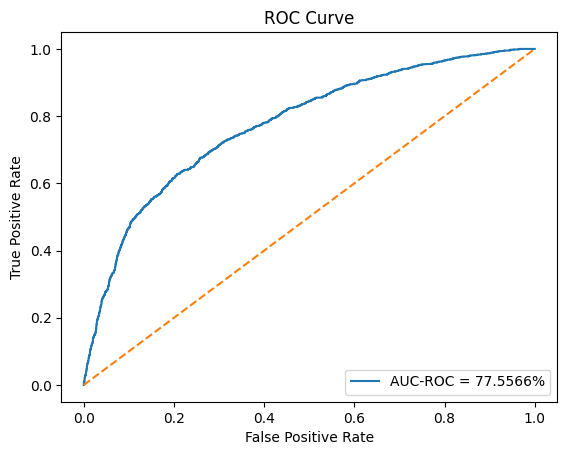

In [30]:


model_path = 'DNN_model_best.pth'
test_accuracy = evaluate_test_set(model_path, 2,best_dropout_rate, best_lr,best_hidden_neurons_1, best_hidden_neurons_2, test_loader_lr)


## Now we can try using a voting classifier instead of a DNN to see if we can achieve a better model

In [31]:
def Voting_Classifier(X_concatenated_train, X_concatenated_test, y_train, y_test, best_logistic_params):

    # Train individual models
    logistic_regression = LogisticRegression(**best_logistic_params)
    random_forest = RandomForestClassifier()
    decision_tree = DecisionTreeClassifier()

    # Create a soft voting classifier
    voting_classifier = VotingClassifier(
        estimators=[('logistic_regression', logistic_regression), 
                    ('random_forest', random_forest), 
                    ('decision_tree', decision_tree)],
        voting='soft'
    )

    # Fit the voting classifier
    voting_classifier.fit(X_concatenated_train, y_train)

    # Predict with the voting classifier
    y_pred_voting = voting_classifier.predict(X_concatenated_test)

    # Calculate accuracy, F1 score, F2 score, precision, and recall scores
    for classifier in (logistic_regression, random_forest, decision_tree, voting_classifier):
        classifier.fit(X_concatenated_train, y_train)
        y_pred = classifier.predict(X_concatenated_test)
        print(classifier.__class__.__name__)
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("F1 score:", f1_score(y_test, y_pred))
        print("F2 score:", fbeta_score(y_test, y_pred, beta=2))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print()


In [32]:
Voting_Classifier(x_train_combined_array, x_test_combined_array, y_train_combined_array, y_test_combined_array, best_logistic_params)

LogisticRegression
Accuracy: 0.6704948488431008
F1 score: 0.4875229839768847
F2 score: 0.6144881472652629
Precision: 0.3626416568972255
Recall: 0.7435897435897436

RandomForestClassifier
Accuracy: 0.6483702077351798
F1 score: 0.44891476971942823
F2 score: 0.5636798723743686
Precision: 0.33517786561264823
Recall: 0.6794871794871795

DecisionTreeClassifier
Accuracy: 0.6314811687214997
F1 score: 0.43530020703933753
F2 score: 0.5527076761303891
Precision: 0.32148318042813456
Recall: 0.6738782051282052

VotingClassifier
Accuracy: 0.6475257557844959
F1 score: 0.4543790849673202
F2 score: 0.5740520544325538
Precision: 0.3372138145129996
Recall: 0.6963141025641025



In [33]:
Voting_Classifier(x_train_combined_lr_array, x_test_combined_lr_array, y_train_combined_lr_array, y_test_combined_lr_array, best_logistic_params)

LogisticRegression
Accuracy: 0.6449923999324438
F1 score: 0.4765936254980081
F2 score: 0.6166237113402063
Precision: 0.3457369942196532
Recall: 0.7668269230769231

RandomForestClassifier
Accuracy: 0.6671170410403648
F1 score: 0.4683032101429727
F2 score: 0.5824721513890753
Precision: 0.3529890199267995
Recall: 0.6955128205128205

DecisionTreeClassifier
Accuracy: 0.6377301131565614
F1 score: 0.4509854108011262
F2 score: 0.5757417331067834
Precision: 0.33132756675441893
Recall: 0.7059294871794872

VotingClassifier
Accuracy: 0.6509035635872319
F1 score: 0.46520051746442426
F2 score: 0.5907477986594822
Precision: 0.34352311807413066
Recall: 0.7203525641025641



In [34]:
def AdaBoost_Classifier(X_concatenated_train, X_concatenated_test, y_train, y_test, best_logistic_params):

    # Train individual models
    logistic_regression = LogisticRegression(**best_logistic_params)
    random_forest = RandomForestClassifier()
    decision_tree = DecisionTreeClassifier()

    # Create base estimators for AdaBoost
    base_estimators = {
        'logistic_regression': logistic_regression,
        'random_forest': random_forest,
        'decision_tree': decision_tree
    }

    for base_name, base_estimator in base_estimators.items():
        # Create an AdaBoost classifier
        ada_boost_classifier = AdaBoostClassifier(
            base_estimator=base_estimator,
            n_estimators=50,
            learning_rate=1.0,
            algorithm='SAMME.R',
            random_state=None
        )

        # Fit the AdaBoost classifier
        ada_boost_classifier.fit(X_concatenated_train, y_train)

        # Predict with the AdaBoost classifier
        y_pred_ada_boost = ada_boost_classifier.predict(X_concatenated_test)

        # Calculate accuracy, F1 score, F2 score, precision, and recall scores
        print(f"{base_name} as base estimator:")
        print(ada_boost_classifier.__class__.__name__)
        print("Accuracy:", accuracy_score(y_test, y_pred_ada_boost))
        print("F1 score:", f1_score(y_test, y_pred_ada_boost))
        print("F2 score:", fbeta_score(y_test, y_pred_ada_boost, beta=2))
        print("Precision:", precision_score(y_test, y_pred_ada_boost))
        print("Recall:", recall_score(y_test, y_pred_ada_boost))
        print()


In [35]:
AdaBoost_Classifier(x_train_combined_array, x_test_combined_array, y_train_combined_array, y_test_combined_array, best_logistic_params)

logistic_regression as base estimator:
AdaBoostClassifier
Accuracy: 0.66948150650228
F1 score: 0.4878304108872023
F2 score: 0.6159947124917382
Precision: 0.3622230858919549
Recall: 0.7467948717948718

random_forest as base estimator:
AdaBoostClassifier
Accuracy: 0.6454990711028542
F1 score: 0.4448558582385612
F2 score: 0.5588039867109634
Precision: 0.3320173707066719
Recall: 0.6738782051282052

decision_tree as base estimator:
AdaBoostClassifier
Accuracy: 0.6488768789055903
F1 score: 0.4409787577305727
F2 score: 0.5493769261691008
Precision: 0.3318494536624848
Recall: 0.657051282051282



In [36]:
AdaBoost_Classifier(x_train_combined_lr_array, x_test_combined_lr_array, y_train_combined_lr_array, y_test_combined_lr_array, best_logistic_params)

logistic_regression as base estimator:
AdaBoostClassifier
Accuracy: 0.6378990035466982
F1 score: 0.47425208435507604
F2 score: 0.6181283559192023
Precision: 0.34169611307420494
Recall: 0.7748397435897436

random_forest as base estimator:
AdaBoostClassifier
Accuracy: 0.666103698699544
F1 score: 0.4686912120397742
F2 score: 0.5840589417280642
Precision: 0.3526081682167408
Recall: 0.6987179487179487

decision_tree as base estimator:
AdaBoostClassifier
Accuracy: 0.6394190170579294
F1 score: 0.4527044347603179
F2 score: 0.5775016350555919
Precision: 0.33283075763286846
Recall: 0.7075320512820513



## Now we can try to improve this model by running each of the dynamic features through their own LSTM models creating 4 LSTM outputs as opposed to one joined one that we used in the previous model. This requires we repeat the same structure as the previous model but modify it for 4 sepearate features

In [36]:
def prepare_dynamic_features(X, y):
    # Combine X and y into a DataFrame
    df = pd.concat([X, y], axis=1)

    # Define the features that will be used as dynamic features
    dynamic_features = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                        'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                        'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                        'out_standing_balance_1','out_standing_balance_2','out_standing_balance_3',
                        'out_standing_balance_4','out_standing_balance_5','out_standing_balance_6',
                        'Default']
    
    # Select only the dynamic features from the DataFrame
    df = df[dynamic_features]
    
    # Initialize lists to store the dynamic features and their corresponding labels
    df_dynamic_PAY = []
    df_dynamic_BILL_AMT = []
    df_dynamic_PAY_AMT = []
    df_dynamic_out_standing_balance_ = []
    df_dynamic_label = []

    for row in range(len(df)):
        """
        for each ID
        """
        # Extract each type of dynamic feature from the row
        dynamic_feat_1 = df.iloc[row,0:6]  # PAY features
        dynamic_feat_2 = df.iloc[row,6:12] # BILL_AMT features
        dynamic_feat_3 = df.iloc[row,12:18] # PAY_AMT features
        dynamic_feat_4 = df.iloc[row,18:24] # out_standing_balance features
        
        # Extract the label for the row
        dynamic_feat_label = df.iloc[row,len(dynamic_features)-1] 

        # Convert each type of dynamic feature to a DataFrame with a single column
        PAY = np.array([dynamic_feat_1])
        PAY = np.transpose(PAY)
        df_PAY = pd.DataFrame(data=PAY, columns=['PAY'])
        
        BILL_AMT = np.array([dynamic_feat_2])
        BILL_AMT = np.transpose(BILL_AMT)
        df_BILL_AMT = pd.DataFrame(data=BILL_AMT, columns=['BILL_AMT'])
        
        PAY_AMT = np.array([dynamic_feat_3])
        PAY_AMT = np.transpose(PAY_AMT)
        df_PAY_AMT = pd.DataFrame(data=PAY_AMT, columns=['PAY_AMT'])
        
        out_standing_balance_ = np.array([dynamic_feat_4])
        out_standing_balance_ = np.transpose(out_standing_balance_)
        df_out_standing_balance_ = pd.DataFrame(data=out_standing_balance_, columns=['out_standing_balance_'])
        
        # Convert the label to a DataFrame with a single column
        single_label = np.array(dynamic_feat_label).reshape(-1,1)
        df_single_data_label = pd.DataFrame(data=single_label, columns=['label'])

        # Append the dynamic feature and label DataFrames to their corresponding lists
        df_dynamic_PAY.append(df_PAY)
        df_dynamic_BILL_AMT.append(df_BILL_AMT)
        df_dynamic_PAY_AMT.append(df_PAY_AMT)
        df_dynamic_out_standing_balance_.append(df_out_standing_balance_)
        df_dynamic_label.append(df_single_data_label)
        
    # Return the lists of dynamic features and labels
    return df_dynamic_PAY, df_dynamic_BILL_AMT, df_dynamic_PAY_AMT, df_dynamic_out_standing_balance_, df_dynamic_label


In [37]:
# Call prepare_dynamic_features function to prepare dynamic features
df_dynamic_PAY_train, df_dynamic_BILL_AMT_train, df_dynamic_PAY_AMT_train, df_dynamic_out_standing_balance_train, df_dynamic_label_train = prepare_dynamic_features(X_train, y_train)

# Call prepare_dynamic_features function to prepare dynamic features
df_dynamic_PAY_validation, df_dynamic_BILL_AMT_validation, df_dynamic_PAY_AMT_validation, df_dynamic_out_standing_balance_validation, df_dynamic_label_validation = prepare_dynamic_features(X_validation, y_validation)

# Call prepare_dynamic_features function to prepare dynamic features
df_dynamic_PAY_test, df_dynamic_BILL_AMT_test, df_dynamic_PAY_AMT_test, df_dynamic_out_standing_balance_test, df_dynamic_label_test = prepare_dynamic_features(X_test, y_test)


In [38]:
def create_TensorDataset_DataLoader_multi(x_train, y_train, x_validation, y_validation, x_test, y_test, batch_size, num_workers=0):


    # Create empty dictionaries to store datasets
    train_dataset = {}
    validation_dataset = {}
    test_dataset = {}

    # Loop through each feature in the training set
    for key in x_train:
        # Convert each feature into a tensor and send to device
        x_train_tensor = torch.tensor(np.array(x_train[key]), dtype=torch.float32).to(device)
        y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.float32).view(-1, 1).to(device)

        # Convert each feature into a tensor and send to device
        x_validation_tensor = torch.tensor(np.array(x_validation[key]), dtype=torch.float32).to(device)
        y_validation_tensor = torch.tensor(np.array(y_validation), dtype=torch.float32).view(-1, 1).to(device)

        # Convert each feature into a tensor and send to device
        x_test_tensor = torch.tensor(np.array(x_test[key]), dtype=torch.float32).to(device)
        y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32).view(-1, 1).to(device)

        # Store the train, validation and test datasets for each feature in the corresponding dictionary
        train_dataset[key] = Data.TensorDataset(x_train_tensor, y_train_tensor)
        validation_dataset[key] = Data.TensorDataset(x_validation_tensor, y_validation_tensor)
        test_dataset[key] = Data.TensorDataset(x_test_tensor, y_test_tensor)

    # Create DataLoader objects for each feature in the training set
    train_loaders = {key: torch.utils.data.DataLoader(train_dataset[key], batch_size=batch_size, shuffle=True, num_workers=num_workers) for key in x_train}
    validation_loaders = {key: torch.utils.data.DataLoader(validation_dataset[key], batch_size=batch_size, shuffle=False, num_workers=num_workers) for key in x_train}
    test_loaders = {key: torch.utils.data.DataLoader(test_dataset[key], batch_size=batch_size, shuffle=False, num_workers=num_workers) for key in x_train}

    # Return the train, validation and test datasets along with their respective DataLoader objects
    return train_dataset, validation_dataset, test_dataset, train_loaders, validation_loaders, test_loaders

In [39]:
# Prepare dynamic features for training, validation, and test sets
dynamic_train_data = {
    "PAY": df_dynamic_PAY_train,
    "BILL_AMT": df_dynamic_BILL_AMT_train,
    "PAY_AMT": df_dynamic_PAY_AMT_train,
    "out_standing_balance_": df_dynamic_out_standing_balance_train,
}

dynamic_validation_data = {
    "PAY": df_dynamic_PAY_validation,
    "BILL_AMT": df_dynamic_BILL_AMT_validation,
    "PAY_AMT": df_dynamic_PAY_AMT_validation,
    "out_standing_balance_": df_dynamic_out_standing_balance_validation,
}

dynamic_test_data = {
    "PAY": df_dynamic_PAY_test,
    "BILL_AMT": df_dynamic_BILL_AMT_test,
    "PAY_AMT": df_dynamic_PAY_AMT_test,
    "out_standing_balance_": df_dynamic_out_standing_balance_test,
}

# Set batch size for the DataLoader
batch_size = 64

# Create TensorDatasets and DataLoaders for multi-input model training, validation, and testing
train_data_multi, validation_data_multi, test_data_multi, train_loaders_multi, validation_loaders_multi, test_loaders_multi = create_TensorDataset_DataLoader_multi(
    dynamic_train_data, 
    df_dynamic_label_train, 
    dynamic_validation_data, 
    df_dynamic_label_validation, 
    dynamic_test_data, 
    df_dynamic_label_test, 
    batch_size
)


In [40]:
keys = ['PAY', 'BILL_AMT', 'PAY_AMT', 'out_standing_balance_']
best_params = {}

for key in keys:
   
    # Optimize the Tuning function
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: Tuning(trial, train_loaders_multi[key], validation_loaders_multi[key], 1), n_trials=3)
    
    # Print the best hyperparameters
    best_params[key] = study.best_params
    print(f"Best hyperparameters for {key}: {best_params[key]}")

[I 2023-05-02 16:45:50,018] A new study created in memory with name: no-name-f303610f-c6ba-4efc-bd21-74abe9d66d01
Epoch 1/31 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.24it/s]


Epoch 1/31 | Train Loss: 0.4666 | Val Loss: 0.8097 | Train Acc: 76.53% | Val Acc: 73.92%


Epoch 2/31 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 132.12it/s]


Epoch 2/31 | Train Loss: 0.4491 | Val Loss: 0.8742 | Train Acc: 77.52% | Val Acc: 72.45%


Epoch 3/31 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.83it/s]


Epoch 3/31 | Train Loss: 0.4464 | Val Loss: 0.7813 | Train Acc: 77.84% | Val Acc: 73.87%


Epoch 4/31 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 126.60it/s]


Epoch 4/31 | Train Loss: 0.4462 | Val Loss: 0.9344 | Train Acc: 77.89% | Val Acc: 73.87%


Epoch 5/31 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 126.62it/s]


Epoch 5/31 | Train Loss: 0.4461 | Val Loss: 0.8346 | Train Acc: 77.83% | Val Acc: 72.45%


Epoch 6/31 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 126.68it/s]


Epoch 6/31 | Train Loss: 0.4447 | Val Loss: 0.7987 | Train Acc: 78.02% | Val Acc: 73.87%


Epoch 7/31 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 127.54it/s]


Epoch 7/31 | Train Loss: 0.4499 | Val Loss: 0.8726 | Train Acc: 77.84% | Val Acc: 72.45%


Epoch 8/31 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 126.17it/s]


Epoch 8/31 | Train Loss: 0.4465 | Val Loss: 0.7727 | Train Acc: 77.88% | Val Acc: 72.45%


Epoch 9/31 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.93it/s]


Epoch 9/31 | Train Loss: 0.4431 | Val Loss: 0.8786 | Train Acc: 78.13% | Val Acc: 72.45%


Epoch 10/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 125.65it/s]


Epoch 10/31 | Train Loss: 0.4458 | Val Loss: 0.7602 | Train Acc: 77.91% | Val Acc: 73.40%


Epoch 11/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 125.03it/s]


Epoch 11/31 | Train Loss: 0.4468 | Val Loss: 0.7852 | Train Acc: 77.62% | Val Acc: 72.45%


Epoch 12/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 127.22it/s]


Epoch 12/31 | Train Loss: 0.4440 | Val Loss: 0.7652 | Train Acc: 77.85% | Val Acc: 72.45%


Epoch 13/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 127.81it/s]


Epoch 13/31 | Train Loss: 0.4425 | Val Loss: 0.7972 | Train Acc: 77.94% | Val Acc: 72.45%


Epoch 14/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 125.98it/s]


Epoch 14/31 | Train Loss: 0.4437 | Val Loss: 0.8381 | Train Acc: 77.88% | Val Acc: 72.45%


Epoch 15/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 127.00it/s]


Epoch 15/31 | Train Loss: 0.4435 | Val Loss: 0.7825 | Train Acc: 77.94% | Val Acc: 72.45%


Epoch 16/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 127.17it/s]


Epoch 16/31 | Train Loss: 0.4397 | Val Loss: 0.7452 | Train Acc: 78.11% | Val Acc: 72.45%


Epoch 17/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 126.21it/s]


Epoch 17/31 | Train Loss: 0.4393 | Val Loss: 0.8258 | Train Acc: 78.13% | Val Acc: 72.45%


Epoch 18/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 126.01it/s]


Epoch 18/31 | Train Loss: 0.4393 | Val Loss: 0.7664 | Train Acc: 78.11% | Val Acc: 72.45%


Epoch 19/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 125.40it/s]


Epoch 19/31 | Train Loss: 0.4394 | Val Loss: 0.8198 | Train Acc: 78.06% | Val Acc: 72.45%


Epoch 20/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 130.40it/s]


Epoch 20/31 | Train Loss: 0.4387 | Val Loss: 0.8590 | Train Acc: 78.18% | Val Acc: 72.45%


Epoch 21/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.17it/s]


Epoch 21/31 | Train Loss: 0.4392 | Val Loss: 0.7883 | Train Acc: 78.03% | Val Acc: 72.45%


Epoch 22/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.35it/s]


Epoch 22/31 | Train Loss: 0.4394 | Val Loss: 0.7815 | Train Acc: 78.08% | Val Acc: 72.45%


Epoch 23/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.12it/s]


Epoch 23/31 | Train Loss: 0.4386 | Val Loss: 0.8395 | Train Acc: 78.04% | Val Acc: 72.45%


Epoch 24/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.40it/s]


Epoch 24/31 | Train Loss: 0.4381 | Val Loss: 0.8078 | Train Acc: 78.18% | Val Acc: 72.45%


Epoch 25/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 124.82it/s]


Epoch 25/31 | Train Loss: 0.4378 | Val Loss: 0.8012 | Train Acc: 78.12% | Val Acc: 72.45%


Epoch 26/31 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 130.90it/s]
[I 2023-05-02 16:47:56,748] Trial 0 finished with value: -73.9247311827957 and parameters: {'learning_rate': 0.0010073243406283486, 'hidden_dim': 512, 'dropout': 0.4450426256409944, 'num_layers': 2, 'batch_size': 256, 'num_epochs': 31, 'weight_decay': 2.856211996310476e-06}. Best is trial 0 with value: -73.9247311827957.


Early stopping


Epoch 1/62 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 130.16it/s]


Epoch 1/62 | Train Loss: 0.4634 | Val Loss: 0.9081 | Train Acc: 77.02% | Val Acc: 73.92%


Epoch 2/62 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 131.15it/s]


Epoch 2/62 | Train Loss: 0.4553 | Val Loss: 0.9080 | Train Acc: 77.47% | Val Acc: 75.07%


Epoch 3/62 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 130.77it/s]


Epoch 3/62 | Train Loss: 0.4526 | Val Loss: 0.8255 | Train Acc: 77.61% | Val Acc: 72.45%


Epoch 4/62 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 128.25it/s]


Epoch 4/62 | Train Loss: 0.5073 | Val Loss: 0.6811 | Train Acc: 73.86% | Val Acc: 77.94%


Epoch 5/62 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.82it/s]


Epoch 5/62 | Train Loss: 0.5025 | Val Loss: 0.8232 | Train Acc: 72.53% | Val Acc: 76.93%


Epoch 6/62 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 134.90it/s]


Epoch 6/62 | Train Loss: 0.4639 | Val Loss: 0.7083 | Train Acc: 76.97% | Val Acc: 76.51%


Epoch 7/62 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 129.75it/s]


Epoch 7/62 | Train Loss: 0.4580 | Val Loss: 0.7523 | Train Acc: 77.06% | Val Acc: 73.92%


Epoch 8/62 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 131.22it/s]


Epoch 8/62 | Train Loss: 0.4577 | Val Loss: 0.8740 | Train Acc: 77.61% | Val Acc: 74.93%


Epoch 9/62 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 130.26it/s]


Epoch 9/62 | Train Loss: 0.4501 | Val Loss: 0.7512 | Train Acc: 77.94% | Val Acc: 73.45%


Epoch 10/62 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 127.64it/s]


Epoch 10/62 | Train Loss: 0.4502 | Val Loss: 0.8701 | Train Acc: 77.91% | Val Acc: 72.45%


Epoch 11/62 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.51it/s]


Epoch 11/62 | Train Loss: 0.4476 | Val Loss: 0.7594 | Train Acc: 78.02% | Val Acc: 73.40%


Epoch 12/62 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.75it/s]


Epoch 12/62 | Train Loss: 0.4473 | Val Loss: 0.7663 | Train Acc: 78.10% | Val Acc: 73.40%


Epoch 13/62 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.43it/s]


Epoch 13/62 | Train Loss: 0.4470 | Val Loss: 0.7975 | Train Acc: 77.96% | Val Acc: 72.45%


Epoch 14/62 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.43it/s]
[I 2023-05-02 16:49:04,128] Trial 1 finished with value: -77.94018817204301 and parameters: {'learning_rate': 0.008305522305365633, 'hidden_dim': 512, 'dropout': 0.3744219005071969, 'num_layers': 2, 'batch_size': 256, 'num_epochs': 62, 'weight_decay': 0.0002607924752993602}. Best is trial 0 with value: -73.9247311827957.


Early stopping


Epoch 1/16 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 145.52it/s]


Epoch 1/16 | Train Loss: 0.4814 | Val Loss: 0.7655 | Train Acc: 74.42% | Val Acc: 73.91%


Epoch 2/16 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 149.83it/s]


Epoch 2/16 | Train Loss: 0.4476 | Val Loss: 0.8222 | Train Acc: 77.73% | Val Acc: 73.92%


Epoch 3/16 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 145.90it/s]


Epoch 3/16 | Train Loss: 0.4475 | Val Loss: 0.7859 | Train Acc: 77.75% | Val Acc: 73.92%


Epoch 4/16 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 151.36it/s]


Epoch 4/16 | Train Loss: 0.4466 | Val Loss: 0.7708 | Train Acc: 77.75% | Val Acc: 73.92%


Epoch 5/16 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 148.70it/s]


Epoch 5/16 | Train Loss: 0.4456 | Val Loss: 0.7723 | Train Acc: 77.87% | Val Acc: 73.92%


Epoch 6/16 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 146.15it/s]


Epoch 6/16 | Train Loss: 0.4458 | Val Loss: 0.7659 | Train Acc: 77.84% | Val Acc: 73.92%


Epoch 7/16 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 147.30it/s]


Epoch 7/16 | Train Loss: 0.4454 | Val Loss: 0.8177 | Train Acc: 77.79% | Val Acc: 73.92%


Epoch 8/16 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 146.33it/s]


Epoch 8/16 | Train Loss: 0.4451 | Val Loss: 0.7973 | Train Acc: 77.84% | Val Acc: 73.92%


Epoch 9/16 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 145.75it/s]


Epoch 9/16 | Train Loss: 0.4450 | Val Loss: 0.7912 | Train Acc: 77.72% | Val Acc: 73.45%


Epoch 10/16 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 142.33it/s]


Epoch 10/16 | Train Loss: 0.4443 | Val Loss: 0.8263 | Train Acc: 77.76% | Val Acc: 73.92%


Epoch 11/16 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 146.96it/s]


Epoch 11/16 | Train Loss: 0.4453 | Val Loss: 0.7582 | Train Acc: 77.84% | Val Acc: 73.45%


Epoch 12/16 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 147.34it/s]


Epoch 12/16 | Train Loss: 0.4448 | Val Loss: 0.8517 | Train Acc: 77.78% | Val Acc: 73.40%


Epoch 13/16 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 134.61it/s]


Epoch 13/16 | Train Loss: 0.4443 | Val Loss: 0.7792 | Train Acc: 77.87% | Val Acc: 73.40%


Epoch 14/16 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 143.31it/s]


Epoch 14/16 | Train Loss: 0.4440 | Val Loss: 0.8290 | Train Acc: 77.83% | Val Acc: 73.40%


Epoch 15/16 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 145.66it/s]


Epoch 15/16 | Train Loss: 0.4438 | Val Loss: 0.8499 | Train Acc: 77.86% | Val Acc: 73.40%


Epoch 16/16 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 145.32it/s]
[I 2023-05-02 16:50:14,687] Trial 2 finished with value: -73.9247311827957 and parameters: {'learning_rate': 0.00027948029013129163, 'hidden_dim': 128, 'dropout': 0.1059971685495733, 'num_layers': 2, 'batch_size': 128, 'num_epochs': 16, 'weight_decay': 3.28792218212508e-05}. Best is trial 0 with value: -73.9247311827957.
[I 2023-05-02 16:50:14,688] A new study created in memory with name: no-name-09525fbc-e6b9-4237-a076-6c33bd37c6d1


Epoch 16/16 | Train Loss: 0.4443 | Val Loss: 0.7822 | Train Acc: 77.80% | Val Acc: 73.40%
Best hyperparameters for PAY: {'learning_rate': 0.0010073243406283486, 'hidden_dim': 512, 'dropout': 0.4450426256409944, 'num_layers': 2, 'batch_size': 256, 'num_epochs': 31, 'weight_decay': 2.856211996310476e-06}


Epoch 1/20 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 122.99it/s]


Epoch 1/20 | Train Loss: 0.6752 | Val Loss: 0.7642 | Train Acc: 59.53% | Val Acc: 21.74%


Epoch 2/20 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 128.65it/s]


Epoch 2/20 | Train Loss: 0.6737 | Val Loss: 0.8221 | Train Acc: 59.72% | Val Acc: 21.74%


Epoch 3/20 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 121.82it/s]


Epoch 3/20 | Train Loss: 0.6736 | Val Loss: 0.8187 | Train Acc: 59.96% | Val Acc: 21.74%


Epoch 4/20 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.92it/s]


Epoch 4/20 | Train Loss: 0.6739 | Val Loss: 0.7995 | Train Acc: 59.76% | Val Acc: 37.11%


Epoch 5/20 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.71it/s]


Epoch 5/20 | Train Loss: 0.6734 | Val Loss: 0.8183 | Train Acc: 59.83% | Val Acc: 21.74%


Epoch 6/20 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.29it/s]


Epoch 6/20 | Train Loss: 0.6704 | Val Loss: 0.7458 | Train Acc: 59.79% | Val Acc: 38.52%


Epoch 7/20 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.54it/s]


Epoch 7/20 | Train Loss: 0.6794 | Val Loss: 0.7777 | Train Acc: 58.98% | Val Acc: 21.69%


Epoch 8/20 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.29it/s]


Epoch 8/20 | Train Loss: 0.6766 | Val Loss: 0.8324 | Train Acc: 59.70% | Val Acc: 21.74%


Epoch 9/20 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 122.96it/s]


Epoch 9/20 | Train Loss: 0.6735 | Val Loss: 0.7793 | Train Acc: 59.48% | Val Acc: 21.74%


Epoch 10/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.08it/s]


Epoch 10/20 | Train Loss: 0.6743 | Val Loss: 0.7328 | Train Acc: 59.75% | Val Acc: 29.17%


Epoch 11/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 124.33it/s]


Epoch 11/20 | Train Loss: 0.6751 | Val Loss: 0.8809 | Train Acc: 59.31% | Val Acc: 21.74%


Epoch 12/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.55it/s]


Epoch 12/20 | Train Loss: 0.6728 | Val Loss: 0.7657 | Train Acc: 59.64% | Val Acc: 21.74%


Epoch 13/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 127.13it/s]


Epoch 13/20 | Train Loss: 0.6760 | Val Loss: 0.8032 | Train Acc: 59.96% | Val Acc: 21.74%


Epoch 14/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.38it/s]


Epoch 14/20 | Train Loss: 0.6756 | Val Loss: 0.8637 | Train Acc: 59.70% | Val Acc: 26.55%


Epoch 15/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.94it/s]


Epoch 15/20 | Train Loss: 0.6768 | Val Loss: 0.8581 | Train Acc: 59.85% | Val Acc: 21.74%


Epoch 16/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.79it/s]


Epoch 16/20 | Train Loss: 0.6748 | Val Loss: 0.8322 | Train Acc: 59.92% | Val Acc: 21.74%


Epoch 17/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 114.94it/s]


Epoch 17/20 | Train Loss: 0.6750 | Val Loss: 0.8395 | Train Acc: 59.94% | Val Acc: 21.74%


Epoch 18/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 123.18it/s]


Epoch 18/20 | Train Loss: 0.6748 | Val Loss: 0.8484 | Train Acc: 59.96% | Val Acc: 21.74%


Epoch 19/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.06it/s]


Epoch 19/20 | Train Loss: 0.6755 | Val Loss: 0.8119 | Train Acc: 59.87% | Val Acc: 21.74%


Epoch 20/20 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.44it/s]
[I 2023-05-02 16:52:06,246] Trial 0 finished with value: -38.52486559139785 and parameters: {'learning_rate': 0.005463036773949681, 'hidden_dim': 384, 'dropout': 0.2761378879513535, 'num_layers': 3, 'batch_size': 128, 'num_epochs': 20, 'weight_decay': 1.6539894127686077e-05}. Best is trial 0 with value: -38.52486559139785.


Early stopping


Epoch 1/25 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 118.45it/s]


Epoch 1/25 | Train Loss: 0.6734 | Val Loss: 0.8107 | Train Acc: 59.53% | Val Acc: 24.16%


Epoch 2/25 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 117.01it/s]


Epoch 2/25 | Train Loss: 0.6706 | Val Loss: 0.8236 | Train Acc: 59.96% | Val Acc: 21.74%


Epoch 3/25 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 106.32it/s]


Epoch 3/25 | Train Loss: 0.6709 | Val Loss: 0.8254 | Train Acc: 59.79% | Val Acc: 21.74%


Epoch 4/25 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 116.33it/s]


Epoch 4/25 | Train Loss: 0.6702 | Val Loss: 0.8157 | Train Acc: 59.83% | Val Acc: 26.73%


Epoch 5/25 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 118.07it/s]


Epoch 5/25 | Train Loss: 0.6697 | Val Loss: 0.8273 | Train Acc: 60.01% | Val Acc: 21.74%


Epoch 6/25 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 119.09it/s]


Epoch 6/25 | Train Loss: 0.6694 | Val Loss: 0.8657 | Train Acc: 60.07% | Val Acc: 21.74%


Epoch 7/25 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 114.82it/s]


Epoch 7/25 | Train Loss: 0.6692 | Val Loss: 0.8355 | Train Acc: 59.76% | Val Acc: 27.57%


Epoch 8/25 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 117.39it/s]


Epoch 8/25 | Train Loss: 0.6688 | Val Loss: 0.8697 | Train Acc: 60.04% | Val Acc: 21.74%


Epoch 9/25 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.88it/s]


Epoch 9/25 | Train Loss: 0.6689 | Val Loss: 0.8145 | Train Acc: 60.07% | Val Acc: 22.78%


Epoch 10/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.23it/s]


Epoch 10/25 | Train Loss: 0.6688 | Val Loss: 0.8052 | Train Acc: 60.12% | Val Acc: 27.02%


Epoch 11/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 123.91it/s]


Epoch 11/25 | Train Loss: 0.6691 | Val Loss: 0.8504 | Train Acc: 60.13% | Val Acc: 22.53%


Epoch 12/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 123.43it/s]


Epoch 12/25 | Train Loss: 0.6687 | Val Loss: 0.8363 | Train Acc: 60.11% | Val Acc: 21.94%


Epoch 13/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.63it/s]


Epoch 13/25 | Train Loss: 0.6687 | Val Loss: 0.8429 | Train Acc: 60.11% | Val Acc: 29.12%


Epoch 14/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.70it/s]


Epoch 14/25 | Train Loss: 0.6685 | Val Loss: 0.8403 | Train Acc: 59.98% | Val Acc: 23.07%


Epoch 15/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.82it/s]


Epoch 15/25 | Train Loss: 0.6687 | Val Loss: 0.8608 | Train Acc: 60.31% | Val Acc: 26.78%


Epoch 16/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 124.47it/s]


Epoch 16/25 | Train Loss: 0.6685 | Val Loss: 0.8178 | Train Acc: 60.22% | Val Acc: 29.44%


Epoch 17/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 124.31it/s]


Epoch 17/25 | Train Loss: 0.6685 | Val Loss: 0.8156 | Train Acc: 60.16% | Val Acc: 26.90%


Epoch 18/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 113.97it/s]


Epoch 18/25 | Train Loss: 0.6683 | Val Loss: 0.8454 | Train Acc: 60.17% | Val Acc: 25.54%


Epoch 19/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.67it/s]


Epoch 19/25 | Train Loss: 0.6682 | Val Loss: 0.8627 | Train Acc: 60.19% | Val Acc: 22.31%


Epoch 20/25 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 123.47it/s]
[I 2023-05-02 16:53:58,007] Trial 1 finished with value: -29.43548387096774 and parameters: {'learning_rate': 0.0005164555675715809, 'hidden_dim': 512, 'dropout': 0.2561016244560895, 'num_layers': 3, 'batch_size': 32, 'num_epochs': 25, 'weight_decay': 0.0001405091961156403}. Best is trial 1 with value: -29.43548387096774.


Early stopping


Epoch 1/55 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 136.24it/s]


Epoch 1/55 | Train Loss: 0.6728 | Val Loss: 0.8337 | Train Acc: 59.77% | Val Acc: 22.13%


Epoch 2/55 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 131.55it/s]


Epoch 2/55 | Train Loss: 0.6709 | Val Loss: 0.7688 | Train Acc: 59.82% | Val Acc: 22.06%


Epoch 3/55 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 137.43it/s]


Epoch 3/55 | Train Loss: 0.6688 | Val Loss: 0.8438 | Train Acc: 60.14% | Val Acc: 23.91%


Epoch 4/55 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 133.26it/s]


Epoch 4/55 | Train Loss: 0.6689 | Val Loss: 0.8885 | Train Acc: 60.26% | Val Acc: 23.37%


Epoch 5/55 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 132.68it/s]


Epoch 5/55 | Train Loss: 0.6687 | Val Loss: 0.8478 | Train Acc: 60.15% | Val Acc: 25.59%


Epoch 6/55 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.22it/s]


Epoch 6/55 | Train Loss: 0.6680 | Val Loss: 0.8043 | Train Acc: 60.50% | Val Acc: 29.92%


Epoch 7/55 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 134.54it/s]


Epoch 7/55 | Train Loss: 0.6677 | Val Loss: 0.8249 | Train Acc: 60.34% | Val Acc: 23.61%


Epoch 8/55 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 138.28it/s]


Epoch 8/55 | Train Loss: 0.6669 | Val Loss: 0.8386 | Train Acc: 60.82% | Val Acc: 27.25%


Epoch 9/55 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 135.42it/s]


Epoch 9/55 | Train Loss: 0.6657 | Val Loss: 0.8553 | Train Acc: 60.79% | Val Acc: 23.00%


Epoch 10/55 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 136.38it/s]


Epoch 10/55 | Train Loss: 0.6632 | Val Loss: 0.8178 | Train Acc: 61.21% | Val Acc: 28.55%


Epoch 11/55 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 138.60it/s]


Epoch 11/55 | Train Loss: 0.6590 | Val Loss: 0.8265 | Train Acc: 60.83% | Val Acc: 30.19%


Epoch 12/55 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 136.57it/s]
[I 2023-05-02 16:54:54,068] Trial 2 finished with value: -35.215053763440864 and parameters: {'learning_rate': 0.0016407803135720016, 'hidden_dim': 256, 'dropout': 0.26692832433372715, 'num_layers': 2, 'batch_size': 32, 'num_epochs': 55, 'weight_decay': 0.00018008402788998696}. Best is trial 1 with value: -29.43548387096774.
[I 2023-05-02 16:54:54,068] A new study created in memory with name: no-name-c56b3e9a-cc37-4e49-993e-60d9be62c2ec


Early stopping
Best hyperparameters for BILL_AMT: {'learning_rate': 0.0005164555675715809, 'hidden_dim': 512, 'dropout': 0.2561016244560895, 'num_layers': 3, 'batch_size': 32, 'num_epochs': 25, 'weight_decay': 0.0001405091961156403}


Epoch 1/85 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 132.23it/s]


Epoch 1/85 | Train Loss: 0.6211 | Val Loss: 0.9812 | Train Acc: 67.05% | Val Acc: 37.13%


Epoch 2/85 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 132.52it/s]


Epoch 2/85 | Train Loss: 0.6125 | Val Loss: 0.9441 | Train Acc: 67.79% | Val Acc: 47.33%


Epoch 3/85 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 132.48it/s]


Epoch 3/85 | Train Loss: 0.6113 | Val Loss: 0.8969 | Train Acc: 67.89% | Val Acc: 37.89%


Epoch 4/85 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 132.82it/s]


Epoch 4/85 | Train Loss: 0.6081 | Val Loss: 0.8538 | Train Acc: 67.43% | Val Acc: 46.84%


Epoch 5/85 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 133.17it/s]


Epoch 5/85 | Train Loss: 0.6051 | Val Loss: 0.8277 | Train Acc: 67.91% | Val Acc: 47.35%


Epoch 6/85 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 134.84it/s]


Epoch 6/85 | Train Loss: 0.6028 | Val Loss: 0.8459 | Train Acc: 68.12% | Val Acc: 46.19%


Epoch 7/85 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 130.03it/s]


Epoch 7/85 | Train Loss: 0.5969 | Val Loss: 0.8702 | Train Acc: 68.18% | Val Acc: 49.78%


Epoch 8/85 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 130.10it/s]


Epoch 8/85 | Train Loss: 0.5807 | Val Loss: 0.9270 | Train Acc: 69.49% | Val Acc: 45.93%


Epoch 9/85 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 127.91it/s]


Epoch 9/85 | Train Loss: 0.5658 | Val Loss: 0.8223 | Train Acc: 70.58% | Val Acc: 52.00%


Epoch 10/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 118.71it/s]


Epoch 10/85 | Train Loss: 0.5567 | Val Loss: 0.8439 | Train Acc: 71.05% | Val Acc: 52.84%


Epoch 11/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.68it/s]


Epoch 11/85 | Train Loss: 0.5506 | Val Loss: 0.7645 | Train Acc: 71.31% | Val Acc: 55.33%


Epoch 12/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 130.19it/s]


Epoch 12/85 | Train Loss: 0.5464 | Val Loss: 0.9443 | Train Acc: 71.54% | Val Acc: 49.53%


Epoch 13/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.45it/s]


Epoch 13/85 | Train Loss: 0.5441 | Val Loss: 0.8826 | Train Acc: 71.51% | Val Acc: 51.34%


Epoch 14/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.40it/s]


Epoch 14/85 | Train Loss: 0.5410 | Val Loss: 1.0107 | Train Acc: 72.02% | Val Acc: 48.86%


Epoch 15/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.74it/s]


Epoch 15/85 | Train Loss: 0.5370 | Val Loss: 0.9195 | Train Acc: 72.18% | Val Acc: 50.77%


Epoch 16/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.48it/s]


Epoch 16/85 | Train Loss: 0.5332 | Val Loss: 0.9381 | Train Acc: 72.10% | Val Acc: 49.43%


Epoch 17/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 127.72it/s]


Epoch 17/85 | Train Loss: 0.5297 | Val Loss: 0.7960 | Train Acc: 72.44% | Val Acc: 53.33%


Epoch 18/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 130.64it/s]


Epoch 18/85 | Train Loss: 0.5264 | Val Loss: 0.9085 | Train Acc: 72.34% | Val Acc: 47.92%


Epoch 19/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.42it/s]


Epoch 19/85 | Train Loss: 0.5246 | Val Loss: 0.8629 | Train Acc: 72.46% | Val Acc: 55.01%


Epoch 20/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.61it/s]


Epoch 20/85 | Train Loss: 0.5209 | Val Loss: 0.8878 | Train Acc: 72.69% | Val Acc: 54.17%


Epoch 21/85 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.76it/s]
[I 2023-05-02 16:56:47,115] Trial 0 finished with value: -55.325940860215056 and parameters: {'learning_rate': 0.003549201614619501, 'hidden_dim': 256, 'dropout': 0.5711964288906944, 'num_layers': 3, 'batch_size': 32, 'num_epochs': 85, 'weight_decay': 8.577403485260637e-06}. Best is trial 0 with value: -55.325940860215056.


Early stopping


Epoch 1/76 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.62it/s]


Epoch 1/76 | Train Loss: 0.6215 | Val Loss: 0.8711 | Train Acc: 67.13% | Val Acc: 46.47%


Epoch 2/76 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 120.75it/s]


Epoch 2/76 | Train Loss: 0.6141 | Val Loss: 0.8169 | Train Acc: 67.74% | Val Acc: 46.00%


Epoch 3/76 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.01it/s]


Epoch 3/76 | Train Loss: 0.6158 | Val Loss: 0.8889 | Train Acc: 67.59% | Val Acc: 45.98%


Epoch 4/76 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.09it/s]


Epoch 4/76 | Train Loss: 0.6090 | Val Loss: 0.7684 | Train Acc: 67.76% | Val Acc: 50.20%


Epoch 5/76 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.63it/s]


Epoch 5/76 | Train Loss: 0.6090 | Val Loss: 0.8928 | Train Acc: 67.73% | Val Acc: 46.22%


Epoch 6/76 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 122.99it/s]


Epoch 6/76 | Train Loss: 0.6070 | Val Loss: 0.8810 | Train Acc: 67.96% | Val Acc: 46.67%


Epoch 7/76 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.57it/s]


Epoch 7/76 | Train Loss: 0.6030 | Val Loss: 0.8545 | Train Acc: 67.96% | Val Acc: 52.25%


Epoch 8/76 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.11it/s]


Epoch 8/76 | Train Loss: 0.5893 | Val Loss: 0.9852 | Train Acc: 69.43% | Val Acc: 46.84%


Epoch 9/76 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.03it/s]


Epoch 9/76 | Train Loss: 0.5790 | Val Loss: 0.8290 | Train Acc: 70.13% | Val Acc: 51.09%


Epoch 10/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.16it/s]


Epoch 10/76 | Train Loss: 0.5721 | Val Loss: 0.8676 | Train Acc: 70.14% | Val Acc: 52.23%


Epoch 11/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 114.17it/s]


Epoch 11/76 | Train Loss: 0.5656 | Val Loss: 0.8505 | Train Acc: 70.52% | Val Acc: 51.92%


Epoch 12/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 123.64it/s]


Epoch 12/76 | Train Loss: 0.5554 | Val Loss: 0.7677 | Train Acc: 71.04% | Val Acc: 53.33%


Epoch 13/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.98it/s]


Epoch 13/76 | Train Loss: 0.5549 | Val Loss: 0.9950 | Train Acc: 71.14% | Val Acc: 47.18%


Epoch 14/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.34it/s]


Epoch 14/76 | Train Loss: 0.5481 | Val Loss: 0.9263 | Train Acc: 71.30% | Val Acc: 53.51%


Epoch 15/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.57it/s]


Epoch 15/76 | Train Loss: 0.5509 | Val Loss: 0.8971 | Train Acc: 71.09% | Val Acc: 49.70%


Epoch 16/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.58it/s]


Epoch 16/76 | Train Loss: 0.5446 | Val Loss: 1.0389 | Train Acc: 71.46% | Val Acc: 52.57%


Epoch 17/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 127.14it/s]


Epoch 17/76 | Train Loss: 0.5418 | Val Loss: 0.9245 | Train Acc: 71.87% | Val Acc: 53.60%


Epoch 18/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 125.10it/s]


Epoch 18/76 | Train Loss: 0.5420 | Val Loss: 0.9219 | Train Acc: 71.75% | Val Acc: 49.41%


Epoch 19/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.61it/s]


Epoch 19/76 | Train Loss: 0.5412 | Val Loss: 0.8349 | Train Acc: 71.68% | Val Acc: 53.66%


Epoch 20/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.83it/s]


Epoch 20/76 | Train Loss: 0.5365 | Val Loss: 0.9828 | Train Acc: 72.01% | Val Acc: 50.32%


Epoch 21/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.14it/s]


Epoch 21/76 | Train Loss: 0.5358 | Val Loss: 0.9669 | Train Acc: 72.06% | Val Acc: 46.69%


Epoch 22/76 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.72it/s]
[I 2023-05-02 16:58:49,875] Trial 1 finished with value: -55.69556451612903 and parameters: {'learning_rate': 0.003407899628185437, 'hidden_dim': 384, 'dropout': 0.49304506862739605, 'num_layers': 3, 'batch_size': 64, 'num_epochs': 76, 'weight_decay': 1.0337062772841617e-05}. Best is trial 0 with value: -55.325940860215056.


Early stopping


Epoch 1/95 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 144.56it/s]


Epoch 1/95 | Train Loss: 0.6192 | Val Loss: 0.8855 | Train Acc: 67.04% | Val Acc: 42.69%


Epoch 2/95 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 140.11it/s]


Epoch 2/95 | Train Loss: 0.6137 | Val Loss: 0.7640 | Train Acc: 67.47% | Val Acc: 49.38%


Epoch 3/95 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 144.27it/s]


Epoch 3/95 | Train Loss: 0.6121 | Val Loss: 0.7942 | Train Acc: 67.45% | Val Acc: 44.57%


Epoch 4/95 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 144.13it/s]


Epoch 4/95 | Train Loss: 0.6098 | Val Loss: 0.8908 | Train Acc: 67.78% | Val Acc: 43.08%


Epoch 5/95 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 144.77it/s]


Epoch 5/95 | Train Loss: 0.6101 | Val Loss: 0.7907 | Train Acc: 67.77% | Val Acc: 46.91%


Epoch 6/95 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 144.39it/s]


Epoch 6/95 | Train Loss: 0.6094 | Val Loss: 0.9400 | Train Acc: 67.89% | Val Acc: 42.69%


Epoch 7/95 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 144.01it/s]


Epoch 7/95 | Train Loss: 0.6096 | Val Loss: 0.7771 | Train Acc: 67.75% | Val Acc: 50.10%


Epoch 8/95 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 146.95it/s]


Epoch 8/95 | Train Loss: 0.6091 | Val Loss: 0.9024 | Train Acc: 67.61% | Val Acc: 44.81%


Epoch 9/95 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 142.04it/s]


Epoch 9/95 | Train Loss: 0.6076 | Val Loss: 0.8866 | Train Acc: 67.81% | Val Acc: 43.40%


Epoch 10/95 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 143.29it/s]


Epoch 10/95 | Train Loss: 0.6088 | Val Loss: 0.8438 | Train Acc: 67.82% | Val Acc: 43.60%


Epoch 11/95 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 142.97it/s]


Epoch 11/95 | Train Loss: 0.6083 | Val Loss: 0.7992 | Train Acc: 67.75% | Val Acc: 48.49%


Epoch 12/95 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 144.16it/s]
[I 2023-05-02 16:59:43,662] Trial 2 finished with value: -50.100806451612904 and parameters: {'learning_rate': 0.00189871066285137, 'hidden_dim': 128, 'dropout': 0.8064676724837266, 'num_layers': 2, 'batch_size': 256, 'num_epochs': 95, 'weight_decay': 0.0002914213814784977}. Best is trial 2 with value: -50.100806451612904.
[I 2023-05-02 16:59:43,662] A new study created in memory with name: no-name-f5fcbe74-c02b-47d2-b08c-a7c12549cdf5


Early stopping
Best hyperparameters for PAY_AMT: {'learning_rate': 0.00189871066285137, 'hidden_dim': 128, 'dropout': 0.8064676724837266, 'num_layers': 2, 'batch_size': 256, 'num_epochs': 95, 'weight_decay': 0.0002914213814784977}


Epoch 1/64 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 122.12it/s]


Epoch 1/64 | Train Loss: 0.6552 | Val Loss: 0.7595 | Train Acc: 59.58% | Val Acc: 56.01%


Epoch 2/64 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 130.38it/s]


Epoch 2/64 | Train Loss: 0.6486 | Val Loss: 0.7694 | Train Acc: 60.59% | Val Acc: 57.63%


Epoch 3/64 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 129.99it/s]


Epoch 3/64 | Train Loss: 0.6482 | Val Loss: 0.8016 | Train Acc: 60.24% | Val Acc: 21.81%


Epoch 4/64 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 128.96it/s]


Epoch 4/64 | Train Loss: 0.6467 | Val Loss: 0.7831 | Train Acc: 60.29% | Val Acc: 56.42%


Epoch 5/64 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 128.67it/s]


Epoch 5/64 | Train Loss: 0.6473 | Val Loss: 0.7933 | Train Acc: 60.40% | Val Acc: 56.22%


Epoch 6/64 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 127.97it/s]


Epoch 6/64 | Train Loss: 0.6457 | Val Loss: 0.8065 | Train Acc: 60.50% | Val Acc: 33.89%


Epoch 7/64 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 129.73it/s]


Epoch 7/64 | Train Loss: 0.6458 | Val Loss: 0.8549 | Train Acc: 60.87% | Val Acc: 55.95%


Epoch 8/64 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 129.85it/s]


Epoch 8/64 | Train Loss: 0.6464 | Val Loss: 0.8468 | Train Acc: 60.29% | Val Acc: 22.38%


Epoch 9/64 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 131.04it/s]


Epoch 9/64 | Train Loss: 0.6443 | Val Loss: 0.7988 | Train Acc: 60.86% | Val Acc: 26.58%


Epoch 10/64 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.34it/s]


Epoch 10/64 | Train Loss: 0.6430 | Val Loss: 0.8359 | Train Acc: 60.64% | Val Acc: 56.69%


Epoch 11/64 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.44it/s]
[I 2023-05-02 17:00:37,174] Trial 0 finished with value: -57.62768817204301 and parameters: {'learning_rate': 0.0034407551011055295, 'hidden_dim': 384, 'dropout': 0.6486153696247077, 'num_layers': 2, 'batch_size': 64, 'num_epochs': 64, 'weight_decay': 6.912585612817198e-05}. Best is trial 0 with value: -57.62768817204301.


Early stopping


Epoch 1/79 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 128.53it/s]


Epoch 1/79 | Train Loss: 0.6550 | Val Loss: 0.7468 | Train Acc: 59.78% | Val Acc: 54.49%


Epoch 2/79 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 128.95it/s]


Epoch 2/79 | Train Loss: 0.6525 | Val Loss: 0.7521 | Train Acc: 59.97% | Val Acc: 50.20%


Epoch 3/79 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 132.13it/s]


Epoch 3/79 | Train Loss: 0.6506 | Val Loss: 0.7792 | Train Acc: 59.84% | Val Acc: 51.24%


Epoch 4/79 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 129.72it/s]


Epoch 4/79 | Train Loss: 0.6490 | Val Loss: 0.7981 | Train Acc: 60.05% | Val Acc: 54.22%


Epoch 5/79 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 129.90it/s]


Epoch 5/79 | Train Loss: 0.6485 | Val Loss: 0.8479 | Train Acc: 59.66% | Val Acc: 48.27%


Epoch 6/79 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 130.01it/s]


Epoch 6/79 | Train Loss: 0.6471 | Val Loss: 0.8163 | Train Acc: 60.25% | Val Acc: 50.62%


Epoch 7/79 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 127.55it/s]


Epoch 7/79 | Train Loss: 0.6478 | Val Loss: 0.8194 | Train Acc: 59.81% | Val Acc: 41.67%


Epoch 8/79 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 128.80it/s]


Epoch 8/79 | Train Loss: 0.6464 | Val Loss: 0.8049 | Train Acc: 59.96% | Val Acc: 52.32%


Epoch 9/79 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 127.14it/s]


Epoch 9/79 | Train Loss: 0.6471 | Val Loss: 0.8006 | Train Acc: 60.17% | Val Acc: 56.35%


Epoch 10/79 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 133.16it/s]


Epoch 10/79 | Train Loss: 0.6472 | Val Loss: 0.7871 | Train Acc: 60.27% | Val Acc: 54.81%


Epoch 11/79 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 127.23it/s]
[I 2023-05-02 17:01:30,492] Trial 1 finished with value: -58.568548387096776 and parameters: {'learning_rate': 0.0022644825182392176, 'hidden_dim': 384, 'dropout': 0.5317434488244858, 'num_layers': 2, 'batch_size': 128, 'num_epochs': 79, 'weight_decay': 0.0006792419006992796}. Best is trial 0 with value: -57.62768817204301.


Early stopping


Epoch 1/42 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.15it/s]


Epoch 1/42 | Train Loss: 0.6539 | Val Loss: 0.7879 | Train Acc: 59.82% | Val Acc: 45.09%


Epoch 2/42 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.43it/s]


Epoch 2/42 | Train Loss: 0.6532 | Val Loss: 0.7638 | Train Acc: 59.59% | Val Acc: 41.82%


Epoch 3/42 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.45it/s]


Epoch 3/42 | Train Loss: 0.6516 | Val Loss: 0.8073 | Train Acc: 60.08% | Val Acc: 45.13%


Epoch 4/42 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 120.36it/s]


Epoch 4/42 | Train Loss: 0.6497 | Val Loss: 0.7646 | Train Acc: 59.92% | Val Acc: 45.26%


Epoch 5/42 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.01it/s]


Epoch 5/42 | Train Loss: 0.6494 | Val Loss: 0.8236 | Train Acc: 59.81% | Val Acc: 48.47%


Epoch 6/42 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.73it/s]


Epoch 6/42 | Train Loss: 0.6493 | Val Loss: 0.7866 | Train Acc: 59.51% | Val Acc: 22.16%


Epoch 7/42 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.81it/s]


Epoch 7/42 | Train Loss: 0.6495 | Val Loss: 0.7980 | Train Acc: 59.29% | Val Acc: 45.90%


Epoch 8/42 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.96it/s]


Epoch 8/42 | Train Loss: 0.6480 | Val Loss: 0.8043 | Train Acc: 59.60% | Val Acc: 53.18%


Epoch 9/42 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.39it/s]


Epoch 9/42 | Train Loss: 0.6473 | Val Loss: 0.8229 | Train Acc: 60.04% | Val Acc: 42.22%


Epoch 10/42 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 125.47it/s]


Epoch 10/42 | Train Loss: 0.6471 | Val Loss: 0.7885 | Train Acc: 60.09% | Val Acc: 55.43%


Epoch 11/42 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.28it/s]


Epoch 11/42 | Train Loss: 0.6467 | Val Loss: 0.7802 | Train Acc: 59.86% | Val Acc: 53.80%


Epoch 12/42 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.62it/s]
[I 2023-05-02 17:02:30,483] Trial 2 finished with value: -55.42674731182796 and parameters: {'learning_rate': 0.000822253441989499, 'hidden_dim': 512, 'dropout': 0.19241249111373843, 'num_layers': 2, 'batch_size': 256, 'num_epochs': 42, 'weight_decay': 0.00019848701921626583}. Best is trial 2 with value: -55.42674731182796.


Early stopping
Best hyperparameters for out_standing_balance_: {'learning_rate': 0.000822253441989499, 'hidden_dim': 512, 'dropout': 0.19241249111373843, 'num_layers': 2, 'batch_size': 256, 'num_epochs': 42, 'weight_decay': 0.00019848701921626583}


In [41]:


num_epochs = 50

# Train LSTM models with validation
lstm_models, lstm_output_train, lstm_output_validation, lstm_output_test = {}, {}, {}, {}

keys = ['PAY', 'BILL_AMT', 'PAY_AMT', 'out_standing_balance_']

for key in keys:
    # Create and train the LSTM model
    lstm = LSTM(input_dim=1, hidden_dim=best_params[key]['hidden_dim'], num_layers=best_params[key]['num_layers'], output_dim=1)
    lstm.to(device)

    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(lstm.parameters(), lr=best_params[key]['learning_rate'])

    early_stopping = EarlyStopping()

    train_loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_and_evaluate_lstm(lstm, train_loaders_multi[key], validation_loaders_multi[key], criterion, optimizer, device, num_epochs, early_stopping)

    

    
    lstm_models[key] = lstm


    # Load the best model weights
    lstm.load_state_dict(torch.load('model_best.pth'))
    
    
    # Load the LSTM features
    train_lstm_features = train_data_multi[key].tensors[0].cpu().numpy()
    val_lstm_features = validation_data_multi[key].tensors[0].cpu().numpy()
    test_lstm_features = test_data_multi[key].tensors[0].cpu().numpy()

    # Get LSTM probabilities
    lstm_output_train[key] = torch.sigmoid(lstm(torch.tensor(train_lstm_features, device=device))).detach().cpu().numpy().squeeze()
    lstm_output_validation[key] = torch.sigmoid(lstm(torch.tensor(val_lstm_features, device=device))).detach().cpu().numpy().squeeze()
    lstm_output_test[key] = torch.sigmoid(lstm(torch.tensor(test_lstm_features, device=device))).detach().cpu().numpy().squeeze()



Epoch 1/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.41it/s]


Epoch 1/50 | Train Loss: 0.4599 | Val Loss: 0.8993 | Train Acc: 76.92% | Val Acc: 73.92%


Epoch 2/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.44it/s]


Epoch 2/50 | Train Loss: 0.4495 | Val Loss: 0.8933 | Train Acc: 77.48% | Val Acc: 73.87%


Epoch 3/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.03it/s]


Epoch 3/50 | Train Loss: 0.4474 | Val Loss: 0.9004 | Train Acc: 77.69% | Val Acc: 73.87%


Epoch 4/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.49it/s]


Epoch 4/50 | Train Loss: 0.4465 | Val Loss: 0.7668 | Train Acc: 77.80% | Val Acc: 73.87%


Epoch 5/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.29it/s]


Epoch 5/50 | Train Loss: 0.4466 | Val Loss: 0.8189 | Train Acc: 77.68% | Val Acc: 72.92%


Epoch 6/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 122.59it/s]


Epoch 6/50 | Train Loss: 0.4459 | Val Loss: 0.7933 | Train Acc: 77.75% | Val Acc: 73.40%


Epoch 7/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.92it/s]


Epoch 7/50 | Train Loss: 0.4459 | Val Loss: 0.7920 | Train Acc: 77.75% | Val Acc: 72.45%


Epoch 8/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.79it/s]


Epoch 8/50 | Train Loss: 0.4452 | Val Loss: 0.8617 | Train Acc: 77.88% | Val Acc: 72.45%


Epoch 9/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.23it/s]


Epoch 9/50 | Train Loss: 0.4461 | Val Loss: 0.8243 | Train Acc: 77.87% | Val Acc: 72.45%


Epoch 10/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 124.64it/s]


Epoch 10/50 | Train Loss: 0.4450 | Val Loss: 0.8447 | Train Acc: 77.85% | Val Acc: 72.45%


Epoch 11/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 123.23it/s]


Epoch 11/50 | Train Loss: 0.4454 | Val Loss: 0.7752 | Train Acc: 77.85% | Val Acc: 72.45%


Epoch 12/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 124.24it/s]


Epoch 12/50 | Train Loss: 0.4434 | Val Loss: 0.8028 | Train Acc: 77.83% | Val Acc: 72.45%


Epoch 13/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 123.85it/s]


Epoch 13/50 | Train Loss: 0.4429 | Val Loss: 0.8923 | Train Acc: 77.81% | Val Acc: 72.45%


Epoch 14/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.15it/s]


Early stopping


Epoch 1/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 110.42it/s]


Epoch 1/50 | Train Loss: 0.6720 | Val Loss: 0.8361 | Train Acc: 59.80% | Val Acc: 23.29%


Epoch 2/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 119.87it/s]


Epoch 2/50 | Train Loss: 0.6695 | Val Loss: 0.8205 | Train Acc: 59.85% | Val Acc: 24.85%


Epoch 3/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.09it/s]


Epoch 3/50 | Train Loss: 0.6689 | Val Loss: 0.8262 | Train Acc: 59.96% | Val Acc: 21.74%


Epoch 4/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.66it/s]


Epoch 4/50 | Train Loss: 0.6686 | Val Loss: 0.8319 | Train Acc: 59.78% | Val Acc: 22.83%


Epoch 5/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.15it/s]


Epoch 5/50 | Train Loss: 0.6705 | Val Loss: 0.8289 | Train Acc: 60.31% | Val Acc: 24.90%


Epoch 6/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.53it/s]


Epoch 6/50 | Train Loss: 0.6657 | Val Loss: 0.8577 | Train Acc: 60.69% | Val Acc: 24.53%


Epoch 7/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 122.22it/s]


Epoch 7/50 | Train Loss: 0.6606 | Val Loss: 0.8098 | Train Acc: 61.60% | Val Acc: 29.25%


Epoch 8/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.75it/s]


Epoch 8/50 | Train Loss: 0.6505 | Val Loss: 0.8822 | Train Acc: 62.59% | Val Acc: 33.84%


Epoch 9/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.73it/s]


Epoch 9/50 | Train Loss: 0.6388 | Val Loss: 0.8542 | Train Acc: 64.05% | Val Acc: 37.35%


Epoch 10/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 123.71it/s]


Epoch 10/50 | Train Loss: 0.6293 | Val Loss: 0.8126 | Train Acc: 64.75% | Val Acc: 41.92%


Epoch 11/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 125.03it/s]


Epoch 11/50 | Train Loss: 0.6230 | Val Loss: 0.8045 | Train Acc: 65.88% | Val Acc: 41.33%


Epoch 12/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 118.88it/s]


Epoch 12/50 | Train Loss: 0.6186 | Val Loss: 0.7885 | Train Acc: 66.59% | Val Acc: 43.43%


Epoch 13/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 121.61it/s]


Epoch 13/50 | Train Loss: 0.6143 | Val Loss: 0.7718 | Train Acc: 66.89% | Val Acc: 43.95%


Epoch 14/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.99it/s]


Epoch 14/50 | Train Loss: 0.6092 | Val Loss: 0.7983 | Train Acc: 66.78% | Val Acc: 46.99%


Epoch 15/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.16it/s]


Epoch 15/50 | Train Loss: 0.6083 | Val Loss: 0.7899 | Train Acc: 67.24% | Val Acc: 45.60%


Epoch 16/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 115.16it/s]


Epoch 16/50 | Train Loss: 0.6041 | Val Loss: 0.8026 | Train Acc: 67.65% | Val Acc: 42.86%


Epoch 17/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.72it/s]


Epoch 17/50 | Train Loss: 0.5997 | Val Loss: 0.8168 | Train Acc: 67.87% | Val Acc: 46.19%


Epoch 18/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 119.91it/s]


Epoch 18/50 | Train Loss: 0.5976 | Val Loss: 0.8267 | Train Acc: 68.14% | Val Acc: 42.44%


Epoch 19/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 118.28it/s]


Epoch 19/50 | Train Loss: 0.5947 | Val Loss: 0.7882 | Train Acc: 68.28% | Val Acc: 45.40%


Epoch 20/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.11it/s]


Epoch 20/50 | Train Loss: 0.5922 | Val Loss: 0.7913 | Train Acc: 68.86% | Val Acc: 44.96%


Epoch 21/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 119.41it/s]


Epoch 21/50 | Train Loss: 0.5903 | Val Loss: 0.7825 | Train Acc: 68.42% | Val Acc: 45.41%


Epoch 22/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.31it/s]


Epoch 22/50 | Train Loss: 0.5862 | Val Loss: 0.8269 | Train Acc: 69.14% | Val Acc: 43.92%


Epoch 23/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 120.95it/s]


Early stopping


Epoch 1/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 143.24it/s]


Epoch 1/50 | Train Loss: 0.6184 | Val Loss: 0.8054 | Train Acc: 66.78% | Val Acc: 42.84%


Epoch 2/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 144.02it/s]


Epoch 2/50 | Train Loss: 0.6102 | Val Loss: 0.8792 | Train Acc: 67.65% | Val Acc: 46.82%


Epoch 3/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 143.79it/s]


Epoch 3/50 | Train Loss: 0.6089 | Val Loss: 0.8514 | Train Acc: 67.76% | Val Acc: 50.12%


Epoch 4/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 143.17it/s]


Epoch 4/50 | Train Loss: 0.6064 | Val Loss: 0.8779 | Train Acc: 67.94% | Val Acc: 46.82%


Epoch 5/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 144.13it/s]


Epoch 5/50 | Train Loss: 0.6058 | Val Loss: 0.8070 | Train Acc: 67.88% | Val Acc: 46.98%


Epoch 6/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 148.83it/s]


Epoch 6/50 | Train Loss: 0.6038 | Val Loss: 0.8354 | Train Acc: 68.05% | Val Acc: 48.99%


Epoch 7/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 144.34it/s]


Epoch 7/50 | Train Loss: 0.6027 | Val Loss: 0.8424 | Train Acc: 67.99% | Val Acc: 44.57%


Epoch 8/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 142.46it/s]


Epoch 8/50 | Train Loss: 0.6032 | Val Loss: 0.8340 | Train Acc: 68.11% | Val Acc: 44.72%


Epoch 9/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 143.39it/s]


Epoch 9/50 | Train Loss: 0.5945 | Val Loss: 0.8426 | Train Acc: 68.75% | Val Acc: 49.78%


Epoch 10/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 146.80it/s]


Epoch 10/50 | Train Loss: 0.5797 | Val Loss: 0.8223 | Train Acc: 69.72% | Val Acc: 50.20%


Epoch 11/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 142.51it/s]


Early stopping


Epoch 1/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 123.54it/s]


Epoch 1/50 | Train Loss: 0.6536 | Val Loss: 0.8367 | Train Acc: 59.80% | Val Acc: 21.84%


Epoch 2/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 129.67it/s]


Epoch 2/50 | Train Loss: 0.6485 | Val Loss: 0.8106 | Train Acc: 60.17% | Val Acc: 53.80%


Epoch 3/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 127.28it/s]


Epoch 3/50 | Train Loss: 0.6459 | Val Loss: 0.8005 | Train Acc: 60.80% | Val Acc: 27.57%


Epoch 4/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.32it/s]


Epoch 4/50 | Train Loss: 0.6456 | Val Loss: 0.8103 | Train Acc: 60.83% | Val Acc: 35.87%


Epoch 5/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 126.88it/s]


Epoch 5/50 | Train Loss: 0.6443 | Val Loss: 0.7767 | Train Acc: 60.47% | Val Acc: 28.58%


Epoch 6/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 124.77it/s]


Epoch 6/50 | Train Loss: 0.6412 | Val Loss: 0.8455 | Train Acc: 61.62% | Val Acc: 56.84%


Epoch 7/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.55it/s]


Epoch 7/50 | Train Loss: 0.6387 | Val Loss: 0.8119 | Train Acc: 62.00% | Val Acc: 31.38%


Epoch 8/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 128.51it/s]


Epoch 8/50 | Train Loss: 0.6361 | Val Loss: 0.8002 | Train Acc: 62.07% | Val Acc: 56.13%


Epoch 9/50 [Validation]: 100%|███████████████████| 93/93 [00:00<00:00, 125.08it/s]


Epoch 9/50 | Train Loss: 0.6352 | Val Loss: 0.8034 | Train Acc: 62.64% | Val Acc: 33.35%


Epoch 10/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 125.70it/s]


Epoch 10/50 | Train Loss: 0.6323 | Val Loss: 0.7637 | Train Acc: 62.80% | Val Acc: 58.13%


Epoch 11/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 125.04it/s]


Epoch 11/50 | Train Loss: 0.6304 | Val Loss: 0.8302 | Train Acc: 63.06% | Val Acc: 33.53%


Epoch 12/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 118.37it/s]


Epoch 12/50 | Train Loss: 0.6311 | Val Loss: 0.7882 | Train Acc: 62.74% | Val Acc: 31.85%


Epoch 13/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 119.00it/s]


Epoch 13/50 | Train Loss: 0.6302 | Val Loss: 0.8084 | Train Acc: 63.06% | Val Acc: 34.63%


Epoch 14/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 128.65it/s]


Epoch 14/50 | Train Loss: 0.6276 | Val Loss: 0.7986 | Train Acc: 63.40% | Val Acc: 32.06%


Epoch 15/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 126.95it/s]


Epoch 15/50 | Train Loss: 0.6270 | Val Loss: 0.8060 | Train Acc: 63.62% | Val Acc: 35.58%


Epoch 16/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 126.85it/s]


Epoch 16/50 | Train Loss: 0.6280 | Val Loss: 0.8016 | Train Acc: 63.75% | Val Acc: 52.82%


Epoch 17/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 125.40it/s]


Epoch 17/50 | Train Loss: 0.6260 | Val Loss: 0.8119 | Train Acc: 63.50% | Val Acc: 32.34%


Epoch 18/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.93it/s]


Epoch 18/50 | Train Loss: 0.6254 | Val Loss: 0.8059 | Train Acc: 63.40% | Val Acc: 31.74%


Epoch 19/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 122.90it/s]


Epoch 19/50 | Train Loss: 0.6218 | Val Loss: 0.8118 | Train Acc: 64.10% | Val Acc: 37.55%


Epoch 20/50 [Validation]: 100%|██████████████████| 93/93 [00:00<00:00, 129.27it/s]


Early stopping


In [42]:
static_features = ['LIMIT_BAL', 'SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'AGE']

# Extract static features from the training set, validation set, and test set and cast them to integer type
X_train_static = X_train[static_features].astype(int)
X_validation_static = X_validation[static_features].astype(int)
X_test_static = X_test[static_features].astype(int)

# Combine static and LSTM output features for training, validation, and test set
# Convert each resulting dataframe to numpy array
x_train_combined_array = np.array(pd.concat([X_train_static.reset_index(drop=True)] + [pd.DataFrame(lstm_output_train[key], columns=[f'LSTM_Output_{key}']) for key in keys], axis=1))
y_train_combined_array = np.array(y_train)

x_validation_combined_array = np.array(pd.concat([X_validation_static.reset_index(drop=True)] + [pd.DataFrame(lstm_output_validation[key], columns=[f'LSTM_Output_{key}']) for key in keys], axis=1))
y_validation_combined_array = np.array(y_validation)

x_test_combined_array = np.array(pd.concat([X_test_static.reset_index(drop=True)] + [pd.DataFrame(lstm_output_test[key], columns=[f'LSTM_Output_{key}']) for key in keys], axis=1))
y_test_combined_array = np.array(y_test)

# Define the number of input features for the DNN
input_feature = 14

# Convert the combined numpy arrays to PyTorch tensors for training, validation, and test set
x_train_DNN = torch.from_numpy(x_train_combined_array).reshape(-1, input_feature, 1).type(torch.FloatTensor)
y_train_DNN = torch.from_numpy(y_train_combined_array.astype(np.float64)).view(-1, 1).type(torch.FloatTensor)

x_validation_DNN = torch.from_numpy(x_validation_combined_array).reshape(-1, input_feature, 1).type(torch.FloatTensor)
y_validation_DNN = torch.from_numpy(y_validation_combined_array.astype(np.float64)).view(-1, 1).type(torch.FloatTensor)

x_test_DNN = torch.from_numpy(x_test_combined_array).reshape(-1, input_feature, 1).type(torch.FloatTensor)
y_test_DNN = torch.from_numpy(y_test_combined_array.astype(np.float64)).view(-1, 1).type(torch.FloatTensor)

# Convert labels to long tensor type
y_train_DNN = y_train_DNN.long()
y_validation_DNN = y_validation_DNN.long()
y_test_DNN = y_test_DNN.long()

# Create TensorDataset for training, validation, and test set
train_data_DNN = data_utils.TensorDataset(x_train_DNN, y_train_DNN)
validation_data_DNN = data_utils.TensorDataset(x_validation_DNN, y_validation_DNN)
test_data_DNN = data_utils.TensorDataset(x_test_DNN, y_test_DNN)

# Print shapes of the input and label tensors for the training, validation, and test set
print(x_train_DNN.shape, y_train_DNN.shape)
print(x_validation_DNN.shape, y_validation_DNN.shape)
print(x_test_DNN.shape, y_test_DNN.shape)


torch.Size([17549, 14, 1]) torch.Size([17549, 1])
torch.Size([5920, 14, 1]) torch.Size([5920, 1])
torch.Size([5921, 14, 1]) torch.Size([5921, 1])


In [43]:
# Create DataLoader objects for the training, validation, and test sets

train_loader = data_utils.DataLoader(
    dataset = train_data_DNN,
    batch_size = 238,
    shuffle = True,
    num_workers = 0,
)



validation_loader = data_utils.DataLoader(
    dataset=validation_data_DNN,
    batch_size=200,
    shuffle=True,
    num_workers=0,
)



test_loader = data_utils.DataLoader(
    dataset = test_data_DNN,
    batch_size = 200,
    shuffle = True,
    num_workers = 0,
)


In [44]:
study = optuna.create_study(direction='maximize')

# Tune hyperparameters for 10 trials
study.optimize(Tuning_DNN, n_trials=10)

# Get the best hyperparameters and corresponding validation accuracy
best_params_DNN = study.best_params
best_val_acc = study.best_value

print(f"Best hyperparameters: {best_params_DNN}")
print(f"Best validation accuracy: {best_val_acc}")

[I 2023-05-02 17:08:28,308] A new study created in memory with name: no-name-b6a43c04-5dcc-4c4b-a0f3-4d4b0850d500


Epoch [1/100], Train Loss: 0.6255, Train Acc: 60.3852%, Val Loss: 0.8076, Val Acc: 22.9000%
Epoch [2/100], Train Loss: 0.6129, Train Acc: 62.7956%, Val Loss: 0.8037, Val Acc: 31.6000%
Epoch [3/100], Train Loss: 0.5664, Train Acc: 67.4340%, Val Loss: 0.7895, Val Acc: 40.8500%
Epoch [4/100], Train Loss: 0.5233, Train Acc: 72.9671%, Val Loss: 0.7187, Val Acc: 56.1000%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.4578, Train Acc: 76.2266%, Val Loss: 0.7266, Val Acc: 60.2500%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.4285, Train Acc: 78.4717%, Val Loss: 0.7365, Val Acc: 63.4000%
Epoch [7/100], Train Loss: 0.4450, Train Acc: 78.8136%, Val Loss: 0.7078, Val Acc: 67.8500%
Epoch [8/100], Train Loss: 0.3971, Train Acc: 79.1213%, Val Loss: 0.6934, Val Acc: 69.9500%
EarlyStopping counter: 1 out of 10
Epoch [9/100], Train Loss: 0.3628, Train Acc: 79.4233%, Val Loss: 0.7007, Val Acc: 68.2000%
EarlyStopping counter: 2 out of 10
Epoch [10/100], Train Loss: 0.45

[I 2023-05-02 17:08:38,132] Trial 0 finished with value: 0.6995 and parameters: {'learning_rate': 0.00035981681735701654, 'dropout': 0.13993219883161417, 'hidden_neurons_1': 50, 'hidden_neurons_2': 80, 'weight_decay': 0.02276428722049362}. Best is trial 0 with value: 0.6995.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6778, Train Acc: 59.6843%, Val Loss: 0.8274, Val Acc: 22.5500%
Epoch [2/100], Train Loss: 0.6837, Train Acc: 59.9578%, Val Loss: 0.8014, Val Acc: 22.8500%
Epoch [3/100], Train Loss: 0.6860, Train Acc: 59.9578%, Val Loss: 0.7755, Val Acc: 21.8000%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.6760, Train Acc: 59.9578%, Val Loss: 0.8511, Val Acc: 21.4500%
EarlyStopping counter: 2 out of 10
Epoch [5/100], Train Loss: 0.6525, Train Acc: 59.9578%, Val Loss: 0.8055, Val Acc: 22.3000%
EarlyStopping counter: 3 out of 10
Epoch [6/100], Train Loss: 0.6581, Train Acc: 59.9578%, Val Loss: 0.8065, Val Acc: 21.0000%
EarlyStopping counter: 4 out of 10
Epoch [7/100], Train Loss: 0.6776, Train Acc: 59.9578%, Val Loss: 0.7940, Val Acc: 21.9000%
EarlyStopping counter: 5 out of 10
Epoch [8/100], Train Loss: 0.6753, Train Acc: 59.9578%, Val Loss: 0.8215, Val Acc: 21.5500%
EarlyStopping counter: 6 out of 10
Epo

[I 2023-05-02 17:08:44,771] Trial 1 finished with value: 0.218 and parameters: {'learning_rate': 0.046015288891586355, 'dropout': 0.6206736912408892, 'hidden_neurons_1': 50, 'hidden_neurons_2': 140, 'weight_decay': 0.08630420941510321}. Best is trial 0 with value: 0.6995.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6614, Train Acc: 58.1686%, Val Loss: 0.7743, Val Acc: 21.1000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6082, Train Acc: 61.1374%, Val Loss: 0.8221, Val Acc: 27.2500%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.5820, Train Acc: 64.6647%, Val Loss: 0.8330, Val Acc: 33.0000%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.5388, Train Acc: 68.2204%, Val Loss: 0.7860, Val Acc: 43.3000%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.5253, Train Acc: 70.4713%, Val Loss: 0.8136, Val Acc: 44.7500%
EarlyStopping counter: 5 out of 10
Epoch [6/100], Train Loss: 0.5207, Train Acc: 72.3859%, Val Loss: 0.7837, Val Acc: 51.3500%
Epoch [7/100], Train Loss: 0.4859, Train Acc: 74.5740%, Val Loss: 0.7699, Val Acc: 56.3000%
Epoch [8/100], Train Loss: 0.4425, Train Acc: 76.6710%, Val Loss: 0.7315, Val Acc: 62.8500%
EarlyStopping counter: 1 out of 10
Epo

[I 2023-05-02 17:08:53,957] Trial 2 finished with value: 0.6285 and parameters: {'learning_rate': 0.00012745999477165807, 'dropout': 0.11845246858046342, 'hidden_neurons_1': 50, 'hidden_neurons_2': 80, 'weight_decay': 1.3628209484665916e-05}. Best is trial 0 with value: 0.6995.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.4073, Train Acc: 75.9986%, Val Loss: 0.9635, Val Acc: 65.3500%
Epoch [2/100], Train Loss: 0.3318, Train Acc: 80.5117%, Val Loss: 0.6997, Val Acc: 73.6000%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.4014, Train Acc: 81.1556%, Val Loss: 0.9073, Val Acc: 65.2000%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.4272, Train Acc: 81.0132%, Val Loss: 0.7506, Val Acc: 69.3000%
EarlyStopping counter: 3 out of 10
Epoch [5/100], Train Loss: 0.4103, Train Acc: 81.5203%, Val Loss: 0.8032, Val Acc: 70.7500%
EarlyStopping counter: 4 out of 10
Epoch [6/100], Train Loss: 0.3693, Train Acc: 81.6685%, Val Loss: 0.7091, Val Acc: 73.5500%
Epoch [7/100], Train Loss: 0.4699, Train Acc: 81.7824%, Val Loss: 0.6123, Val Acc: 75.8000%
EarlyStopping counter: 1 out of 10
Epoch [8/100], Train Loss: 0.3813, Train Acc: 81.7767%, Val Loss: 0.7085, Val Acc: 76.0000%
EarlyStopping counter: 2 out of 10
Epo

[I 2023-05-02 17:09:02,638] Trial 3 finished with value: 0.758 and parameters: {'learning_rate': 0.013088169664014994, 'dropout': 0.5144717290456876, 'hidden_neurons_1': 20, 'hidden_neurons_2': 100, 'weight_decay': 5.403860041330115e-05}. Best is trial 3 with value: 0.758.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.3929, Train Acc: 75.9473%, Val Loss: 0.7236, Val Acc: 72.3000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.3842, Train Acc: 80.6827%, Val Loss: 0.8746, Val Acc: 66.1500%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.3398, Train Acc: 81.0587%, Val Loss: 0.9035, Val Acc: 68.7000%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.3211, Train Acc: 81.2354%, Val Loss: 0.7568, Val Acc: 73.0000%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.2869, Train Acc: 81.6742%, Val Loss: 0.7907, Val Acc: 70.9000%
EarlyStopping counter: 5 out of 10
Epoch [6/100], Train Loss: 0.3995, Train Acc: 81.6970%, Val Loss: 1.0499, Val Acc: 62.8500%
EarlyStopping counter: 6 out of 10
Epoch [7/100], Train Loss: 0.2907, Train Acc: 81.4747%, Val Loss: 0.9247, Val Acc: 65.9000%
EarlyStopping counter: 7 out of 10
Epoch [8/100], Train Loss: 0.3757, Train Acc: 82.0446%, Val 

[I 2023-05-02 17:09:08,723] Trial 4 finished with value: 0.723 and parameters: {'learning_rate': 0.007623235780425562, 'dropout': 0.5837443809400599, 'hidden_neurons_1': 40, 'hidden_neurons_2': 130, 'weight_decay': 1.8798230539482936e-05}. Best is trial 3 with value: 0.758.


EarlyStopping counter: 11 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.5232, Train Acc: 64.7159%, Val Loss: 0.7658, Val Acc: 52.1500%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.4542, Train Acc: 77.3434%, Val Loss: 0.8132, Val Acc: 51.0500%
Epoch [3/100], Train Loss: 0.4896, Train Acc: 77.3605%, Val Loss: 0.7084, Val Acc: 62.8000%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.4938, Train Acc: 78.2210%, Val Loss: 0.7126, Val Acc: 62.8500%
EarlyStopping counter: 2 out of 10
Epoch [5/100], Train Loss: 0.5022, Train Acc: 78.1982%, Val Loss: 0.7575, Val Acc: 57.8000%
EarlyStopping counter: 3 out of 10
Epoch [6/100], Train Loss: 0.4727, Train Acc: 77.8563%, Val Loss: 0.7648, Val Acc: 55.6000%
EarlyStopping counter: 4 out of 10
Epoch [7/100], Train Loss: 0.4467, Train Acc: 77.9019%, Val Loss: 0.7499, Val Acc: 59.3500%
Epoch [8/100], Train Loss: 0.4623, Train Acc: 77.8278%, Val Loss: 0.6758, Val Acc: 68.7000%
EarlyStopping counter: 1 out of 10
Epo

[I 2023-05-02 17:09:17,790] Trial 5 finished with value: 0.687 and parameters: {'learning_rate': 0.003336218565293003, 'dropout': 0.3754162884731924, 'hidden_neurons_1': 40, 'hidden_neurons_2': 90, 'weight_decay': 0.05305887676711072}. Best is trial 3 with value: 0.758.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.3915, Train Acc: 76.7622%, Val Loss: 0.7631, Val Acc: 70.5500%
Epoch [2/100], Train Loss: 0.3947, Train Acc: 80.1983%, Val Loss: 0.6632, Val Acc: 72.6500%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.4280, Train Acc: 80.5858%, Val Loss: 0.7067, Val Acc: 72.8500%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.3957, Train Acc: 81.0758%, Val Loss: 0.6761, Val Acc: 72.9000%
EarlyStopping counter: 3 out of 10
Epoch [5/100], Train Loss: 0.3562, Train Acc: 81.3608%, Val Loss: 0.6636, Val Acc: 73.9000%
Epoch [6/100], Train Loss: 0.4119, Train Acc: 81.2867%, Val Loss: 0.6534, Val Acc: 73.2500%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.4735, Train Acc: 81.5545%, Val Loss: 0.9455, Val Acc: 64.3500%
EarlyStopping counter: 2 out of 10
Epoch [8/100], Train Loss: 0.4258, Train Acc: 81.4804%, Val Loss: 0.7605, Val Acc: 70.0000%
Epoch [9/100], Train Loss: 0.3830, Tra

[I 2023-05-02 17:09:28,801] Trial 6 finished with value: 0.725 and parameters: {'learning_rate': 0.013101175332004767, 'dropout': 0.5851395316082675, 'hidden_neurons_1': 40, 'hidden_neurons_2': 110, 'weight_decay': 0.0019356218739662147}. Best is trial 3 with value: 0.758.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.5088, Train Acc: 70.3858%, Val Loss: 0.6971, Val Acc: 69.7000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.4569, Train Acc: 79.0757%, Val Loss: 0.7022, Val Acc: 69.5000%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.4225, Train Acc: 79.5373%, Val Loss: 0.7149, Val Acc: 69.0000%
Epoch [4/100], Train Loss: 0.4020, Train Acc: 79.6513%, Val Loss: 0.6639, Val Acc: 72.5500%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.3844, Train Acc: 79.7766%, Val Loss: 0.7443, Val Acc: 66.7500%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.3980, Train Acc: 80.0729%, Val Loss: 0.7020, Val Acc: 69.6000%
EarlyStopping counter: 3 out of 10
Epoch [7/100], Train Loss: 0.4458, Train Acc: 80.0331%, Val Loss: 0.6781, Val Acc: 71.0500%
EarlyStopping counter: 4 out of 10
Epoch [8/100], Train Loss: 0.4468, Train Acc: 80.1185%, Val Loss: 0.7648, Val Acc: 64.6000%
Ear

[I 2023-05-02 17:09:35,701] Trial 7 finished with value: 0.7255 and parameters: {'learning_rate': 0.0029251789502813333, 'dropout': 0.3296761448357526, 'hidden_neurons_1': 40, 'hidden_neurons_2': 90, 'weight_decay': 0.019717972182171212}. Best is trial 3 with value: 0.758.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.5942, Train Acc: 60.8069%, Val Loss: 0.8032, Val Acc: 38.3500%
Epoch [2/100], Train Loss: 0.4543, Train Acc: 72.4714%, Val Loss: 0.7471, Val Acc: 62.1000%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.4302, Train Acc: 78.3691%, Val Loss: 0.7699, Val Acc: 67.3500%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.4201, Train Acc: 79.4290%, Val Loss: 0.7755, Val Acc: 69.1000%
Epoch [5/100], Train Loss: 0.4297, Train Acc: 79.7196%, Val Loss: 0.7402, Val Acc: 70.8000%
EarlyStopping counter: 1 out of 10
Epoch [6/100], Train Loss: 0.4223, Train Acc: 80.2895%, Val Loss: 0.7886, Val Acc: 69.8500%
Epoch [7/100], Train Loss: 0.4894, Train Acc: 80.4775%, Val Loss: 0.7337, Val Acc: 70.6000%
EarlyStopping counter: 1 out of 10
Epoch [8/100], Train Loss: 0.4207, Train Acc: 81.0417%, Val Loss: 0.7965, Val Acc: 67.5500%
Epoch [9/100], Train Loss: 0.3889, Train Acc: 81.3152%, Val Loss: 0.7307,

[I 2023-05-02 17:09:49,618] Trial 8 finished with value: 0.7345 and parameters: {'learning_rate': 0.0007484841613623327, 'dropout': 0.41029999245437243, 'hidden_neurons_1': 30, 'hidden_neurons_2': 80, 'weight_decay': 0.00013035564837943705}. Best is trial 3 with value: 0.758.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.5639, Train Acc: 64.0036%, Val Loss: 0.7840, Val Acc: 48.2500%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.4577, Train Acc: 76.6198%, Val Loss: 0.8160, Val Acc: 62.0500%
Epoch [3/100], Train Loss: 0.3486, Train Acc: 79.5316%, Val Loss: 0.7568, Val Acc: 68.9500%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.3606, Train Acc: 79.9248%, Val Loss: 0.8274, Val Acc: 67.1000%
Epoch [5/100], Train Loss: 0.3183, Train Acc: 80.1641%, Val Loss: 0.7547, Val Acc: 68.8000%
Epoch [6/100], Train Loss: 0.3768, Train Acc: 80.9391%, Val Loss: 0.6893, Val Acc: 72.3000%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.3915, Train Acc: 81.0929%, Val Loss: 0.7538, Val Acc: 69.5500%
EarlyStopping counter: 2 out of 10
Epoch [8/100], Train Loss: 0.4347, Train Acc: 81.4747%, Val Loss: 0.7727, Val Acc: 67.8000%
EarlyStopping counter: 3 out of 10
Epoch [9/100], Train Loss: 0.3853, Tra

[I 2023-05-02 17:09:57,653] Trial 9 finished with value: 0.723 and parameters: {'learning_rate': 0.0006077400336138174, 'dropout': 0.44991320037918503, 'hidden_neurons_1': 50, 'hidden_neurons_2': 140, 'weight_decay': 0.0006983715262265962}. Best is trial 3 with value: 0.758.


EarlyStopping counter: 10 out of 10
Early stopping
Best hyperparameters: {'learning_rate': 0.013088169664014994, 'dropout': 0.5144717290456876, 'hidden_neurons_1': 20, 'hidden_neurons_2': 100, 'weight_decay': 5.403860041330115e-05}
Best validation accuracy: 0.758


In [45]:
best_lr = best_params_DNN['learning_rate']
best_dropout_rate = best_params_DNN['dropout']
best_hidden_neurons_1 = best_params_DNN['hidden_neurons_1']
best_hidden_neurons_2 = best_params_DNN['hidden_neurons_2']
best_weight_decay = best_params_DNN['weight_decay']

In [46]:
# Train the final model with the best hyperparameters
dnn_final = DNN(input_feature, best_dropout_rate, best_hidden_neurons_1, best_hidden_neurons_2)
optimizer = torch.optim.Adam(dnn_final.parameters(), lr=best_lr)  
loss_func = nn.CrossEntropyLoss() 


# Train and evaluate the model on the training and validation data
train_and_evaluate(input_feature, best_lr, best_dropout_rate, best_hidden_neurons_1, best_hidden_neurons_2,best_weight_decay, train_loader, validation_loader)


Epoch [1/100], Train Loss: 0.3628, Train Acc: 76.0442%, Val Loss: 0.8623, Val Acc: 69.6500%
Epoch [2/100], Train Loss: 0.3997, Train Acc: 80.2781%, Val Loss: 0.7316, Val Acc: 70.3000%
Epoch [3/100], Train Loss: 0.3104, Train Acc: 80.9790%, Val Loss: 0.6970, Val Acc: 74.9000%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.3623, Train Acc: 80.8194%, Val Loss: 0.8328, Val Acc: 66.3500%
EarlyStopping counter: 2 out of 10
Epoch [5/100], Train Loss: 0.4443, Train Acc: 81.1613%, Val Loss: 0.8881, Val Acc: 65.2500%
Epoch [6/100], Train Loss: 0.3740, Train Acc: 80.9562%, Val Loss: 0.6800, Val Acc: 76.9500%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.3807, Train Acc: 81.2810%, Val Loss: 0.6937, Val Acc: 72.5500%
EarlyStopping counter: 2 out of 10
Epoch [8/100], Train Loss: 0.3358, Train Acc: 81.4063%, Val Loss: 0.8682, Val Acc: 67.6500%
Epoch [9/100], Train Loss: 0.3753, Train Acc: 81.6514%, Val Loss: 0.6461, Val Acc: 75.0000%
EarlyStopping counter: 1 out of 

0.75

F1 Score: 0.5410273515677119
F2 Score: 0.5792857142857142
Test Accuracy: 76.7607%
AUC-ROC Score: 0.7571308361515776
Precision: 0.4873798076923077
Recall: 0.6079460269865068


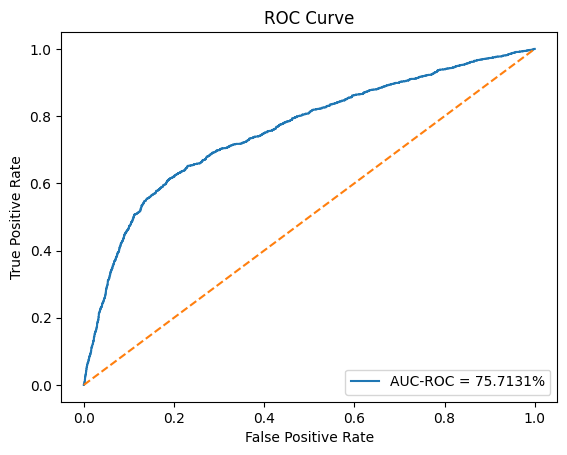

In [47]:
# Set the path to the saved model
model_path = 'DNN_model_best.pth'

# Evaluate the test set using the saved model and the best hyperparameters
test_accuracy = evaluate_test_set(model_path, 14,best_dropout_rate, best_lr, best_hidden_neurons_1, best_hidden_neurons_2, test_loader)


## Lets try improve this by running the static features through a logit model before concatenating them to the LSTM output

In [48]:
X_train_static = X_train[static_features].astype(int)
X_validation_static = X_validation[static_features].astype(int)
X_test_static = X_test[static_features].astype(int)


# Define the parameter grid for tuning
param_grid = {'C': np.logspace(-4, 4, 20)}

# Create a LogisticRegression instance
lr_static = LogisticRegression()

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(lr_static, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_static, y_train)

# Get the best parameters
best_logistic_params = grid_search.best_params_
print("Best parameters: ", best_logistic_params)

# Train the logistic regression model with the best parameters
lr_static_best = LogisticRegression(**best_logistic_params)
lr_static_best.fit(X_train_static, y_train)

# Make probability predictions on the train, validation, and test sets
y_pred_proba_static_train_lr = lr_static_best.predict_proba(X_train_static)[:, 1]
y_pred_proba_static_validation_lr = lr_static_best.predict_proba(X_validation_static)[:, 1]
y_pred_proba_static_test_lr = lr_static_best.predict_proba(X_test_static)[:, 1]


# Convert the probabilities to DataFrames
y_pred_proba_static_train_lr_df = pd.DataFrame(y_pred_proba_static_train_lr, columns=['lr_Probability'])
y_pred_proba_static_validation_lr_df = pd.DataFrame(y_pred_proba_static_validation_lr, columns=['lr_Probability'])
y_pred_proba_static_test_lr_df = pd.DataFrame(y_pred_proba_static_test_lr, columns=['lr_Probability'])



Best parameters:  {'C': 0.615848211066026}


In [49]:

# Combine the static logistic regression output and LSTM outputs for train, validation and test sets

x_train_combined_lr_array = np.array(pd.concat([y_pred_proba_static_train_lr_df] + [pd.DataFrame(lstm_output_train[key], columns=[f'LSTM_Output_{key}']) for key in keys], axis=1))
y_train_combined_lr_array = np.array(y_train)

x_validation_combined_lr_array = np.array(pd.concat([y_pred_proba_static_validation_lr_df] + [pd.DataFrame(lstm_output_validation[key], columns=[f'LSTM_Output_{key}']) for key in keys], axis=1))
y_validation_combined_lr_array = np.array(y_validation)

x_test_combined_lr_array = np.array(pd.concat([y_pred_proba_static_test_lr_df] + [pd.DataFrame(lstm_output_test[key], columns=[f'LSTM_Output_{key}']) for key in keys], axis=1))
y_test_combined_lr_array = np.array(y_test)

#  Define the number of input features
input_feature = 5

#  Convert the data arrays to PyTorch tensors and reshape the data to the desired input shape for the DNN model
x_train_DNN_lr = torch.from_numpy(x_train_combined_lr_array).reshape(-1,input_feature,1).type(torch.FloatTensor)
y_train_DNN_lr = torch.from_numpy(y_train_combined_lr_array.astype(np.float64)).view(-1,1).type(torch.FloatTensor)

x_validation_DNN_lr = torch.from_numpy(x_validation_combined_lr_array).reshape(-1, input_feature, 1).type(torch.FloatTensor)
y_validation_DNN_lr = torch.from_numpy(y_validation_combined_lr_array.astype(np.float64)).view(-1, 1).type(torch.FloatTensor)

x_test_DNN_lr = torch.from_numpy(x_test_combined_lr_array).reshape(-1,input_feature,1).type(torch.FloatTensor)
y_test_DNN_lr = torch.from_numpy(y_test_combined_lr_array.astype(np.float64)).view(-1,1).type(torch.FloatTensor)

#  Convert the target variables to long type
y_train_DNN_lr = y_train_DNN_lr.long()
y_validation_DNN_lr = y_validation_DNN_lr.long()
y_test_DNN_lr = y_test_DNN_lr.long()

#  Create data loaders for train, validation and test sets
train_data_lr = data_utils.TensorDataset(x_train_DNN_lr, y_train_DNN_lr)
validation_data_lr = data_utils.TensorDataset(x_validation_DNN_lr, y_validation_DNN_lr)
test_data_lr = data_utils.TensorDataset(x_test_DNN_lr, y_test_DNN_lr)

In [50]:
# Create data loaders for the model that uses the logistic regression combination

train_loader_lr = data_utils.DataLoader(
    dataset = train_data_lr,
    batch_size = 238,
    shuffle = True,
    num_workers = 4,
)



validation_loader_lr = data_utils.DataLoader(
    dataset=validation_data_lr,
    batch_size=200,
    shuffle=True,
    num_workers=4,
)



test_loader_lr = data_utils.DataLoader(
    dataset = test_data_lr,
    batch_size = 200,
    shuffle = True,
    num_workers = 4,
)




In [51]:
study = optuna.create_study(direction='maximize')

# Tune hyperparameters for 10 trials
study.optimize(Tuning_lr, n_trials=10)

# Get the best hyperparameters and corresponding validation accuracy
best_params_DNN_lr = study.best_params
best_val_acc_lr = study.best_value

print(f"Best hyperparameters: {best_params_DNN_lr}")
print(f"Best validation accuracy: {best_val_acc_lr}")

[I 2023-05-02 17:10:09,648] A new study created in memory with name: no-name-5c0dff8c-53b0-470b-b357-b0f5451cb53d


Epoch [1/100], Train Loss: 0.4477, Train Acc: 69.7020%, Val Loss: 0.8659, Val Acc: 62.1000%
Epoch [2/100], Train Loss: 0.3495, Train Acc: 80.9106%, Val Loss: 0.8373, Val Acc: 65.7500%
Epoch [3/100], Train Loss: 0.3606, Train Acc: 81.2525%, Val Loss: 0.7999, Val Acc: 68.3500%
Epoch [4/100], Train Loss: 0.4028, Train Acc: 80.9562%, Val Loss: 0.7229, Val Acc: 70.4500%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.3480, Train Acc: 81.1214%, Val Loss: 0.7311, Val Acc: 71.3500%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.4231, Train Acc: 81.1157%, Val Loss: 0.7801, Val Acc: 68.4500%
EarlyStopping counter: 3 out of 10
Epoch [7/100], Train Loss: 0.3744, Train Acc: 81.2183%, Val Loss: 0.7417, Val Acc: 70.1000%
EarlyStopping counter: 4 out of 10
Epoch [8/100], Train Loss: 0.3661, Train Acc: 81.0986%, Val Loss: 0.7460, Val Acc: 71.2500%
Epoch [9/100], Train Loss: 0.3259, Train Acc: 81.1613%, Val Loss: 0.6888, Val Acc: 73.1000%
EarlyStopping counter: 1 out of 

[I 2023-05-02 17:11:09,970] Trial 0 finished with value: 0.7275 and parameters: {'learning_rate': 0.001625438242707331, 'dropout': 0.2611828631176798, 'hidden_neurons_1': 40, 'hidden_neurons_2': 110, 'weight_decay': 0.0034911429457067248}. Best is trial 0 with value: 0.7275.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.5983, Train Acc: 59.0974%, Val Loss: 0.8077, Val Acc: 22.5500%
Epoch [2/100], Train Loss: 0.5276, Train Acc: 69.0638%, Val Loss: 0.6917, Val Acc: 61.2000%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.4665, Train Acc: 79.0643%, Val Loss: 0.7010, Val Acc: 65.7000%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.4176, Train Acc: 79.7652%, Val Loss: 0.7184, Val Acc: 64.9500%
EarlyStopping counter: 3 out of 10
Epoch [5/100], Train Loss: 0.4694, Train Acc: 79.9818%, Val Loss: 0.7144, Val Acc: 65.2500%
EarlyStopping counter: 4 out of 10
Epoch [6/100], Train Loss: 0.4430, Train Acc: 80.2724%, Val Loss: 0.7500, Val Acc: 63.0500%
EarlyStopping counter: 5 out of 10
Epoch [7/100], Train Loss: 0.5085, Train Acc: 80.0729%, Val Loss: 0.7496, Val Acc: 61.0000%
EarlyStopping counter: 6 out of 10
Epoch [8/100], Train Loss: 0.4737, Train Acc: 80.2553%, Val Loss: 0.7451, Val Acc: 60.3000%
Ear

[I 2023-05-02 17:11:42,852] Trial 1 finished with value: 0.612 and parameters: {'learning_rate': 0.001069712924347186, 'dropout': 0.4270210209107973, 'hidden_neurons_1': 40, 'hidden_neurons_2': 140, 'weight_decay': 0.050948445886834975}. Best is trial 0 with value: 0.7275.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6588, Train Acc: 59.2911%, Val Loss: 0.8284, Val Acc: 22.1500%
Epoch [2/100], Train Loss: 0.5635, Train Acc: 61.1659%, Val Loss: 0.7802, Val Acc: 32.6000%
Epoch [3/100], Train Loss: 0.4701, Train Acc: 73.4173%, Val Loss: 0.7167, Val Acc: 65.2000%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.4568, Train Acc: 78.7623%, Val Loss: 0.7308, Val Acc: 67.7000%
EarlyStopping counter: 2 out of 10
Epoch [5/100], Train Loss: 0.4397, Train Acc: 79.7823%, Val Loss: 0.7505, Val Acc: 68.1000%
Epoch [6/100], Train Loss: 0.3676, Train Acc: 80.1242%, Val Loss: 0.7145, Val Acc: 69.7000%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.3874, Train Acc: 80.4091%, Val Loss: 0.7828, Val Acc: 68.6000%
Epoch [8/100], Train Loss: 0.4129, Train Acc: 80.7225%, Val Loss: 0.7143, Val Acc: 70.3500%
EarlyStopping counter: 1 out of 10
Epoch [9/100], Train Loss: 0.3390, Train Acc: 80.7225%, Val Loss: 0.7680,

[I 2023-05-02 17:13:03,137] Trial 2 finished with value: 0.7265 and parameters: {'learning_rate': 0.00020655895973057802, 'dropout': 0.2841128918455328, 'hidden_neurons_1': 40, 'hidden_neurons_2': 130, 'weight_decay': 7.091729541033599e-05}. Best is trial 0 with value: 0.7275.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6855, Train Acc: 51.9175%, Val Loss: 0.6941, Val Acc: 48.6000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6752, Train Acc: 59.7356%, Val Loss: 0.7092, Val Acc: 32.6500%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.6740, Train Acc: 61.8326%, Val Loss: 0.7198, Val Acc: 28.0000%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.6522, Train Acc: 61.2628%, Val Loss: 0.7358, Val Acc: 23.0000%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.6452, Train Acc: 60.7784%, Val Loss: 0.7496, Val Acc: 21.8500%
EarlyStopping counter: 5 out of 10
Epoch [6/100], Train Loss: 0.6598, Train Acc: 60.3111%, Val Loss: 0.7596, Val Acc: 22.1500%
EarlyStopping counter: 6 out of 10
Epoch [7/100], Train Loss: 0.6617, Train Acc: 60.2200%, Val Loss: 0.7715, Val Acc: 22.9500%
EarlyStopping counter: 7 out of 10
Epoch [8/100], Train Loss: 0.6230, Train Acc: 60.2598%, Val 

[I 2023-05-02 17:13:36,222] Trial 3 finished with value: 0.486 and parameters: {'learning_rate': 1.9027145481389674e-05, 'dropout': 0.2624648312526943, 'hidden_neurons_1': 40, 'hidden_neurons_2': 110, 'weight_decay': 0.00010314376763841979}. Best is trial 0 with value: 0.7275.


EarlyStopping counter: 11 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6343, Train Acc: 59.9692%, Val Loss: 0.8311, Val Acc: 21.9500%
Epoch [2/100], Train Loss: 0.5899, Train Acc: 59.9578%, Val Loss: 0.8240, Val Acc: 21.5000%
Epoch [3/100], Train Loss: 0.5966, Train Acc: 59.9692%, Val Loss: 0.8072, Val Acc: 22.3500%
Epoch [4/100], Train Loss: 0.5762, Train Acc: 61.0006%, Val Loss: 0.7844, Val Acc: 25.9500%
Epoch [5/100], Train Loss: 0.4948, Train Acc: 66.9269%, Val Loss: 0.7773, Val Acc: 34.5500%
Epoch [6/100], Train Loss: 0.4892, Train Acc: 73.1723%, Val Loss: 0.7414, Val Acc: 50.7000%
Epoch [7/100], Train Loss: 0.4571, Train Acc: 77.7138%, Val Loss: 0.7098, Val Acc: 62.8500%
EarlyStopping counter: 1 out of 10
Epoch [8/100], Train Loss: 0.4826, Train Acc: 80.1698%, Val Loss: 0.7137, Val Acc: 65.3500%
EarlyStopping counter: 2 out of 10
Epoch [9/100], Train Loss: 0.4451, Train Acc: 80.9619%, Val Loss: 0.7209, Val Acc: 65.8500%
Epoch [10/100], Train Loss: 0.4392, Train Acc: 80.7

[I 2023-05-02 17:15:10,258] Trial 4 finished with value: 0.7095 and parameters: {'learning_rate': 0.0002251803155709303, 'dropout': 0.11400285789159577, 'hidden_neurons_1': 40, 'hidden_neurons_2': 100, 'weight_decay': 0.039145083830345116}. Best is trial 0 with value: 0.7275.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.3150, Train Acc: 78.3008%, Val Loss: 0.7392, Val Acc: 73.9500%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.4423, Train Acc: 80.8821%, Val Loss: 0.8070, Val Acc: 71.8500%
Epoch [3/100], Train Loss: 0.3654, Train Acc: 81.1613%, Val Loss: 0.7341, Val Acc: 72.9000%
Epoch [4/100], Train Loss: 0.3905, Train Acc: 81.1955%, Val Loss: 0.7029, Val Acc: 73.7000%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.3860, Train Acc: 81.2981%, Val Loss: 0.8000, Val Acc: 71.4500%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.3529, Train Acc: 81.3893%, Val Loss: 0.7038, Val Acc: 75.7000%
Epoch [7/100], Train Loss: 0.4274, Train Acc: 81.3551%, Val Loss: 0.6708, Val Acc: 74.5000%
Epoch [8/100], Train Loss: 0.4122, Train Acc: 81.4177%, Val Loss: 0.6436, Val Acc: 74.3000%
EarlyStopping counter: 1 out of 10
Epoch [9/100], Train Loss: 0.3319, Train Acc: 81.4006%, Val Loss: 0.7959,

ERROR: Unexpected segmentation fault encountered in worker.
 Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x281b42b90>
Traceback (most recent call last):
  File "/Users/joshuahayes-powell/miniforge3/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/Users/joshuahayes-powell/miniforge3/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1443, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/Users/joshuahayes-powell/miniforge3/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/Users/joshuahayes-powell/miniforge3/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/Users/joshuahayes-powell/miniforge3/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/Users/joshuahayes

EarlyStopping counter: 8 out of 10
Epoch [16/100], Train Loss: 0.3757, Train Acc: 81.5431%, Val Loss: 0.7458, Val Acc: 74.3500%
EarlyStopping counter: 9 out of 10
Epoch [17/100], Train Loss: 0.3804, Train Acc: 81.5146%, Val Loss: 0.8289, Val Acc: 72.0000%


[I 2023-05-02 17:16:00,678] Trial 5 finished with value: 0.743 and parameters: {'learning_rate': 0.010090418689395982, 'dropout': 0.6593065995101179, 'hidden_neurons_1': 40, 'hidden_neurons_2': 90, 'weight_decay': 0.000781345939973252}. Best is trial 5 with value: 0.743.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.3985, Train Acc: 74.5114%, Val Loss: 0.7221, Val Acc: 68.0000%
Epoch [2/100], Train Loss: 0.3966, Train Acc: 80.5858%, Val Loss: 0.5888, Val Acc: 75.0000%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.4330, Train Acc: 80.6542%, Val Loss: 0.6384, Val Acc: 72.9500%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.4274, Train Acc: 80.6827%, Val Loss: 0.7896, Val Acc: 66.2500%
EarlyStopping counter: 3 out of 10
Epoch [5/100], Train Loss: 0.4118, Train Acc: 80.8422%, Val Loss: 0.7016, Val Acc: 70.7000%
EarlyStopping counter: 4 out of 10
Epoch [6/100], Train Loss: 0.3918, Train Acc: 80.8479%, Val Loss: 0.8068, Val Acc: 66.3500%
EarlyStopping counter: 5 out of 10
Epoch [7/100], Train Loss: 0.3926, Train Acc: 80.5459%, Val Loss: 0.8467, Val Acc: 59.8500%
EarlyStopping counter: 6 out of 10
Epoch [8/100], Train Loss: 0.3987, Train Acc: 80.8707%, Val Loss: 0.8103, Val Acc: 63.8500%
Ear

[I 2023-05-02 17:16:33,711] Trial 6 finished with value: 0.75 and parameters: {'learning_rate': 0.004841753786462319, 'dropout': 0.32527037286775956, 'hidden_neurons_1': 50, 'hidden_neurons_2': 90, 'weight_decay': 0.016957053193225734}. Best is trial 6 with value: 0.75.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.4240, Train Acc: 76.0100%, Val Loss: 0.7278, Val Acc: 76.1000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.3938, Train Acc: 80.1584%, Val Loss: 0.8212, Val Acc: 70.1500%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.4439, Train Acc: 80.2952%, Val Loss: 0.9034, Val Acc: 69.7000%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.3408, Train Acc: 80.6485%, Val Loss: 0.7815, Val Acc: 73.1000%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.4030, Train Acc: 80.4889%, Val Loss: 0.7585, Val Acc: 76.5500%
EarlyStopping counter: 5 out of 10
Epoch [6/100], Train Loss: 0.3610, Train Acc: 80.8821%, Val Loss: 1.0009, Val Acc: 70.4000%
Epoch [7/100], Train Loss: 0.4208, Train Acc: 80.7852%, Val Loss: 0.6680, Val Acc: 76.3000%
EarlyStopping counter: 1 out of 10
Epoch [8/100], Train Loss: 0.4349, Train Acc: 80.5801%, Val Loss: 0.9909, Val Acc: 56.8500%
Ear

[I 2023-05-02 17:17:36,813] Trial 7 finished with value: 0.7725 and parameters: {'learning_rate': 0.06855996046824267, 'dropout': 0.6349012707226778, 'hidden_neurons_1': 40, 'hidden_neurons_2': 120, 'weight_decay': 0.00040172662655286746}. Best is trial 7 with value: 0.7725.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6761, Train Acc: 57.6215%, Val Loss: 0.7562, Val Acc: 20.8000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6491, Train Acc: 59.9578%, Val Loss: 0.7857, Val Acc: 20.3000%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.6630, Train Acc: 59.9635%, Val Loss: 0.8016, Val Acc: 20.7000%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.6451, Train Acc: 59.9578%, Val Loss: 0.8043, Val Acc: 21.7500%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.6550, Train Acc: 59.9749%, Val Loss: 0.8005, Val Acc: 22.1000%
EarlyStopping counter: 5 out of 10
Epoch [6/100], Train Loss: 0.6621, Train Acc: 59.9635%, Val Loss: 0.8040, Val Acc: 21.2500%
EarlyStopping counter: 6 out of 10
Epoch [7/100], Train Loss: 0.6329, Train Acc: 59.9578%, Val Loss: 0.8035, Val Acc: 20.9000%
EarlyStopping counter: 7 out of 10
Epoch [8/100], Train Loss: 0.6325, Train Acc: 59.9977%, Val 

[I 2023-05-02 17:18:10,422] Trial 8 finished with value: 0.208 and parameters: {'learning_rate': 0.00012654620670591172, 'dropout': 0.44042622430912937, 'hidden_neurons_1': 50, 'hidden_neurons_2': 130, 'weight_decay': 0.06876528222692499}. Best is trial 7 with value: 0.7725.


EarlyStopping counter: 11 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.4302, Train Acc: 76.8306%, Val Loss: 0.8427, Val Acc: 69.8500%
Epoch [2/100], Train Loss: 0.4030, Train Acc: 81.2639%, Val Loss: 0.7211, Val Acc: 74.7000%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.3294, Train Acc: 81.3950%, Val Loss: 0.8594, Val Acc: 71.6000%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.3746, Train Acc: 81.4918%, Val Loss: 0.8421, Val Acc: 71.7500%
EarlyStopping counter: 3 out of 10
Epoch [5/100], Train Loss: 0.3744, Train Acc: 81.6115%, Val Loss: 0.7466, Val Acc: 71.4500%
Epoch [6/100], Train Loss: 0.4322, Train Acc: 81.9192%, Val Loss: 0.7060, Val Acc: 72.9500%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.3818, Train Acc: 82.0332%, Val Loss: 0.7503, Val Acc: 70.3500%
EarlyStopping counter: 2 out of 10
Epoch [8/100], Train Loss: 0.4009, Train Acc: 81.9933%, Val Loss: 0.8032, Val Acc: 67.9000%
EarlyStopping counter: 3 out of 10
Epo

[I 2023-05-02 17:19:13,531] Trial 9 finished with value: 0.7105 and parameters: {'learning_rate': 0.005066707334633906, 'dropout': 0.6993320844507777, 'hidden_neurons_1': 50, 'hidden_neurons_2': 110, 'weight_decay': 0.0001085922402452526}. Best is trial 7 with value: 0.7725.


EarlyStopping counter: 10 out of 10
Early stopping
Best hyperparameters: {'learning_rate': 0.06855996046824267, 'dropout': 0.6349012707226778, 'hidden_neurons_1': 40, 'hidden_neurons_2': 120, 'weight_decay': 0.00040172662655286746}
Best validation accuracy: 0.7725


In [52]:
best_lr = best_params_DNN['learning_rate']
best_dropout_rate = best_params_DNN['dropout']
best_hidden_neurons_1 = best_params_DNN['hidden_neurons_1']
best_hidden_neurons_2 = best_params_DNN['hidden_neurons_2']
best_weight_decay = best_params_DNN['weight_decay']

In [53]:
# Train the final model with the best hyperparameters
# Create an instance of the DNN model with the best dropout rate
dnn_final = DNN(input_feature, best_dropout_rate, best_hidden_neurons_1, best_hidden_neurons_2)

# Create an optimizer object for stochastic gradient descent with the Adam algorithm
optimizer = torch.optim.Adam(dnn_final.parameters(), lr=best_lr)  

# Define the loss function as cross-entropy loss
loss_func = nn.CrossEntropyLoss() 


# Train and evaluate the model with the best hyperparameters on the training and test set
train_and_evaluate(input_feature, best_lr, best_dropout_rate,best_hidden_neurons_1, best_hidden_neurons_2,best_weight_decay, train_loader_lr,validation_loader_lr)

Epoch [1/100], Train Loss: 0.3782, Train Acc: 78.0557%, Val Loss: 0.8470, Val Acc: 69.9000%
Epoch [2/100], Train Loss: 0.3656, Train Acc: 81.0758%, Val Loss: 0.8039, Val Acc: 69.2000%
Epoch [3/100], Train Loss: 0.2949, Train Acc: 81.4462%, Val Loss: 0.7846, Val Acc: 74.6000%
Epoch [4/100], Train Loss: 0.2675, Train Acc: 81.5146%, Val Loss: 0.7739, Val Acc: 75.1000%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.3665, Train Acc: 81.7881%, Val Loss: 0.8879, Val Acc: 67.6000%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.3336, Train Acc: 82.0275%, Val Loss: 0.8379, Val Acc: 67.3000%
Epoch [7/100], Train Loss: 0.3973, Train Acc: 81.9420%, Val Loss: 0.7044, Val Acc: 72.0000%
EarlyStopping counter: 1 out of 10
Epoch [8/100], Train Loss: 0.3140, Train Acc: 81.9591%, Val Loss: 0.7757, Val Acc: 70.8500%
EarlyStopping counter: 2 out of 10
Epoch [9/100], Train Loss: 0.3023, Train Acc: 81.9306%, Val Loss: 0.8335, Val Acc: 69.0500%
EarlyStopping counter: 3 out of 

0.772

F1 Score: 0.5514458641560188
F2 Score: 0.5877293577981652
Test Accuracy: 77.4700%
AUC-ROC Score: 0.7718750990757075
Precision: 0.5
Recall: 0.6146926536731634


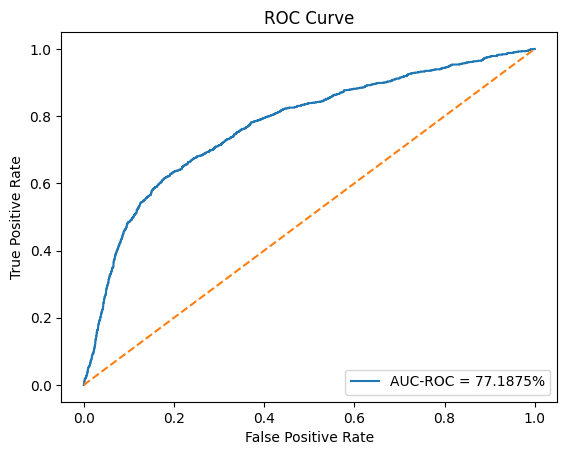

In [54]:
# Load the best weights and evaluate the model on the test set

model_path = 'DNN_model_best.pth'
test_accuracy = evaluate_test_set(model_path, 5, best_dropout_rate, best_lr,best_hidden_neurons_1, best_hidden_neurons_2, test_loader_lr)


## Now we try using the voting classifier instead of the DNN

In [55]:
Voting_Classifier(x_train_combined_array, x_test_combined_array, y_train_combined_array, y_test_combined_array, best_logistic_params)

LogisticRegression
Accuracy: 0.7137307887181219
F1 score: 0.5232067510548523
F2 score: 0.6153235410877331
Precision: 0.41873030166591624
Recall: 0.697151424287856

RandomForestClassifier
Accuracy: 0.7047795980408714
F1 score: 0.511731843575419
F2 score: 0.6040622527037722
Precision: 0.40783615316117544
Recall: 0.6866566716641679

DecisionTreeClassifier
Accuracy: 0.6574902888025671
F1 score: 0.4702194357366772
F2 score: 0.5747126436781609
Precision: 0.3608660785886127
Recall: 0.6746626686656672

VotingClassifier
Accuracy: 0.6834994088836345
F1 score: 0.4967776584317937
F2 score: 0.598628009319182
Precision: 0.38702928870292885
Recall: 0.6934032983508246



In [56]:
Voting_Classifier(x_train_combined_lr_array, x_test_combined_lr_array, y_train_combined_lr_array, y_test_combined_lr_array, best_logistic_params)

LogisticRegression
Accuracy: 0.7032595845296402
F1 score: 0.516643741403026
F2 score: 0.6147701977216184
Precision: 0.40808344198174706
Recall: 0.7038980509745127

RandomForestClassifier
Accuracy: 0.7086640770140179
F1 score: 0.5136735269241612
F2 score: 0.6033911776394225
Precision: 0.41165838228648893
Recall: 0.6829085457271364

DecisionTreeClassifier
Accuracy: 0.6613747677757136
F1 score: 0.4752682543836692
F2 score: 0.5803400230090758
Precision: 0.3650985122637716
Recall: 0.6806596701649176

VotingClassifier
Accuracy: 0.6846816416145921
F1 score: 0.5027962716378162
F2 score: 0.6084826608224829
Precision: 0.3899215200330442
Recall: 0.7076461769115442



In [57]:
AdaBoost_Classifier(x_train_combined_array, x_test_combined_array, y_train_combined_array, y_test_combined_array, best_logistic_params)

logistic_regression as base estimator:
AdaBoostClassifier
Accuracy: 0.5720317513933457
F1 score: 0.4562231759656653
F2 score: 0.6135996305703071
Precision: 0.3196031268791341
Recall: 0.7968515742128935

random_forest as base estimator:
AdaBoostClassifier
Accuracy: 0.6975173112649891
F1 score: 0.5110565110565111
F2 score: 0.6105675146771038
Precision: 0.4018892228424216
Recall: 0.7016491754122939

decision_tree as base estimator:
AdaBoostClassifier
Accuracy: 0.6600236446546192
F1 score: 0.48291805805291554
F2 score: 0.5953134895503484
Precision: 0.36733098866744823
Recall: 0.704647676161919



In [58]:
AdaBoost_Classifier(x_train_combined_lr_array, x_test_combined_lr_array, y_train_combined_lr_array, y_test_combined_lr_array, best_logistic_params)

logistic_regression as base estimator:
AdaBoostClassifier
Accuracy: 0.6277655801384902
F1 score: 0.4840823970037453
F2 score: 0.6248489243413102
Precision: 0.35194009530292714
Recall: 0.775112443778111

random_forest as base estimator:
AdaBoostClassifier
Accuracy: 0.7076507346731971
F1 score: 0.5198335644937586
F2 score: 0.6158801104246089
Precision: 0.41259357111404665
Recall: 0.7023988005997002

decision_tree as base estimator:
AdaBoostClassifier
Accuracy: 0.6666103698699544
F1 score: 0.4827044025157232
F2 score: 0.5890253261703761
Precision: 0.37107171635777597
Recall: 0.6904047976011994



## Additional benchmark lets look how a accurate a DNN would be if it was just given the original variables

In [70]:
# Specify the columns to standardize
cols_to_scale = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Call the function with the desired ratios
ratios = (0.6, 0.2, 0.2)  # Train: 60%, Validation: 20%, Test: 20%
df_train, df_validation, df_test = data_train_test(dataset, ratios, cols_to_scale)


# Putting feature variable to X
X_train = df_train.drop('Default', axis=1)
X_validation = df_validation.drop('Default', axis=1)
X_test = df_test.drop('Default', axis=1)

# Putting response variable to y
y_train = df_train['Default']
y_validation = df_validation['Default']
y_test = df_test['Default']

from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN()
X_train, y_train = smoteenn.fit_resample(X_train, y_train)

In [71]:

# Define the number of input features
input_feature = 35

# Convert the train, validation and test data to PyTorch tensors
x_train_DNN = torch.from_numpy(X_train.values.astype(int)).reshape(-1, input_feature, 1).type(torch.FloatTensor)
y_train_DNN = torch.from_numpy(y_train.values.astype(np.float64)).view(-1, 1).type(torch.FloatTensor)

x_validation_DNN = torch.from_numpy(X_validation.values.astype(int)).reshape(-1, input_feature, 1).type(torch.FloatTensor)
y_validation_DNN = torch.from_numpy(y_validation.values.astype(np.float64)).view(-1, 1).type(torch.FloatTensor)

x_test_DNN = torch.from_numpy(X_test.values.astype(int)).reshape(-1, input_feature, 1).type(torch.FloatTensor)
y_test_DNN = torch.from_numpy(y_test.values.astype(np.float64)).view(-1, 1).type(torch.FloatTensor)

# Convert the train, validation and test labels to PyTorch tensors with dtype long
y_train_DNN = y_train_DNN.long()
y_validation_DNN = y_validation_DNN.long()
y_test_DNN = y_test_DNN.long()

# Create PyTorch datasets from the train, validation and test data
train_data_DNN = data_utils.TensorDataset(x_train_DNN, y_train_DNN)
validation_data_DNN = data_utils.TensorDataset(x_validation_DNN, y_validation_DNN)
test_data_DNN = data_utils.TensorDataset(x_test_DNN, y_test_DNN)

# Print the shape of the train, validation and test datasets
print(x_train_DNN.shape,y_train_DNN.shape)
print(x_validation_DNN.shape,y_test_DNN.shape)
print(x_test_DNN.shape,y_test_DNN.shape)


torch.Size([17526, 35, 1]) torch.Size([17526, 1])
torch.Size([5920, 35, 1]) torch.Size([5921, 1])
torch.Size([5921, 35, 1]) torch.Size([5921, 1])


In [72]:

# Create DataLoader for training data
train_loader = data_utils.DataLoader(
    dataset = train_data_DNN,
    batch_size = 238,  # Number of samples per batch
    shuffle = True,  # Shuffle the data at every epoch
    num_workers = 0,  # Number of subprocesses to use for data loading
)

# Create DataLoader for validation data
validation_loader = data_utils.DataLoader(
    dataset=validation_data_DNN,
    batch_size=200,  # Number of samples per batch
    shuffle=True,  # Shuffle the data at every epoch
    num_workers=0,  # Number of subprocesses to use for data loading
)

# Create DataLoader for test data
test_loader = data_utils.DataLoader(
    dataset = test_data_DNN,
    batch_size = 200,  # Number of samples per batch
    shuffle = True,  # Shuffle the data at every epoch
    num_workers = 0,  # Number of subprocesses to use for data loading
)


In [73]:
study = optuna.create_study(direction='maximize')

# Tune hyperparameters for 10 trials
study.optimize(Tuning_DNN, n_trials=10)

# Get the best hyperparameters and corresponding validation accuracy
best_params_DNN = study.best_params
best_val_acc = study.best_value

print(f"Best hyperparameters: {best_params_DNN}")
print(f"Best validation accuracy: {best_val_acc}")

[I 2023-05-02 10:53:53,838] A new study created in memory with name: no-name-a6a88bba-9a8b-423f-a6b3-2c12ed8199b7


Epoch [1/100], Train Loss: 0.4420, Train Acc: 72.3611%, Val Loss: 0.7428, Val Acc: 72.3000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.3822, Train Acc: 79.0768%, Val Loss: 0.8034, Val Acc: 70.7000%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.4818, Train Acc: 79.6246%, Val Loss: 0.8088, Val Acc: 66.6000%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.3643, Train Acc: 79.5219%, Val Loss: 0.8128, Val Acc: 68.6500%
Epoch [5/100], Train Loss: 0.4080, Train Acc: 79.4990%, Val Loss: 0.7269, Val Acc: 74.3500%
EarlyStopping counter: 1 out of 10
Epoch [6/100], Train Loss: 0.3815, Train Acc: 79.8357%, Val Loss: 0.7323, Val Acc: 73.1000%
EarlyStopping counter: 2 out of 10
Epoch [7/100], Train Loss: 0.3489, Train Acc: 79.8984%, Val Loss: 0.7865, Val Acc: 71.7500%
EarlyStopping counter: 3 out of 10
Epoch [8/100], Train Loss: 0.3400, Train Acc: 79.8699%, Val Loss: 0.7326, Val Acc: 74.1500%
EarlyStopping counter: 4 out of 10
Epoch [9/100], Trai

[I 2023-05-02 10:54:02,449] Trial 0 finished with value: 0.7435 and parameters: {'learning_rate': 0.0007759355409309254, 'dropout': 0.2037829244455096, 'hidden_neurons_1': 50, 'hidden_neurons_2': 90, 'weight_decay': 0.010069331229310105}. Best is trial 0 with value: 0.7435.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6643, Train Acc: 51.9628%, Val Loss: 0.7097, Val Acc: 33.9000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6513, Train Acc: 62.1990%, Val Loss: 0.7118, Val Acc: 34.3500%
Epoch [3/100], Train Loss: 0.6457, Train Acc: 64.6753%, Val Loss: 0.7013, Val Acc: 44.5500%
Epoch [4/100], Train Loss: 0.5954, Train Acc: 70.3013%, Val Loss: 0.6890, Val Acc: 60.7500%
Epoch [5/100], Train Loss: 0.5881, Train Acc: 74.7746%, Val Loss: 0.6661, Val Acc: 69.1000%
Epoch [6/100], Train Loss: 0.5134, Train Acc: 76.8401%, Val Loss: 0.6502, Val Acc: 72.9000%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.4794, Train Acc: 77.5876%, Val Loss: 0.6550, Val Acc: 72.8000%
EarlyStopping counter: 2 out of 10
Epoch [8/100], Train Loss: 0.4893, Train Acc: 77.6618%, Val Loss: 0.6591, Val Acc: 73.4000%
EarlyStopping counter: 3 out of 10
Epoch [9/100], Train Loss: 0.4294, Train Acc: 77.9128%, Val Loss: 0.6962,

[I 2023-05-02 10:54:11,390] Trial 1 finished with value: 0.729 and parameters: {'learning_rate': 6.393621676682844e-05, 'dropout': 0.21789324969395887, 'hidden_neurons_1': 30, 'hidden_neurons_2': 100, 'weight_decay': 8.24366262533807e-05}. Best is trial 0 with value: 0.7435.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6916, Train Acc: 48.1171%, Val Loss: 0.6795, Val Acc: 67.2500%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6837, Train Acc: 57.5088%, Val Loss: 0.6823, Val Acc: 62.9500%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.6603, Train Acc: 63.6426%, Val Loss: 0.6865, Val Acc: 60.2500%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.6515, Train Acc: 66.8949%, Val Loss: 0.6907, Val Acc: 55.9000%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.6418, Train Acc: 68.2415%, Val Loss: 0.6961, Val Acc: 55.1000%
EarlyStopping counter: 5 out of 10
Epoch [6/100], Train Loss: 0.6194, Train Acc: 69.4226%, Val Loss: 0.6934, Val Acc: 56.8000%
EarlyStopping counter: 6 out of 10
Epoch [7/100], Train Loss: 0.6010, Train Acc: 70.8034%, Val Loss: 0.6934, Val Acc: 57.9000%
EarlyStopping counter: 7 out of 10
Epoch [8/100], Train Loss: 0.6017, Train Acc: 70.9746%, Val 

[I 2023-05-02 10:54:17,490] Trial 2 finished with value: 0.6725 and parameters: {'learning_rate': 2.21153753741738e-05, 'dropout': 0.23198418465470755, 'hidden_neurons_1': 40, 'hidden_neurons_2': 80, 'weight_decay': 0.00013848954023613805}. Best is trial 0 with value: 0.7435.


EarlyStopping counter: 11 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.3854, Train Acc: 74.7803%, Val Loss: 0.9230, Val Acc: 63.8000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.4487, Train Acc: 78.0383%, Val Loss: 0.9810, Val Acc: 73.5000%
Epoch [3/100], Train Loss: 0.5107, Train Acc: 78.8600%, Val Loss: 0.6584, Val Acc: 76.9500%
Epoch [4/100], Train Loss: 0.4197, Train Acc: 78.5918%, Val Loss: 0.6323, Val Acc: 77.5000%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.4561, Train Acc: 78.5975%, Val Loss: 0.9153, Val Acc: 70.9500%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.4381, Train Acc: 78.3408%, Val Loss: 0.9717, Val Acc: 74.0000%
EarlyStopping counter: 3 out of 10
Epoch [7/100], Train Loss: 0.4436, Train Acc: 79.0426%, Val Loss: 0.9882, Val Acc: 74.4500%
EarlyStopping counter: 4 out of 10
Epoch [8/100], Train Loss: 0.4209, Train Acc: 78.8429%, Val Loss: 0.9592, Val Acc: 68.6500%
EarlyStopping counter: 5 out of 10
Epo

[I 2023-05-02 10:54:24,647] Trial 3 finished with value: 0.775 and parameters: {'learning_rate': 0.06725059310276178, 'dropout': 0.51721065407326, 'hidden_neurons_1': 50, 'hidden_neurons_2': 100, 'weight_decay': 0.004002292674949007}. Best is trial 3 with value: 0.775.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.3842, Train Acc: 76.7888%, Val Loss: 0.8592, Val Acc: 65.3000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.4251, Train Acc: 79.6531%, Val Loss: 0.8607, Val Acc: 69.9000%
Epoch [3/100], Train Loss: 0.3663, Train Acc: 80.4690%, Val Loss: 0.8537, Val Acc: 66.8500%
Epoch [4/100], Train Loss: 0.3714, Train Acc: 80.9312%, Val Loss: 0.7814, Val Acc: 71.7500%
Epoch [5/100], Train Loss: 0.4263, Train Acc: 80.9312%, Val Loss: 0.6841, Val Acc: 75.8000%
Epoch [6/100], Train Loss: 0.3273, Train Acc: 81.5531%, Val Loss: 0.6818, Val Acc: 74.7000%
EarlyStopping counter: 1 out of 10
Epoch [7/100], Train Loss: 0.4078, Train Acc: 82.0666%, Val Loss: 0.7558, Val Acc: 72.7500%
EarlyStopping counter: 2 out of 10
Epoch [8/100], Train Loss: 0.3830, Train Acc: 81.8898%, Val Loss: 0.7150, Val Acc: 72.7000%
EarlyStopping counter: 3 out of 10
Epoch [9/100], Train Loss: 0.4371, Train Acc: 82.3177%, Val Loss: 0.8026,

[I 2023-05-02 10:54:32,637] Trial 4 finished with value: 0.747 and parameters: {'learning_rate': 0.0018214868444172375, 'dropout': 0.40879796511098654, 'hidden_neurons_1': 50, 'hidden_neurons_2': 110, 'weight_decay': 0.00010030428124647921}. Best is trial 3 with value: 0.775.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6531, Train Acc: 59.8996%, Val Loss: 0.7295, Val Acc: 31.4500%
Epoch [2/100], Train Loss: 0.5671, Train Acc: 65.9534%, Val Loss: 0.7009, Val Acc: 48.6000%
Epoch [3/100], Train Loss: 0.5415, Train Acc: 72.7662%, Val Loss: 0.6987, Val Acc: 65.4500%
Epoch [4/100], Train Loss: 0.4929, Train Acc: 76.3951%, Val Loss: 0.6826, Val Acc: 68.9500%
EarlyStopping counter: 1 out of 10
Epoch [5/100], Train Loss: 0.5191, Train Acc: 77.8558%, Val Loss: 0.7037, Val Acc: 72.0500%
EarlyStopping counter: 2 out of 10
Epoch [6/100], Train Loss: 0.4571, Train Acc: 78.2951%, Val Loss: 0.6904, Val Acc: 73.5500%
EarlyStopping counter: 3 out of 10
Epoch [7/100], Train Loss: 0.4730, Train Acc: 78.6831%, Val Loss: 0.7118, Val Acc: 73.4500%
EarlyStopping counter: 4 out of 10
Epoch [8/100], Train Loss: 0.4747, Train Acc: 78.9399%, Val Loss: 0.7079, Val Acc: 73.4500%
EarlyStopping counter: 5 out of 10
Epoch [9/100], Train Loss: 0.4801, Tra

[I 2023-05-02 10:54:39,606] Trial 5 finished with value: 0.6895 and parameters: {'learning_rate': 0.0002239227763334171, 'dropout': 0.6368346056208917, 'hidden_neurons_1': 30, 'hidden_neurons_2': 150, 'weight_decay': 0.05197954264127768}. Best is trial 3 with value: 0.775.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6856, Train Acc: 47.9345%, Val Loss: 0.6897, Val Acc: 54.6000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6626, Train Acc: 60.6413%, Val Loss: 0.7037, Val Acc: 40.0000%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.6461, Train Acc: 64.6468%, Val Loss: 0.7106, Val Acc: 35.9000%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.6271, Train Acc: 65.0519%, Val Loss: 0.7126, Val Acc: 38.9000%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.6001, Train Acc: 65.8222%, Val Loss: 0.7133, Val Acc: 40.2500%
EarlyStopping counter: 5 out of 10
Epoch [6/100], Train Loss: 0.6080, Train Acc: 67.6709%, Val Loss: 0.7197, Val Acc: 45.3000%
EarlyStopping counter: 6 out of 10
Epoch [7/100], Train Loss: 0.5759, Train Acc: 69.7535%, Val Loss: 0.7126, Val Acc: 52.7000%
EarlyStopping counter: 7 out of 10
Epoch [8/100], Train Loss: 0.5278, Train Acc: 72.1328%, Val 

[I 2023-05-02 10:54:45,619] Trial 6 finished with value: 0.546 and parameters: {'learning_rate': 4.568869500546501e-05, 'dropout': 0.324773831780287, 'hidden_neurons_1': 20, 'hidden_neurons_2': 110, 'weight_decay': 0.00012538710066745787}. Best is trial 3 with value: 0.775.


EarlyStopping counter: 11 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.3832, Train Acc: 73.4452%, Val Loss: 0.8276, Val Acc: 72.1000%
Epoch [2/100], Train Loss: 0.4904, Train Acc: 79.2537%, Val Loss: 0.7934, Val Acc: 71.6500%
Epoch [3/100], Train Loss: 0.4945, Train Acc: 79.4648%, Val Loss: 0.7566, Val Acc: 72.7500%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.4140, Train Acc: 79.7216%, Val Loss: 0.8207, Val Acc: 69.9500%
Epoch [5/100], Train Loss: 0.4094, Train Acc: 80.0411%, Val Loss: 0.7359, Val Acc: 74.4500%
EarlyStopping counter: 1 out of 10
Epoch [6/100], Train Loss: 0.4372, Train Acc: 80.4405%, Val Loss: 0.7918, Val Acc: 72.1000%
EarlyStopping counter: 2 out of 10
Epoch [7/100], Train Loss: 0.3392, Train Acc: 80.5033%, Val Loss: 0.8360, Val Acc: 70.2500%
EarlyStopping counter: 3 out of 10
Epoch [8/100], Train Loss: 0.3902, Train Acc: 80.8798%, Val Loss: 0.8759, Val Acc: 69.7000%
EarlyStopping counter: 4 out of 10
Epoch [9/100], Train Loss: 0.3514, Tra

[I 2023-05-02 10:54:57,822] Trial 7 finished with value: 0.723 and parameters: {'learning_rate': 0.0011062564722564819, 'dropout': 0.3910937335864808, 'hidden_neurons_1': 20, 'hidden_neurons_2': 90, 'weight_decay': 1.2536192277867907e-05}. Best is trial 3 with value: 0.775.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.4003, Train Acc: 76.9771%, Val Loss: 0.8143, Val Acc: 72.8000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.3883, Train Acc: 80.0867%, Val Loss: 0.9830, Val Acc: 64.9500%
Epoch [3/100], Train Loss: 0.4342, Train Acc: 80.6744%, Val Loss: 0.7885, Val Acc: 71.3500%
EarlyStopping counter: 1 out of 10
Epoch [4/100], Train Loss: 0.3038, Train Acc: 81.2108%, Val Loss: 0.8191, Val Acc: 68.6000%
Epoch [5/100], Train Loss: 0.4199, Train Acc: 81.8156%, Val Loss: 0.7325, Val Acc: 75.2000%
EarlyStopping counter: 1 out of 10
Epoch [6/100], Train Loss: 0.4597, Train Acc: 81.8898%, Val Loss: 0.7962, Val Acc: 74.1000%
EarlyStopping counter: 2 out of 10
Epoch [7/100], Train Loss: 0.3595, Train Acc: 81.9012%, Val Loss: 0.8992, Val Acc: 70.6000%
EarlyStopping counter: 3 out of 10
Epoch [8/100], Train Loss: 0.3348, Train Acc: 82.1294%, Val Loss: 0.8992, Val Acc: 70.2000%
EarlyStopping counter: 4 out of 10
Epo

[I 2023-05-02 10:55:05,516] Trial 8 finished with value: 0.752 and parameters: {'learning_rate': 0.0044017323665383554, 'dropout': 0.575510040769895, 'hidden_neurons_1': 30, 'hidden_neurons_2': 140, 'weight_decay': 3.3616569709442536e-05}. Best is trial 3 with value: 0.775.


EarlyStopping counter: 10 out of 10
Early stopping
Epoch [1/100], Train Loss: 0.6719, Train Acc: 52.9385%, Val Loss: 0.7188, Val Acc: 26.2000%
EarlyStopping counter: 1 out of 10
Epoch [2/100], Train Loss: 0.6664, Train Acc: 60.1335%, Val Loss: 0.7275, Val Acc: 23.1000%
EarlyStopping counter: 2 out of 10
Epoch [3/100], Train Loss: 0.6461, Train Acc: 60.4074%, Val Loss: 0.7339, Val Acc: 22.3500%
EarlyStopping counter: 3 out of 10
Epoch [4/100], Train Loss: 0.6323, Train Acc: 60.2762%, Val Loss: 0.7373, Val Acc: 23.4500%
EarlyStopping counter: 4 out of 10
Epoch [5/100], Train Loss: 0.5788, Train Acc: 60.3560%, Val Loss: 0.7430, Val Acc: 21.7500%
EarlyStopping counter: 5 out of 10
Epoch [6/100], Train Loss: 0.6010, Train Acc: 60.7783%, Val Loss: 0.7464, Val Acc: 24.5500%
EarlyStopping counter: 6 out of 10
Epoch [7/100], Train Loss: 0.5274, Train Acc: 63.0777%, Val Loss: 0.7333, Val Acc: 38.3500%
EarlyStopping counter: 7 out of 10
Epoch [8/100], Train Loss: 0.5221, Train Acc: 70.1814%, Val 

[I 2023-05-02 10:55:16,660] Trial 9 finished with value: 0.7515 and parameters: {'learning_rate': 6.617987265821315e-05, 'dropout': 0.4143590542600032, 'hidden_neurons_1': 50, 'hidden_neurons_2': 130, 'weight_decay': 0.038137762301726504}. Best is trial 3 with value: 0.775.


EarlyStopping counter: 10 out of 10
Early stopping
Best hyperparameters: {'learning_rate': 0.06725059310276178, 'dropout': 0.51721065407326, 'hidden_neurons_1': 50, 'hidden_neurons_2': 100, 'weight_decay': 0.004002292674949007}
Best validation accuracy: 0.775


In [74]:
best_lr = best_params_DNN['learning_rate']
best_dropout_rate = best_params_DNN['dropout']
best_hidden_neurons_1 = best_params_DNN['hidden_neurons_1']
best_hidden_neurons_2 = best_params_DNN['hidden_neurons_2']
best_weight_decay = best_params_DNN['weight_decay']




In [75]:

# Define the final DNN model
dnn_final = DNN(input_feature, best_dropout_rate, best_hidden_neurons_1, best_hidden_neurons_2)
optimizer = torch.optim.Adam(dnn_final.parameters(), lr=best_lr)  
loss_func = nn.CrossEntropyLoss()

# Train and evaluate the final DNN model
train_and_evaluate(input_feature, best_lr, best_dropout_rate,best_hidden_neurons_1, best_hidden_neurons_2,best_weight_decay,train_loader, validation_loader)




Epoch [1/100], Train Loss: 0.4162, Train Acc: 75.2596%, Val Loss: 0.9523, Val Acc: 74.1000%
Epoch [2/100], Train Loss: 0.3962, Train Acc: 79.1224%, Val Loss: 0.8102, Val Acc: 69.5000%
EarlyStopping counter: 1 out of 10
Epoch [3/100], Train Loss: 0.5059, Train Acc: 79.1339%, Val Loss: 0.8441, Val Acc: 74.5500%
EarlyStopping counter: 2 out of 10
Epoch [4/100], Train Loss: 0.4663, Train Acc: 78.9684%, Val Loss: 0.8122, Val Acc: 73.3000%
EarlyStopping counter: 3 out of 10
Epoch [5/100], Train Loss: 0.4015, Train Acc: 78.6945%, Val Loss: 0.8710, Val Acc: 64.4500%
EarlyStopping counter: 4 out of 10
Epoch [6/100], Train Loss: 0.4279, Train Acc: 79.0312%, Val Loss: 0.9005, Val Acc: 75.3500%
EarlyStopping counter: 5 out of 10
Epoch [7/100], Train Loss: 0.4019, Train Acc: 78.9741%, Val Loss: 0.8413, Val Acc: 73.3000%
EarlyStopping counter: 6 out of 10
Epoch [8/100], Train Loss: 0.3545, Train Acc: 78.8372%, Val Loss: 0.8600, Val Acc: 71.3000%
EarlyStopping counter: 7 out of 10
Epoch [9/100], Trai

0.7815

F1 Score: 0.531540847983454
F2 Score: 0.5601569311246731
Test Accuracy: 77.0478%
AUC-ROC Score: 0.7511615360161463
Precision: 0.4898348157560356
Recall: 0.5810097965335342


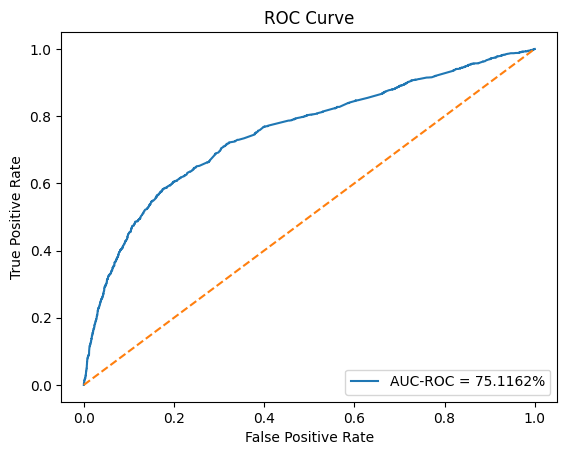

In [76]:
model_path = 'DNN_model_best.pth'
test_accuracy, auc_roc = evaluate_test_set(model_path, 35, best_dropout_rate, best_lr,best_hidden_neurons_1, best_hidden_neurons_2, test_loader)
